<a href="https://colab.research.google.com/github/camille2019/Women-Capital-Trial-Analysis/blob/main/11_25_Keyword_Counts_with_Themes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np
import sys
import re
import os

import seaborn as sns
import matplotlib.pyplot as plt

>[Raw Keyword Counts](#scrollTo=Y5qch0pRXF4s)

>[Get total words and TFIDF](#scrollTo=mwW0k4NmRkZo)

>[Raw Keyword Counts by gender and theme](#scrollTo=bbqxulV9Xbx9)

>[Top 20 Counts by Mean](#scrollTo=hvz_svO9Asfl)



#Raw Keyword Counts

In [366]:
len(raw_counts[raw_counts['gender']=='man'].document_name.unique())

68

In [ ]:
# 4 categories with gendered and neutral terms
hypersexualize_f = {'busty', 'bra', 'panty', 'lingerie', 'teddy', 'slut', 'whore', 'bimbo', 'floozy', 'bitch', 'jezebel', 'mistress', 'breast', 'cleavage', 'skank', 'cougar', 'temptress', 'short skirt', 'low cut', 'figure hugging', 'tight fitting'}

hypersexualize_m = {'boxers', 'womanizer'}

hypersexualize_n = {'flaunting', 'appealing', 'revealing', 'underwear',  'sex', 'tease', 'lure', 'entice', 'flirt', 'seduce', 'affair', 'adulterer', 'promiscu', 'charm', 'sexy', 'attractive', 'glamour', 'ass', 'booty', 'oversexed', 'immodest' }

all_hypersexualize = hypersexualize_f | hypersexualize_m | hypersexualize_n



sexuality_gender_f = { 'bitch', 'dyke', 'butch', 'lesbian','maternal', 'feminine', 'wife', 'lady', 'woman'}

sexuality_gender_m = {'masculine', 'manly', 'man', 'paternal', 'husband'}

sexuality_gender_n = {'virgin', 'pure', 'sacrificial', 'cold', 'uncaring', 'unfriendly', 'unemotional', 'abandonment', 'neglect', 'overbearing', 'selfish', 'unnatural', 'assertive',
'ugly', 'aggressive','confrontational', 'violent', 'unfeeling',
'bisexual', 'gay', 'queer', 'physically attractive','sex appeal', 'sexual appeal'}
all_sexuality_gender = sexuality_gender_f | sexuality_gender_m | sexuality_gender_n


black_racial_tropes_m = {'patriarch', 'baby daddy', 'gang'}
black_racial_tropes_f = {'mammy', 'matriarch', 'welfare queen', 'baby mama'}
black_racial_tropes_n = {'lazy', 'welfare'}

all_black_racial_tropes = black_racial_tropes_m | black_racial_tropes_f | black_racial_tropes_n


parenting_f = {'mother', 'mom', 'maternal', 'matriarch', 'bad mom', 'bad mother'  }

parenting_m = {'father' , 'dad' ,'paternal', 'patriarch', 'bad dad', 'bad father'}

parenting_n = {'nurture', 'homemaker', 'child abuse', 'emotionally abusive', 'family oriented' }

all_parenting = parenting_f | parenting_m | parenting_n


#6 categories with no gendered terms

immigration = { 'alien', 'foreign', 'backward', 'home', 'citizenship', 'wetback', 'illegal', 'dirty','untrustworthy','exotic', 'diverse', 'different', 'ethnic', 'accent', 'english', 'custom', 'culture',
'steal', 'infiltrat', 'border', 'unlawful presence', 'american hospitality', 'taking over'
}

discredit = {'liar', 'lie', 'manipulat', 'unbelievable', 'exaggerat',  'unreliable', 'inconsistent', 'hysteri', 'corroborate', 'atypical', 'make believe', 'cries wolf', 'if it happened', 'asking for it' , 'asked for it', 'had it coming'}

pathologize = {'calculated', 'cold', 'irrational', 'hysteri', 'inhuman', 'unnatural', 'unstable', 'scheming',  'fake', 'deranged', 'tears',  'cry', 'unemotional', 'uncaring', 'liar', 'manipulative', 'malinger',  'uncontrollable', 'angry', 'insincere', 'not crying', 'lack of empathy'}


rurality_poverty = {'poor', 'welfare', 'poverty', 'lazy', 'cheap',
'drugs', 'cocaine', 'speed', 'marijuana', 'heroin',
'dirty', 'disorganized', 'messy', 'greedy',
'materialistic', 'acquisitive', 'trailer trash',
'food stamps', 'lack of opportunity',
'contribution to society', 'contribute to society'}

racial_tropes_general = {'animal', 'ape', 'savage', 'wolves', 'hyena', 'jackal', 'negro', 'feral', 'lazy', 'brute',
'angry', 'untamable', 'gang', 'welfare', 'culture', 'customs', 'different', 'diverse',
'foreign', 'exotic'}

latinx_racial_tropes = {'culture', 'customs', 'different', 'diverse',
'foreign', 'exotic', 'accent', 'steal',
'english', 'foreign', 'backward',
'community', 'dirty', 'ethnic',
'infiltration', 'welfare', 'taking over'}


all_female_keywords = hypersexualize_f | sexuality_gender_f | black_racial_tropes_f | parenting_f
all_male_keywords = hypersexualize_m | sexuality_gender_m | black_racial_tropes_m | parenting_m
all_neutral_keywords = immigration | discredit | pathologize | rurality_poverty | racial_tropes_general | latinx_racial_tropes | parenting_n | black_racial_tropes_n | sexuality_gender_n | hypersexualize_n

all_keywords = all_neutral_keywords | all_male_keywords | all_female_keywords



In [ ]:
#count using built in str.count()

def keyword_count3(directory, file_name, word, get_passages=False):
  count = 0
  full_path = directory + '/' + file_name
  passages = []
  with open(full_path, 'r',errors='ignore') as f:
    read_file = f.read().lower()
    word_count = read_file.count(word)

    if get_passages:
      if word_count > 0 :
        target_index = read_file.index(word)
        #get 60 words before keyword
        start = max(0, target_index - 60)

                    #get 60 words after keyword
        end = min(len(read_file), target_index + 60 + 1)
        list_passage = read_file[start:end]
        passages.append("".join(list_passage))

  return word_count, passages

In [ ]:
def get_counts(transcript_path, gender_of_path, df10, passages_dict, cols_list, all_keywords, window = 60):
  for doc in os.listdir(transcript_path):
  # if (os.path.splitext(transcript_path)[1].lower() == '.txt'):
    title = doc
    print(title)
    if ".txt" in title:
      doc_path = transcript_path + '/' + doc

      with open(doc_path, "r" ,errors='ignore') as f:
          doc = f.read()
          doc = doc.lower()
      tokenized_doc = doc.split()

      # print(f"defendant\tkeyword\tkeyword_index\tparagraph")


      unordered =  'unordered' in title.lower()
      if unordered:
        get_passages = False
      else:
        get_passages = True


      for keyword in all_keywords:

        #print(keyword)
        count3, passages3= keyword_count3(transcript_path, title, keyword, get_passages)
        #print(count3)

        #save keyword counts

        #all_cols = columns=['document_name', 'gender', 'raw_keyword_count', 'keyword', 'pathologize_theme', 'hypersexualize_theme', 'discredit_theme', 'immigration_theme',
        #'parent_theme' , 'gender_sexuality_theme', 'rurality_poverty_theme', 'gen_racial_trope_theme',
        # 'black_racial_trope_theme', 'latina_racial_trope_theme', 'gendered_keyword_male', 'gendered_keyword_female', 'gender_neutral_keyword'  ]
        df2 = pd.DataFrame(columns=cols_list)

        df2['document_name'] = [title]
        df2['gender'] = [gender_of_path]
        df2['raw_keyword_count'] = [count3]
        df2['keyword'] = [keyword]


        #keyword themes
        dis = keyword in discredit
        hyp =keyword in all_hypersexualize
        pat =  keyword in pathologize
        imm =  keyword in immigration
        par = keyword in all_parenting
        rur = keyword in rurality_poverty
        rac = keyword in racial_tropes_general
        blk = keyword in all_black_racial_tropes
        ltx = keyword in latinx_racial_tropes
        sg = keyword in all_sexuality_gender
        gm =  keyword in all_male_keywords
        gf = keyword in all_female_keywords
        gn = keyword in all_neutral_keywords

        df2['hypersexualize_theme'] = [hyp]
        df2['pathologize_theme'] = [pat]
        df2['discredit_theme'] = dis
        df2['immigration_theme'] = imm
        df2['parent_theme'] = par
        df2['gender_sexuality_theme'] = [keyword in all_sexuality_gender]
        df2['rurality_poverty_theme'] = [keyword in rurality_poverty]
        df2['gen_racial_trope_theme'] = [keyword in racial_tropes_general]
        df2['black_racial_trope_theme'] = [keyword in all_black_racial_tropes]
        df2['latina_racial_trope_theme'] = [keyword in latinx_racial_tropes]
        df2['gendered_keyword_male'] = [keyword in all_male_keywords]
        df2['gendered_keyword_female'] =[ keyword in all_female_keywords]
        df2['gender_neutral_keyword'] = [keyword in all_neutral_keywords]


        df10 = pd.concat([df10, df2], ignore_index=True)



        #save passages from keyword counts

        if get_passages:
          m3_count = len(passages3)
          doc_name = [title] * m3_count
          k = [keyword] *m3_count

          current_doc_passages = pd.DataFrame({'document_name':doc_name, 'gender':gender_of_path, 'keyword': k, 'passage': passages3, 'pathologize_theme': [pat]  *m3_count, 'hypersexualize_theme': [hyp] * m3_count, 'discredit_theme': [dis]* m3_count , 'immigration_theme': [imm] * m3_count,
                                      'parent_theme': [par]  *m3_count , 'gender_sexuality_theme': [sg] *m3_count, 'rurality_poverty_theme': [rur] *m3_count, 'gen_racial_trope_theme': [rac] *m3_count,
                                      'black_racial_trope_theme': [blk] *m3_count, 'latina_racial_trope_theme': [ltx] *m3_count, 'gendered_keyword_male': [gm] *m3_count, 'gendered_keyword_female': [gf] *m3_count, 'gender_neutral_keyword': [gn] *m3_count
                                      })
          passages_dict = pd.concat([passages_dict, current_doc_passages], ignore_index=True)

  return df10, passages_dict


In [ ]:
all_cols = columns=['document_name', 'gender', 'raw_keyword_count', 'keyword', 'pathologize_theme', 'hypersexualize_theme', 'discredit_theme', 'immigration_theme', 'parent_theme' , 'gender_sexuality_theme', 'rurality_poverty_theme', 'gen_racial_trope_theme', 'black_racial_trope_theme', 'latina_racial_trope_theme', 'gendered_keyword_male', 'gendered_keyword_female', 'gender_neutral_keyword'  ]

In [ ]:
df = pd.DataFrame(columns=all_cols)

passage_df =  pd.DataFrame(columns=['document_name', 'gender', 'keyword', 'passage', 'pathologize_theme', 'hypersexualize_theme', 'discredit_theme', 'immigration_theme', 'parent_theme' , 'gender_sexuality_theme', 'rurality_poverty_theme', 'gen_racial_trope_theme', 'black_racial_trope_theme', 'latina_racial_trope_theme', 'gendered_keyword_male', 'gendered_keyword_female', 'gender_neutral_keyword'  ])


In [ ]:
d, passages = get_counts('/content/women_test', 'woman', df, passage_df, all_cols, all_keywords, window = 60)

In [ ]:
d, passages = get_counts('/content/women', 'woman', d, passages, all_cols, all_keywords, window = 60)

Maureen McDermott.txt
Valerie Martin.txt
Brooke Rottiers.txt
Tiffany Moss.txt
Blanche Taylor Moore.txt
Kimberly Cargill.txt
Susan Eubanks.txt
Tierra Capri Gobble.txt
Kerry Dalton.txt
Tiffany Cole.txt
Cherie Rhoades.txt
Patricia Blackmon.txt
Socorro Caro.txt
Taylor Parker.txt
Manling Williams.txt
Melissa Lucio.txt
Tanya Nelson.txt
Celeste Carrington.txt
.ipynb_checkpoints
Christie Michelle Scott.txt
Erica Sheppard.txt
Darlie Routier.txt
Brittany Holberg.txt
Lisa Chamberlin.txt
Maria Alfaro.txt
John Allen.txt
Carlette Parker.txt
Antoinette Frank.txt
Michelle Tharp.txt
Lorraine Hunter.txt
Tina Brown.txt
Shawna Forde.txt
Heather Keaton.txt
Donna Roberts.txt
Sammantha Allen.txt
Angelina Rodriguez.txt
Veronica Gonzales.txt
Lisa Graham.txt
Margaret Allen.txt
Brenda Andrew.txt
Christa Pike.txt


In [ ]:
d, passages = get_counts('/content/women', 'woman', d, passages, all_cols, all_keywords, window = 60)

In [ ]:
d, passages = get_counts('/content/men_test', 'man', d, passages, all_cols, all_keywords, window = 60)

Willie Terion Washington Combined Transcript.txt


In [ ]:
d, passages = get_counts('/content/men', 'man', d, passages, all_cols, all_keywords, window = 60)

Jason Delacerda Combined Transcript.txt
Isidro Miguel Delacruz Combined TranscriptOCR.txt
James Dickerson.txt
Darren Stanley Combined Transcript.txt
Ricky Blackwell Combined Transcript.txt
Dexter Johnson Combined Transcript.txt
Damon Matthews Combined Transcript.txt
Carlos Kennedy Combined TranscriptOCR.txt
Derrick Dearman Combined TranscriptOCR.txt
Albert Reid Combined Transcript.txt
Micheal_Bell_Unordered_Transcript.txt
Rodney San Nicolas Combined Transcript.txt
Eric Leonard Combined TranscriptOCR.txt
Robert Cowan Combined Transcript.txt
Obel Cruz Garcia Combined Transcript.txt
Charles Mamou Combined Transcript.txt
Danny Horning Combined Transcript.txt
Michael Slaughter Combined TranscriptOCR.txt
Dannie Hillhouse Combined Transcript.txt
Ramiro Ibarra Combined Transcript.txt
Paul Bolin Combined Transcript.txt
Clarence Ray Combined Transcript.txt
James Majors Combined TranscriptOCR.txt
David Leonard Wood Combined Transcript.txt
Dennis Ervine Combined Transcript OCR.txt
.ipynb_checkpoin

In [ ]:
d

NameError: name 'd' is not defined

In [ ]:
len(d['document_name'].unique())

110

In [ ]:
len(d[d['gender']=='woman']['document_name'].unique())

41

In [ ]:
len(d[d['gender']=='man']['document_name'].unique())

69

In [ ]:
d.to_csv('keyword_counts_11_21.csv')

In [ ]:
passages.to_csv('passages_keywords_11_21.csv')

In [ ]:
joint_df, joint_passages = get_counts('/content/jointly_tried', 'man and woman', df, passage_df, all_cols, all_keywords, window = 60)

Cathy Sarinana.txt
Janeen Snyder.txt
Belinda Magana.txt
Cynthia Coffman.txt
Virginia Caudill.txt
Michelle Michaud.txt


In [ ]:
joint_df

document_name         gender raw_keyword_count        keyword  \
0       Cathy Sarinana.txt  man and woman                 0       lingerie   
1       Cathy Sarinana.txt  man and woman                 0          flirt   
2       Cathy Sarinana.txt  man and woman                 0          negro   
3       Cathy Sarinana.txt  man and woman                 0      matriarch   
4       Cathy Sarinana.txt  man and woman               234         mother   
...                    ...            ...               ...            ...   
1129  Michelle Michaud.txt  man and woman                 3        neglect   
1130  Michelle Michaud.txt  man and woman                32         border   
1131  Michelle Michaud.txt  man and woman                 2        hysteri   
1132  Michelle Michaud.txt  man and woman                 0       atypical   
1133  Michelle Michaud.txt  man and woman                 0  untrustworthy   

     pathologize_theme hypersexualize_theme discredit_theme immigration_theme  \
0                False                 True           False             False   
1                False                 True           False             False   
2                False                False           False             False   
3                False                False           False             False   
4                False                False           False             False   
...                ...                  ...             ...               ...   
1129             False                False           False             False   
1130             False                False           False              True   
1131              True                False            True             False   
1132             False                False            True             False   
1133             False                False           False              True   

     parent_theme gender_sexuality_theme rurality_poverty_theme  \
0           False                  False                  False   
1           False                  False                  False   
2           False                  False                  False   
3            True                  False                  False   
4            True                  False                  False   
...           ...                    ...                    ...   
1129        False                   True                  False   
1130        False                  False                  False   
1131        False                  False                  False   
1132        False                  False                  False   
1133        False                  False                  False   

     gen_racial_trope_theme black_racial_trope_theme  \
0                     False                    False   
1                     False                    False   
2                      True                    False   
3                     False                     True   
4                     False                    False   
...                     ...                      ...   
1129                  False                    False   
1130                  False                    False   
1131                  False                    False   
1132                  False                    False   
1133                  False                    False   

     latina_racial_trope_theme gendered_keyword_male gendered_keyword_female  \
0                        False                 False                    True   
1                        False                 False                   False   
2                        False                 False                   False   
3                        False                 False                    True   
4                        False                 False                    True   
...                        ...                   ...                     ...   
1129                     False                 False             

In [ ]:
joint_df.to_csv('jointly_tried_keyword_counts_11_21.csv')

In [ ]:
joint_passages.to_csv('jointly_tried_passages_11_21.csv')

In [ ]:
joint_passages

document_name         gender              keyword  \
0      Cathy Sarinana.txt  man and woman               mother   
1      Cathy Sarinana.txt  man and woman  lack of opportunity   
2      Cathy Sarinana.txt  man and woman                  cry   
3      Cathy Sarinana.txt  man and woman                  sex   
4      Cathy Sarinana.txt  man and woman                messy   
..                    ...            ...                  ...   
542  Michelle Michaud.txt  man and woman                 pure   
543  Michelle Michaud.txt  man and woman                 lady   
544  Michelle Michaud.txt  man and woman              neglect   
545  Michelle Michaud.txt  man and woman               border   
546  Michelle Michaud.txt  man and woman              hysteri   

                                               passage pathologize_theme  \
0    04. these brothers grew up in los angeles coun...             False   
1    erstand. i am just pointing out that there is ...             False   
2     to come over here." "what's your emergency?" ...              True   
3    -1-1 and reported conrad as a runaway and that...             False   
4    idence itself appear to be neat and tidy, or w...             False   
..                                                 ...               ...   
542  harged, which is not supported by physical evi...             False   
543  t, the dna of james daveggio is on her face. t...             False   
544   sample? a. no. q. the other thing i wanted to...             False   
545   of sacramento, california. their terror reach...             False   
546  crying, yes. q. in fact, did you describe her ...              True   

    hypersexualize_theme discredit_theme immigration_theme parent_theme  \
0                  False           False             False         True   
1                  False           False             False        False   
2                  False           False             False        False   
3                   True           False             False        False   
4                  False           False             False        False   
..                   ...             ...               ...          ...   
542                False           False             False        False   
543                False           False             False        False   
544                False           False             False        False   
545                False           False              True        False   
546                False            True             False        False   

    gender_sexuality_theme rurality_poverty_theme gen_racial_trope_theme  \
0                    False                  False                  False   
1                    False                   True                  False   
2                    False                  False                  False   
3                    False                  False                  False   
4                    False                   True                  False   
..                     ...                    ...                    ...   
542                   True                  False                  False   
543                   True                  False                  False   
544                   True                  False                  False   
545                  False                  False                  False   
546                  False                  False                  False   

    black_racial_trope_theme latina_racial_trope_theme gendered_keyword_male  \
0                      False                     False                 False   
1                      False                     False                 False   
2                      False                     False                 False   
3                      False                     False                 False   
4                      False                     False                 False   
..                      

In [ ]:
#create a seperate dataframe of just joint transcripts

In [ ]:
passages

document_name gender        keyword  \
0     Wendi Andriano.txt  woman          flirt   
1     Wendi Andriano.txt  woman         mother   
2     Wendi Andriano.txt  woman            cry   
3     Wendi Andriano.txt  woman  asking for it   
4     Wendi Andriano.txt  woman            sex   
...                  ...    ...            ...   
2886    Christa Pike.txt  woman         virgin   
2887    Christa Pike.txt  woman    corroborate   
2888    Christa Pike.txt  woman           lady   
2889    Christa Pike.txt  woman         border   
2890    Christa Pike.txt  woman        hysteri   

                                                passage pathologize_theme  \
0     nd how was she with the other men that were 16...             False   
1     ing they could do for him. he was going . \ to...             False   
2     been drinking, and that when drinking, he woul...              True   
3     september 22nd, if he's already told you that,...             False   
4     ble. she wants him comfortable because they be...             False   
...                                                 ...               ...   
2886  te credit hours in criminal justice, from the ...             False   
2887  tatement of ms. pike, this is, as to the box c...             False   
2888  oing at your office? a one of these missing pe...             False   
2889  r or rip the skin open. we have lacerations he...             False   
2890  if she were present? 13 a ....:.-:.. - - ; 1: ...              True   

     hypersexualize_theme discredit_theme immigration_theme parent_theme  \
0                    True           False             False        False   
1                   False           False             False         True   
2                   False           False             False        False   
3                   False            True             False        False   
4                    True           False             False        False   
...                   ...             ...               ...          ...   
2886                False           False             False        False   
2887                False            True             False        False   
2888                False           False             False        False   
2889                False           False              True        False   
2890                False            True             False        False   

     gender_sexuality_theme rurality_poverty_theme gen_racial_trope_theme  \
0                     False                  False                  False   
1                     False                  False                  False   
2                     False                  False                  False   
3                     False                  False                  False   
4                     False                  False                  False   
...                     ...                    ...                    ...   
2886                   True                  False                  False   
2887                  False                  False                  False   
2888                   True                  False                  False   
2889                  False                  False                  False   
2890                  False                  False                  False   

     black_racial_trope_theme latina_racial_trope_theme gendered_keyword_male  \
0                       False                     False                 False   
1                       False                     False                 False   
2                       False                     False                 False   
3                       False                     False                 False   
4                       False                     False                 False   
...                       ...                       ...                   ...   
2886                    False                     False                 False   

#TFIDF overall and within gendered sets of documents

In [ ]:
women_path = '/content/women/'

men_path = '/content/men/'

w_file_counts = {}

m_file_counts = {}

for file in os.listdir(women_path):

  with open(women_path +file) as f:
    data = f.read()

    w = data.split()

    word_count = len(w)

    unique_count = len(list(set(w)))

    w_file_counts[file] = (word_count, unique_count)


NameError: name 'os' is not defined

#Raw Keyword Counts by gender and theme

In [ ]:
keyword_theme_columns = [ 'hypersexualize_theme', 'discredit_theme', 'immigration_theme', 'parent_theme' , 'gender_sexuality_theme', 'rurality_poverty_theme', 'gen_racial_trope_theme', 'black_racial_trope_theme', 'latina_racial_trope_theme', 'gendered_keyword_male', 'gendered_keyword_female', 'gender_neutral_keyword'  ]
gender_groups = ['gendered_keyword_male', 'gendered_keyword_female', 'gender_neutral_keyword'  ]
theme_types =  [ 'hypersexualize_theme', 'discredit_theme', 'immigration_theme', 'parent_theme' , 'gender_sexuality_theme', 'rurality_poverty_theme', 'gen_racial_trope_theme', 'black_racial_trope_theme', 'latina_racial_trope_theme']


In [ ]:
raw_counts = pd.read_csv('/content/keyword_counts_11_21.csv')

In [ ]:
raw_counts

Unnamed: 0                             document_name gender  \
0               0                        Wendi Andriano.txt  woman   
1               1                        Wendi Andriano.txt  woman   
2               2                        Wendi Andriano.txt  woman   
3               3                        Wendi Andriano.txt  woman   
4               4                        Wendi Andriano.txt  woman   
...           ...                                       ...    ...   
20785       20785  Blaine Milam Combined Transcript OCR.txt    man   
20786       20786  Blaine Milam Combined Transcript OCR.txt    man   
20787       20787  Blaine Milam Combined Transcript OCR.txt    man   
20788       20788  Blaine Milam Combined Transcript OCR.txt    man   
20789       20789  Blaine Milam Combined Transcript OCR.txt    man   

       raw_keyword_count        keyword  pathologize_theme  \
0                      0       lingerie              False   
1                     30          flirt              False   
2                      0          negro              False   
3                      0      matriarch              False   
4                    489         mother              False   
...                  ...            ...                ...   
20785                  4        neglect              False   
20786                 67         border              False   
20787                  0        hysteri               True   
20788                  2       atypical              False   
20789                  0  untrustworthy              False   

       hypersexualize_theme  discredit_theme  immigration_theme  parent_theme  \
0                      True            False              False         False   
1                      True            False              False         False   
2                     False            False              False         False   
3                     False            False              False          True   
4                     False            False              False          True   
...                     ...              ...                ...           ...   
20785                 False            False              False         False   
20786                 False            False               True         False   
20787                 False             True              False         False   
20788                 False             True              False         False   
20789                 False            False               True         False   

       gender_sexuality_theme  rurality_poverty_theme  gen_racial_trope_theme  \
0                       False                   False                   False   
1                       False                   False                   False   
2                       False                   False                    True   
3                       False                   False                   False   
4                       False                   False                   False   
...                       ...                     ...                     ...   
20785                    True                   False                   False   
20786                   False                   False                   False   
20787                   False                   False                   False   
20788                   False                   False                   False   
20789                   False                   False                   False   

       black_racial_trope_theme  latina_racial_trope_theme  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                          True                      False   
4                         False                      False   
...                         ...                        ...   
20785                     False          

In [ ]:
sorted(list(raw_counts[raw_counts['gender']=='woman'].document_name.unique()))

['Angelina Rodriguez.txt',
 'Antoinette Frank.txt',
 'Blanche Taylor Moore.txt',
 'Brenda Andrew.txt',
 'Brittany Holberg.txt',
 'Brooke Rottiers.txt',
 'Carlette Parker.txt',
 'Celeste Carrington.txt',
 'Cherie Rhoades.txt',
 'Christa Pike.txt',
 'Christie Michelle Scott.txt',
 'Darlie Routier.txt',
 'Donna Roberts.txt',
 'Erica Sheppard.txt',
 'Heather Keaton.txt',
 'John Allen.txt',
 'Kerry Dalton.txt',
 'Kimberly Cargill.txt',
 'Lisa Chamberlin.txt',
 'Lisa Graham.txt',
 'Lorraine Hunter.txt',
 'Manling Williams.txt',
 'Margaret Allen.txt',
 'Maria Alfaro.txt',
 'Maureen McDermott.txt',
 'Melissa Lucio.txt',
 'Michelle Tharp.txt',
 'Patricia Blackmon.txt',
 'Sammantha Allen.txt',
 'Shawna Forde.txt',
 'Socorro Caro.txt',
 'Susan Eubanks.txt',
 'Tanya Nelson.txt',
 'Taylor Parker.txt',
 'Tierra Capri Gobble.txt',
 'Tiffany Cole.txt',
 'Tiffany Moss.txt',
 'Tina Brown.txt',
 'Valerie Martin.txt',
 'Veronica Gonzales.txt',
 'Wendi Andriano.txt']

In [ ]:
sorted(list(raw_counts[raw_counts['gender']=='man'].document_name.unique()))

['Albert Gaxiola Combined Transcript.txt',
 'Albert Reid Combined Transcript.txt',
 'Andrew Lackey Combined TranscriptOCR.txt',
 'Blaine Milam Combined Transcript OCR.txt',
 'Carlos Kennedy Combined TranscriptOCR.txt',
 'Cedric Ricks Combined Transcript.txt',
 'Charles Mamou Combined Transcript.txt',
 'Christopher Sepulvado Combined Transcript.txt',
 'Clarence Ray Combined Transcript.txt',
 'Damon Matthews Combined Transcript.txt',
 'Daniel Whalen Combined Transcript.txt',
 'Dannie Hillhouse Combined Transcript.txt',
 'Danny Horning Combined Transcript.txt',
 'Darren Stanley Combined Transcript.txt',
 'David Leonard Wood Combined Transcript.txt',
 'Dennis Ervine Combined Transcript OCR.txt',
 'Dennis Lawley Combined Transcript.txt',
 'Derek Chappell Combined Transcript.txt',
 'Derrick Dearman Combined TranscriptOCR.txt',
 'Dexter Johnson Combined Transcript.txt',
 'Eric Leonard Combined TranscriptOCR.txt',
 'Fabian Hernandez Combined Transcript.txt',
 'Hector Acosta Combined Transcript

In [ ]:
co_defendant_match = { 'Heather Keaton.txt', 'Sammantha Allen.txt',
                      'John DeBlase Combined Transcript - No PP Vols.txt',  'John Allen Combined Transcript.txt',
                       'Erica Sheppard.txt',  'James Dickerson.txt',
                       'Brenda Andrew.txt',  'James Pavatt.txt'
}



race_state_crime_match =  {'Cherie Rhoades.txt',
 'Shawna Forde.txt','Manling Williams.txt', 'Brooke Rottiers.txt','Erica Sheppard.txt',  'Darlie Routier.txt', 'Taylor Parker.txt',  'Kimberly Cargill.txt',  'Sammantha Allen.txt',  'Brenda Andrew.txt',  'Melissa Lucio.txt',
 'Wendi Andriano.txt', 'Maureen McDermott.txt',  'Susan Eubanks.txt',  'Valerie Martin.txt',  'Christie Michelle Scott.txt',



 'Clarence Ray Combined Transcript.txt',  'Jason Bush Combined Transcript.txt',  'Rodney San Nicolas Combined Transcript.txt',  'Eric Leonard Combined TranscriptOCR.txt',  'James Dickerson.txt',  'Willie Terion Washington Combined Transcript.txt',
                            'Danny Horning Combined Transcript.txt',  'John DeBlase Combined Transcript - No PP Vols.txt',  'Blaine Milam Combined Transcript OCR.txt',  'Robert Roberson Combined Transcript.txt',  'Damon Matthews Combined Transcript.txt',  'John Allen Combined Transcript.txt',
                            'James Pavatt.txt',  'Manuel Velez Combined Transcript.txt',  'Juan Ramon Meza Segundo Combined Transcript.txt',  'Thomas Lenart Combined Transcript.txt',  'Derek Chappell Combined Transcript.txt',  'Richard Vieira Combined Transcript.txt'}


In [ ]:
raw_counts = raw_counts.drop(columns= 'Unnamed: 0')

In [ ]:
sorted(raw_counts[raw_counts['gender']=='man'].document_name.unique())

['Albert Gaxiola Combined Transcript.txt',
 'Albert Reid Combined Transcript.txt',
 'Andrew Lackey Combined TranscriptOCR.txt',
 'Blaine Milam Combined Transcript OCR.txt',
 'Carlos Kennedy Combined TranscriptOCR.txt',
 'Cedric Ricks Combined Transcript.txt',
 'Charles Mamou Combined Transcript.txt',
 'Christopher Sepulvado Combined Transcript.txt',
 'Clarence Ray Combined Transcript.txt',
 'Damon Matthews Combined Transcript.txt',
 'Daniel Whalen Combined Transcript.txt',
 'Dannie Hillhouse Combined Transcript.txt',
 'Danny Horning Combined Transcript.txt',
 'Darren Stanley Combined Transcript.txt',
 'David Leonard Wood Combined Transcript.txt',
 'Dennis Ervine Combined Transcript OCR.txt',
 'Dennis Lawley Combined Transcript.txt',
 'Derek Chappell Combined Transcript.txt',
 'Derrick Dearman Combined TranscriptOCR.txt',
 'Dexter Johnson Combined Transcript.txt',
 'Eric Leonard Combined TranscriptOCR.txt',
 'Fabian Hernandez Combined Transcript.txt',
 'Hector Acosta Combined Transcript

In [ ]:
#remove duplicates
raw_counts = raw_counts[raw_counts['document_name'] != "James Dickerson_Combined Transcript - OCR'd.txt"]



In [ ]:
raw_counts.loc[raw_counts['document_name'].isin(co_defendant_match), 'co_defendant_match'] = True

raw_counts.loc[raw_counts['document_name'].isin(race_state_crime_match), 'race_state_crime_match'] = True

raw_counts

document_name gender  raw_keyword_count  \
0                            Wendi Andriano.txt  woman                  0   
1                            Wendi Andriano.txt  woman                 30   
2                            Wendi Andriano.txt  woman                  0   
3                            Wendi Andriano.txt  woman                  0   
4                            Wendi Andriano.txt  woman                489   
...                                         ...    ...                ...   
20785  Blaine Milam Combined Transcript OCR.txt    man                  4   
20786  Blaine Milam Combined Transcript OCR.txt    man                 67   
20787  Blaine Milam Combined Transcript OCR.txt    man                  0   
20788  Blaine Milam Combined Transcript OCR.txt    man                  2   
20789  Blaine Milam Combined Transcript OCR.txt    man                  0   

             keyword  pathologize_theme  hypersexualize_theme  \
0           lingerie              False                  True   
1              flirt              False                  True   
2              negro              False                 False   
3          matriarch              False                 False   
4             mother              False                 False   
...              ...                ...                   ...   
20785        neglect              False                 False   
20786         border              False                 False   
20787        hysteri               True                 False   
20788       atypical              False                 False   
20789  untrustworthy              False                 False   

       discredit_theme  immigration_theme  parent_theme  \
0                False              False         False   
1                False              False         False   
2                False              False         False   
3                False              False          True   
4                False              False          True   
...                ...                ...           ...   
20785            False              False         False   
20786            False               True         False   
20787             True              False         False   
20788             True              False         False   
20789            False               True         False   

       gender_sexuality_theme  rurality_poverty_theme  gen_racial_trope_theme  \
0                       False                   False                   False   
1                       False                   False                   False   
2                       False                   False                    True   
3                       False                   False                   False   
4                       False                   False                   False   
...                       ...                     ...                     ...   
20785                    True                   False                   False   
20786                   False                   False                   False   
20787                   False                   False                   False   
20788                   False                   False                   False   
20789                   False                   False                   False   

       black_racial_trope_theme  latina_racial_trope_theme  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                          True                      False   
4                         False                      False   
...                         ...                        ...   
20785                     False                      False   
20786                     False                      False   
20787                     False                      False   
20788                     

In [ ]:
raw_counts['co_defendant_match'] = raw_counts['co_defendant_match'].fillna(False)
raw_counts['race_state_crime_match'] = raw_counts['race_state_crime_match'].fillna(False)
raw_counts

/tmp/ipython-input-3620405496.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_counts['co_defendant_match'] = raw_counts['co_defendant_match'].fillna(False)
/tmp/ipython-input-3620405496.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_counts['race_state_crime_match'] = raw_counts['race_state_crime_match'].fillna(False)


document_name gender  raw_keyword_count  \
0                            Wendi Andriano.txt  woman                  0   
1                            Wendi Andriano.txt  woman                 30   
2                            Wendi Andriano.txt  woman                  0   
3                            Wendi Andriano.txt  woman                  0   
4                            Wendi Andriano.txt  woman                489   
...                                         ...    ...                ...   
20785  Blaine Milam Combined Transcript OCR.txt    man                  4   
20786  Blaine Milam Combined Transcript OCR.txt    man                 67   
20787  Blaine Milam Combined Transcript OCR.txt    man                  0   
20788  Blaine Milam Combined Transcript OCR.txt    man                  2   
20789  Blaine Milam Combined Transcript OCR.txt    man                  0   

             keyword  pathologize_theme  hypersexualize_theme  \
0           lingerie              False                  True   
1              flirt              False                  True   
2              negro              False                 False   
3          matriarch              False                 False   
4             mother              False                 False   
...              ...                ...                   ...   
20785        neglect              False                 False   
20786         border              False                 False   
20787        hysteri               True                 False   
20788       atypical              False                 False   
20789  untrustworthy              False                 False   

       discredit_theme  immigration_theme  parent_theme  \
0                False              False         False   
1                False              False         False   
2                False              False         False   
3                False              False          True   
4                False              False          True   
...                ...                ...           ...   
20785            False              False         False   
20786            False               True         False   
20787             True              False         False   
20788             True              False         False   
20789            False               True         False   

       gender_sexuality_theme  rurality_poverty_theme  gen_racial_trope_theme  \
0                       False                   False                   False   
1                       False                   False                   False   
2                       False                   False                    True   
3                       False                   False                   False   
4                       False                   False                   False   
...                       ...                     ...                     ...   
20785                    True                   False                   False   
20786                   False                   False                   False   
20787                   False                   False                   False   
20788                   False                   False                   False   
20789                   False                   False                   False   

       black_racial_trope_theme  latina_racial_trope_theme  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                          True                      False   
4                         False                      False   
...                         ...                        ...   
20785                     False                      False   
20786                     False                      False   
20787                     False                      False   
20788                     

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

/tmp/ipython-input-467286614.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


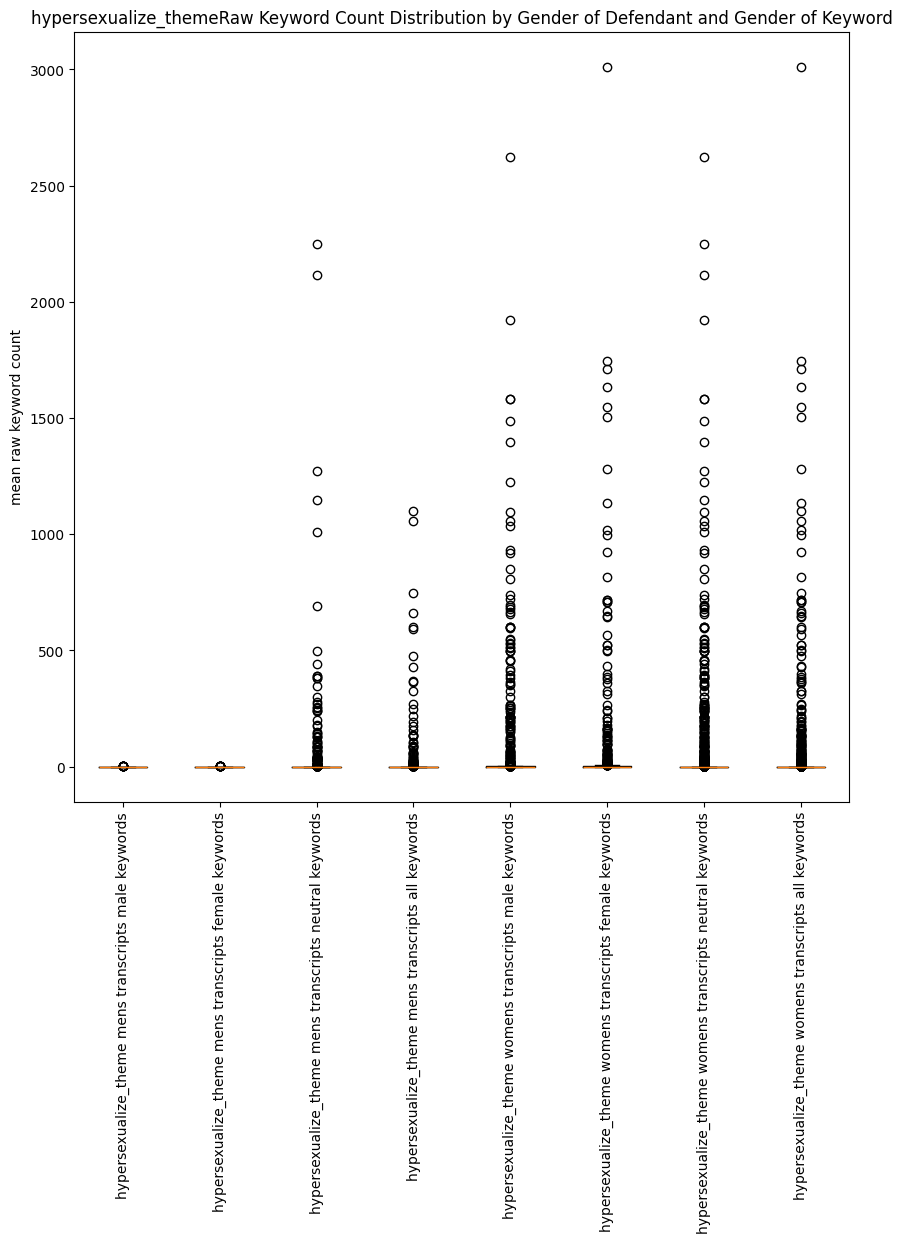

/tmp/ipython-input-467286614.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


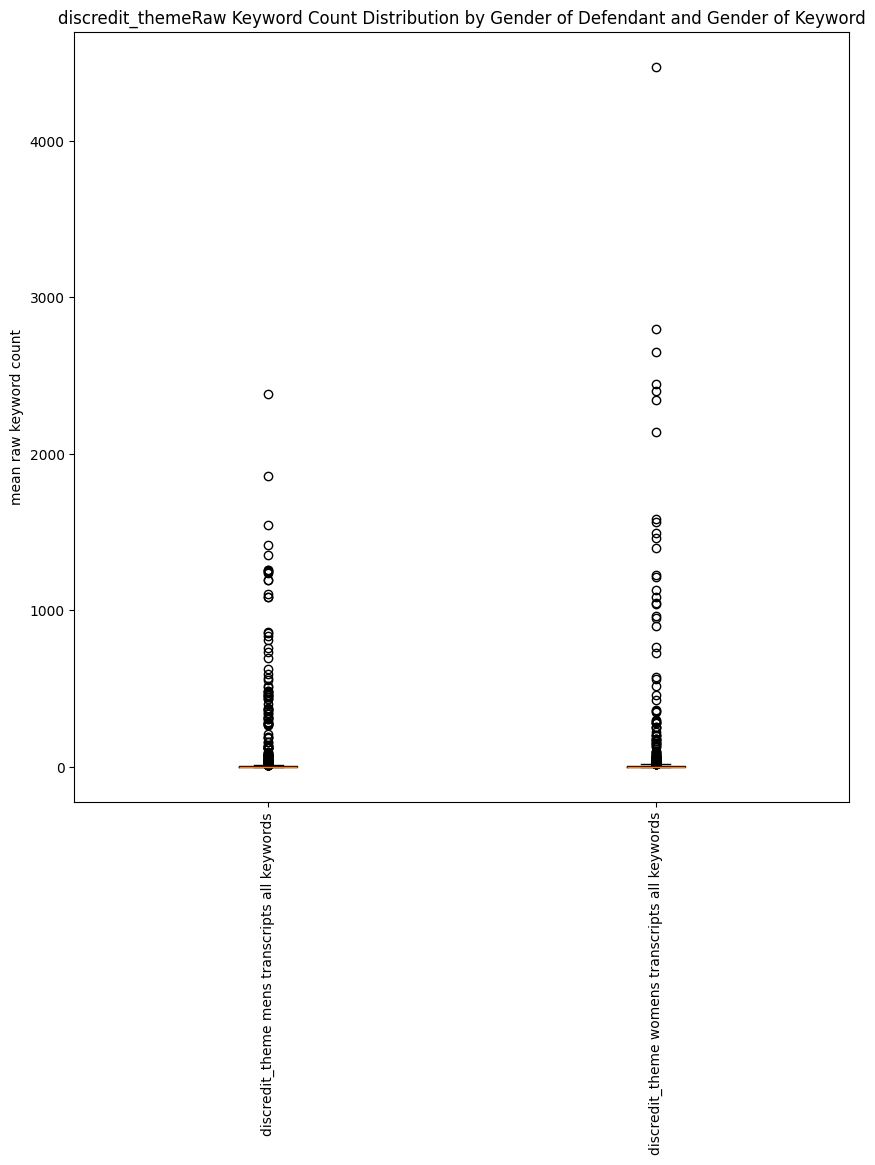

/tmp/ipython-input-467286614.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


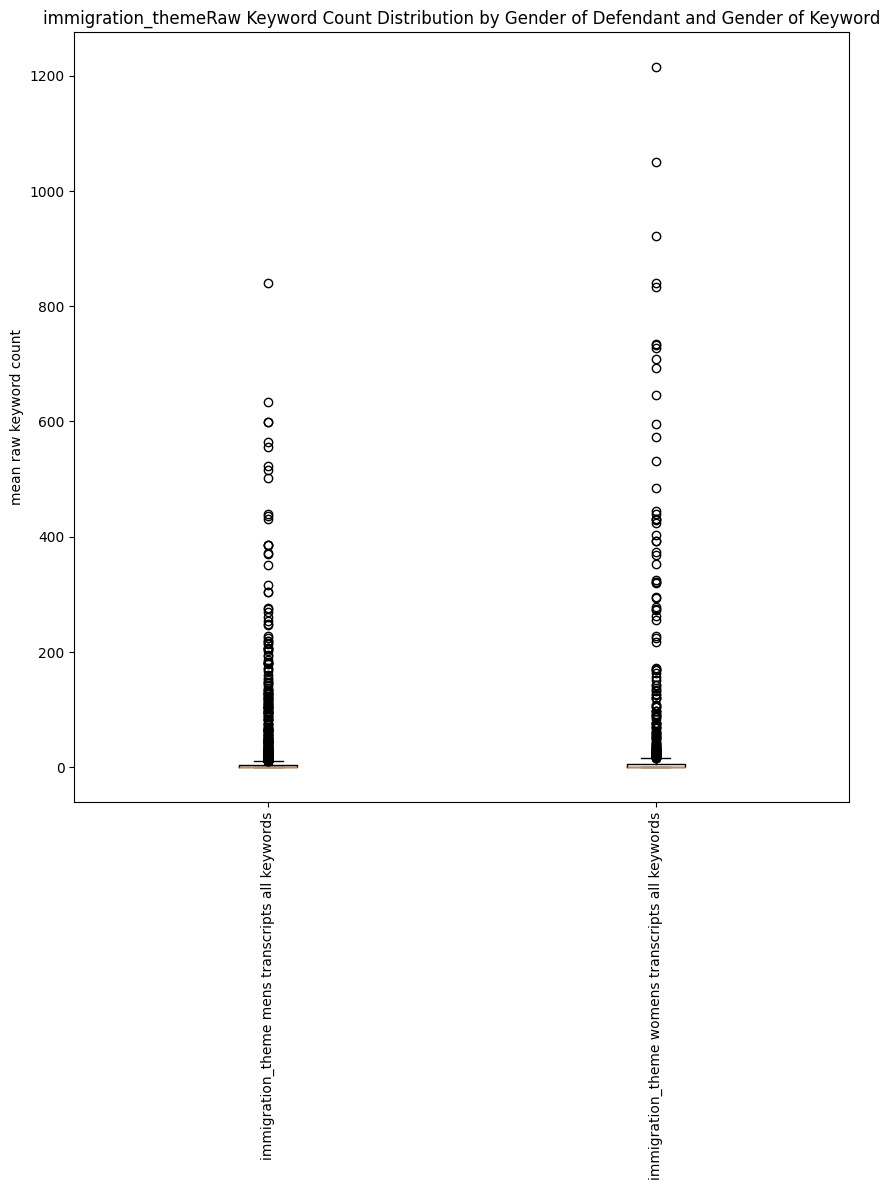

/tmp/ipython-input-467286614.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


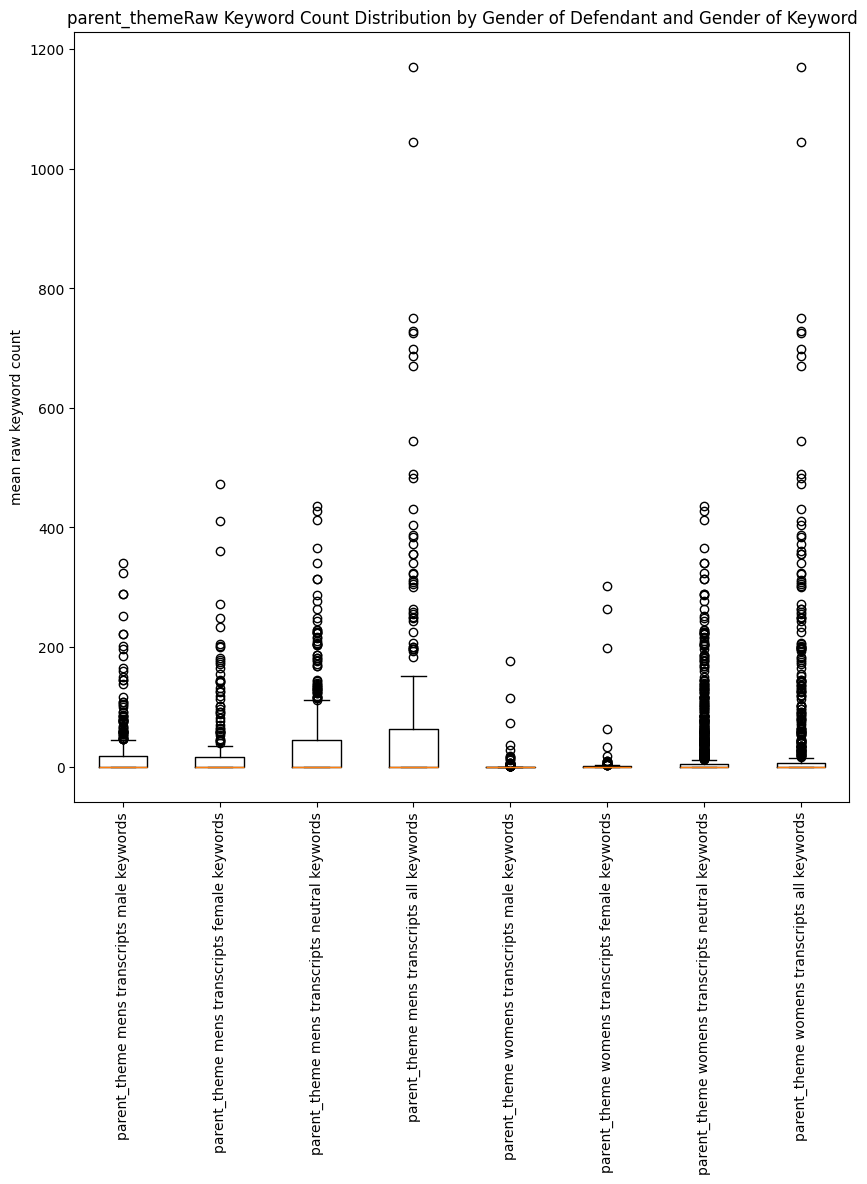

/tmp/ipython-input-467286614.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


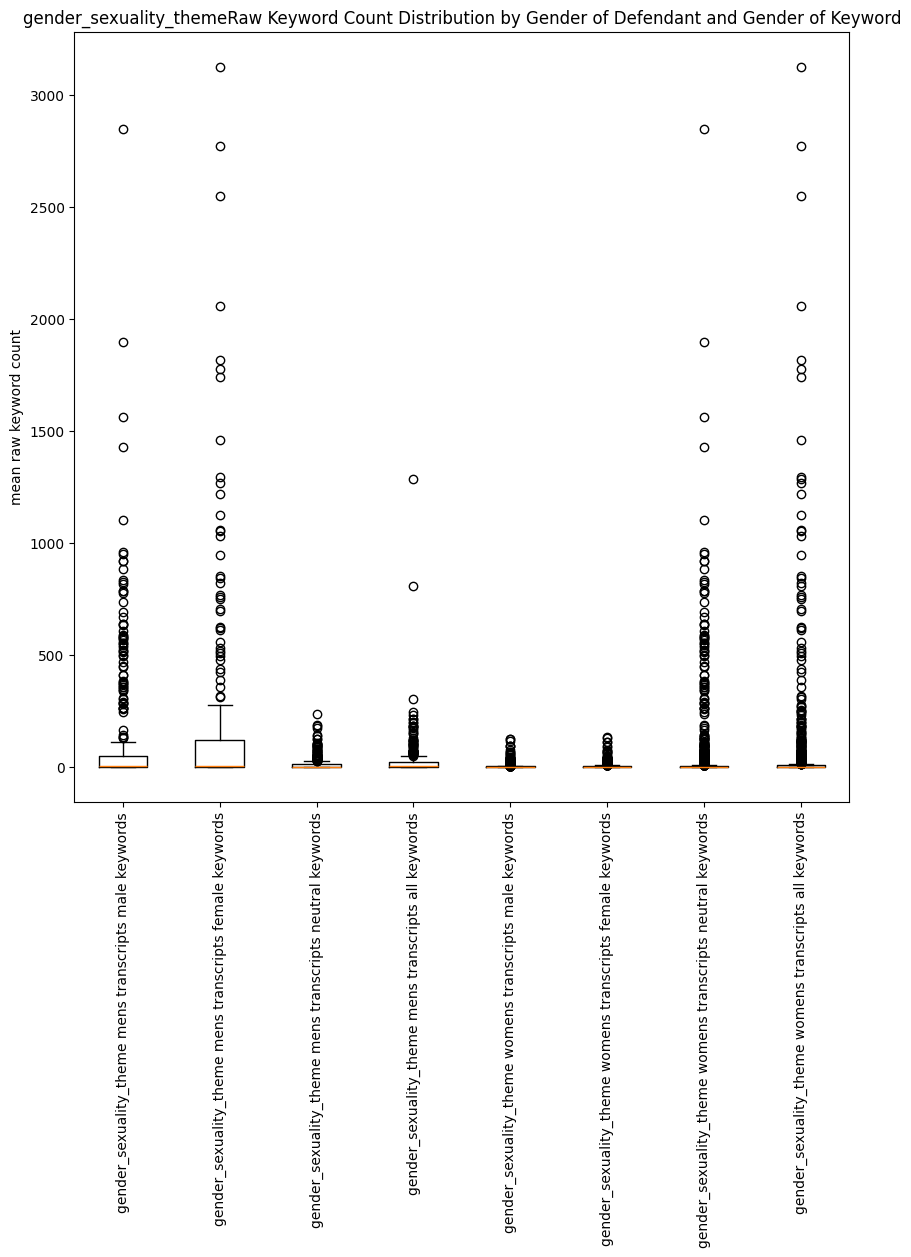

/tmp/ipython-input-467286614.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


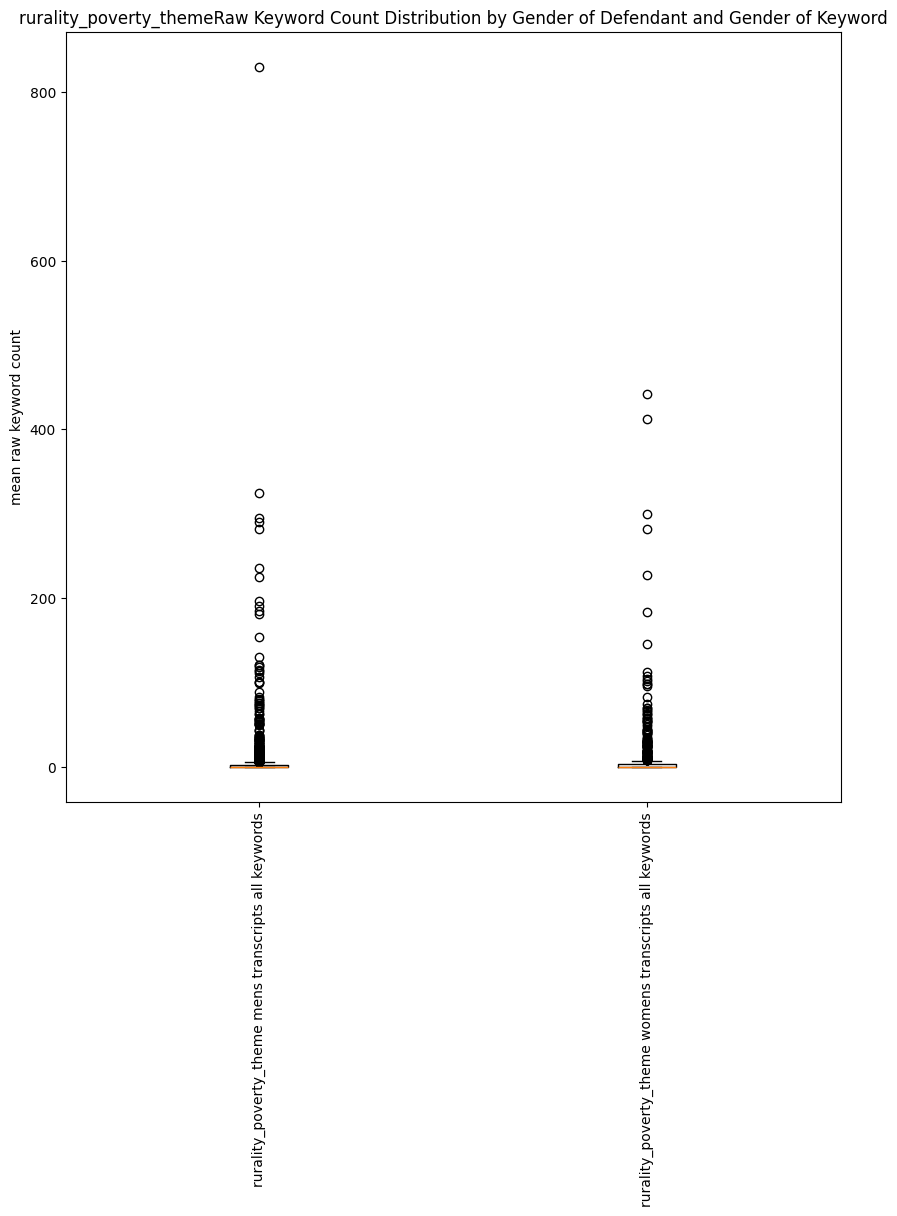

/tmp/ipython-input-467286614.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


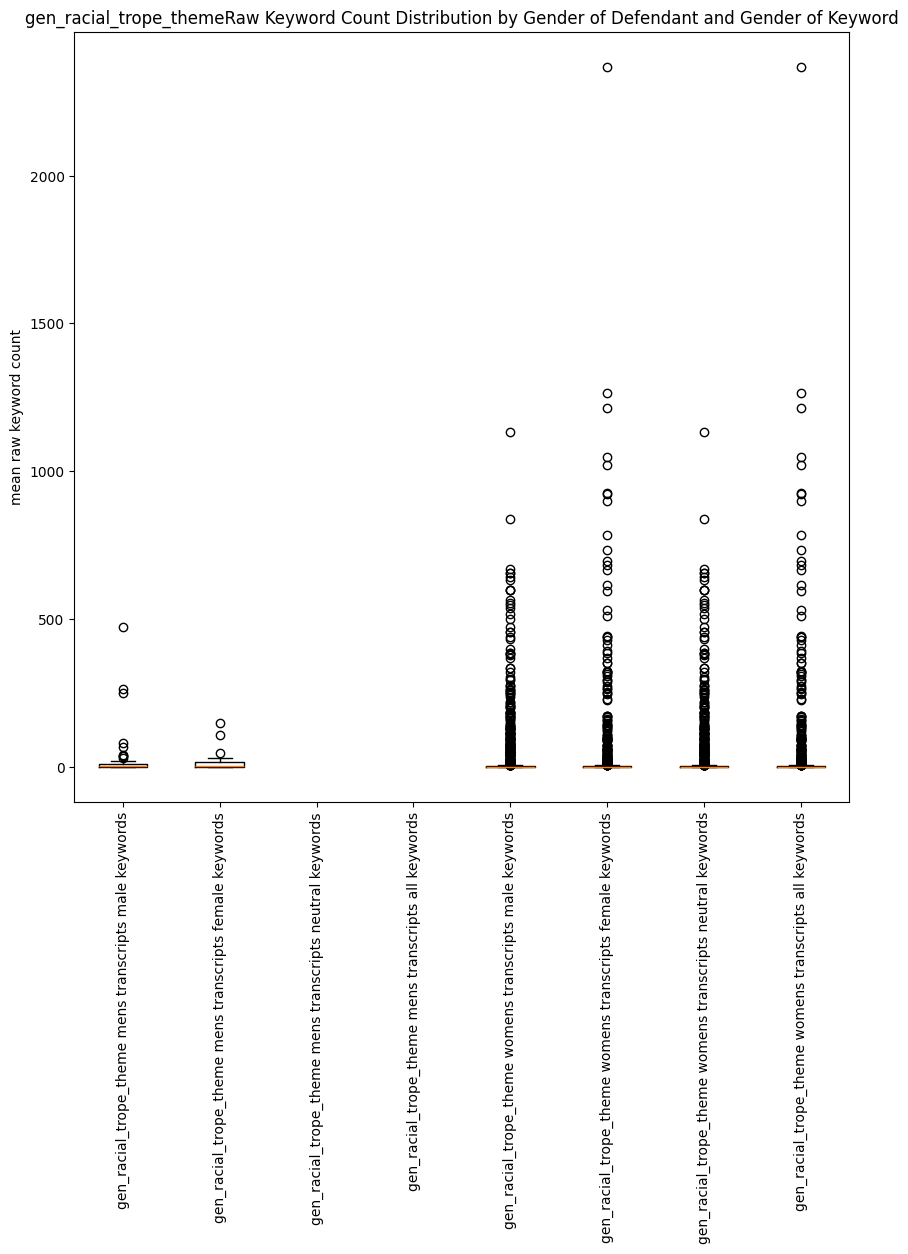

/tmp/ipython-input-467286614.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


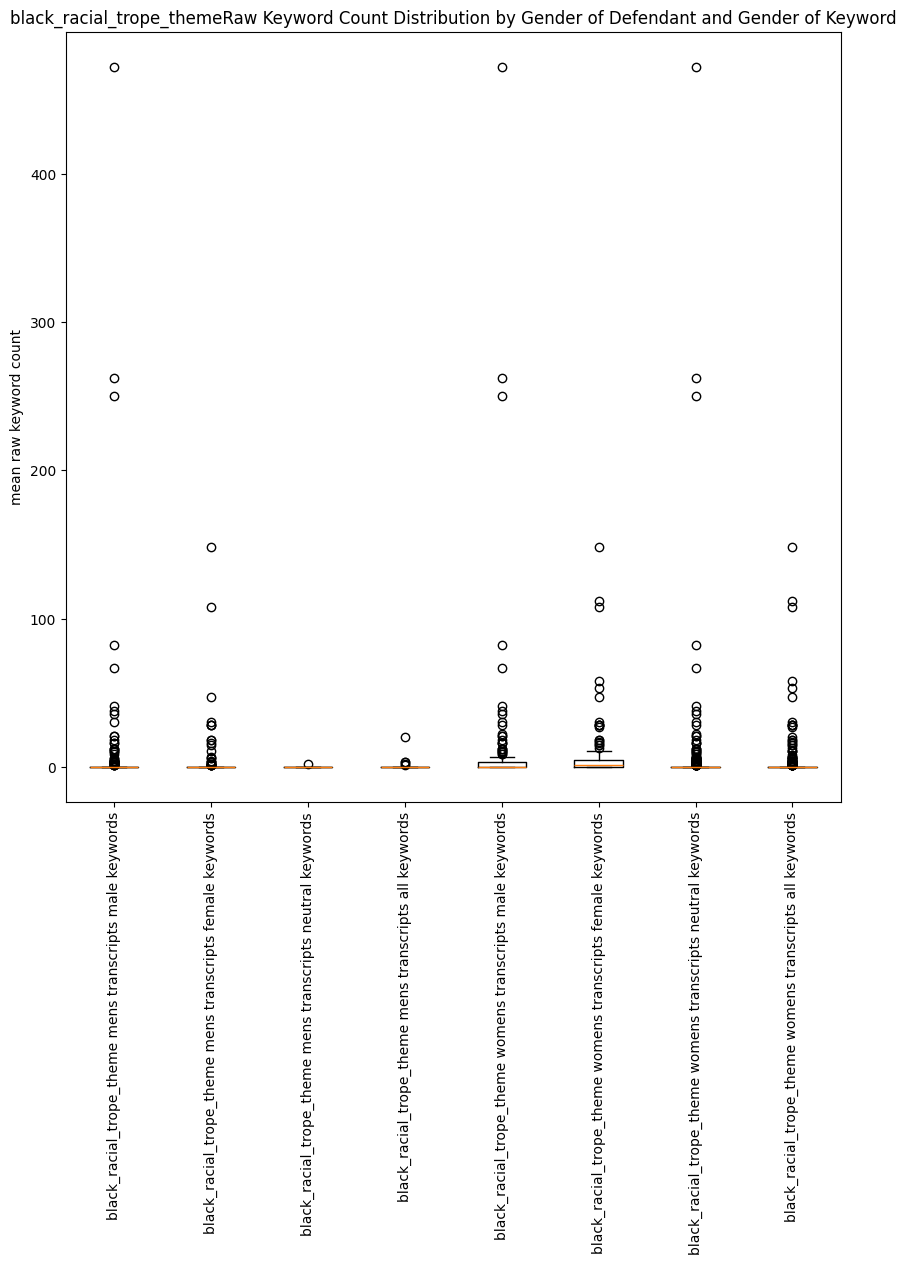

/tmp/ipython-input-467286614.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


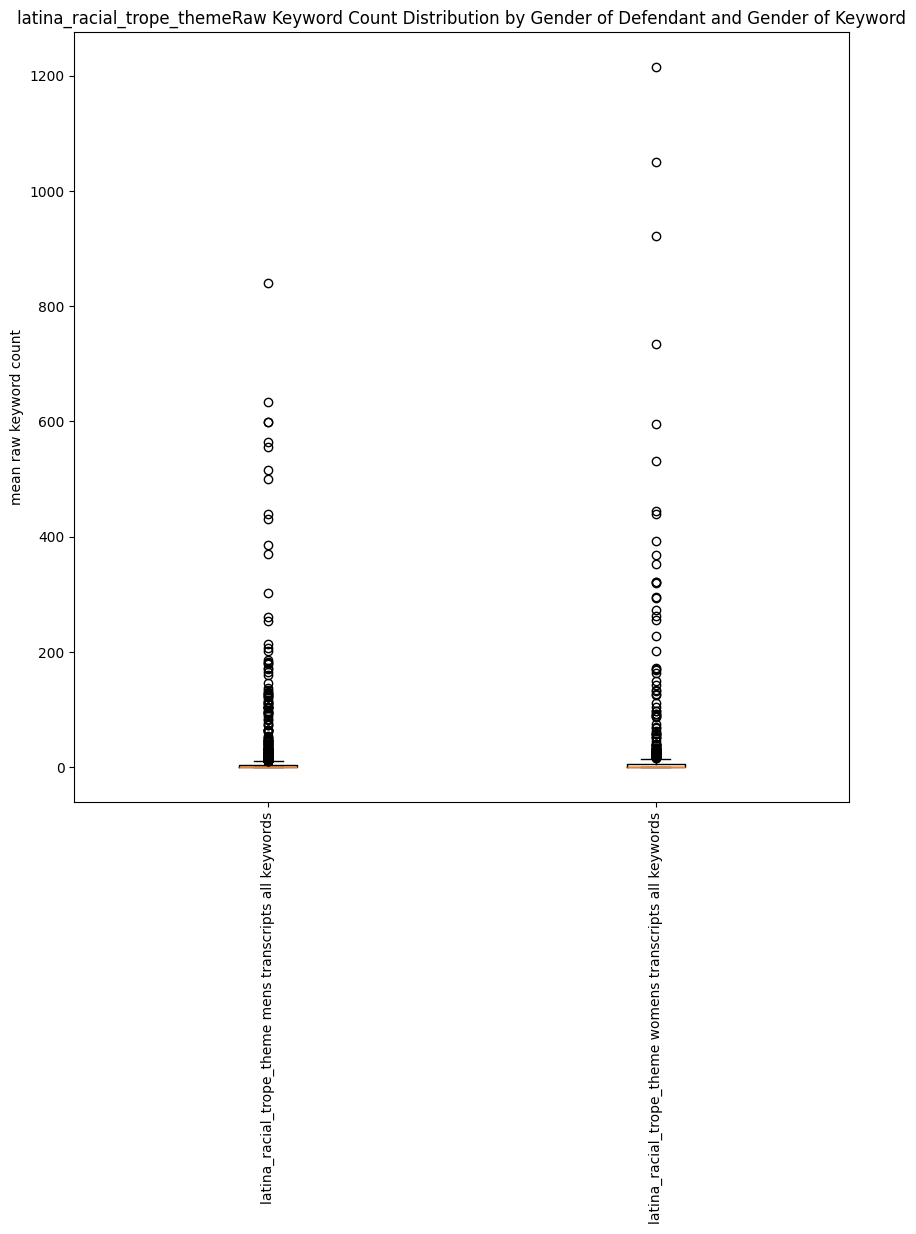

In [ ]:
for col in theme_types:
  men = raw_counts[raw_counts['gender']== 'man']
  women = raw_counts[raw_counts['gender']== 'woman']

  #mean count of each theme by gender

  men_theme_m =  men[(men[col]==True) & men['gendered_keyword_male'] == True]['raw_keyword_count']
  men_theme_f = men[(men[col]==True) & men['gendered_keyword_female'] == True]['raw_keyword_count']
  men_theme_n = men[(men[col]==True) & men['gender_neutral_keyword'] == True]['raw_keyword_count']
  men_theme_all = men[(men[col]==True)]['raw_keyword_count']


  women_theme_m = women[(women[col]==True) & women['gendered_keyword_male'] == True]['raw_keyword_count']
  women_theme_f = women[(women[col]==True) & women['gendered_keyword_female'] == True]['raw_keyword_count']
  women_theme_n = women[(women[col]==True) & women['gender_neutral_keyword'] == True]['raw_keyword_count']
  women_theme_all = women[(women[col]==True)]['raw_keyword_count']


  plt.figure(figsize=(10, 10))

  if len(men_theme_m) > 0:

    plt.boxplot([men_theme_m, women_theme_m,
                men_theme_f,  women_theme_f ,
                men_theme_n, women_theme_n,
                men_theme_all, women_theme_all], labels=[col + ' mens transcripts ' + 'male keywords',
                                                                                                              col + ' mens transcripts ' + 'female keywords',
                                                                                                              col + ' mens transcripts ' + 'neutral keywords',
                                                                                                              col + ' mens transcripts ' + 'all keywords',
                                                                                                              col + ' womens transcripts ' + 'male keywords',
                                                                                                              col + ' womens transcripts ' + 'female keywords',
                                                                                                              col + ' womens transcripts ' + 'neutral keywords',
                                                                                                              col + ' womens transcripts ' + 'all keywords']
    )




    plt.xticks(rotation=90)

    # Adding a title and labels
    plt.title(col + 'Raw Keyword Count Distribution by Gender of Defendant and Gender of Keyword')
    plt.ylabel('mean raw keyword count')

    # Display the plot
    plt.show()

  else:

    plt.boxplot([


                men_theme_all, women_theme_all], labels=[
                                                                                                              col + ' mens transcripts ' + 'all keywords',

                                                                                                              col + ' womens transcripts ' + 'all keywords']
    )




    plt.xticks(rotation=90)

    # Adding a title and labels
    plt.title(col + 'Raw Keyword Count Distribution by Gender of Defendant and Gender of Keyword')
    plt.ylabel('mean raw keyword count')

    # Display the plot
    plt.show()

Calculate TFIDF with docs

In [ ]:
raw_counts['document_word_count'] = [False] * 20601

In [ ]:
raw_counts['document_unique_word_count'] = [False] * 20601

In [ ]:
file_counts ={}

for file in raw_counts.document_name.unique():

  with open('/content/' +file, errors='ignore') as f:
    data = f.read()

    w = data.split()

    word_count = len(w)

    unique_count = len(list(set(w)))

    file_counts[file] = (word_count, unique_count)


    # Set 'NewColumn' to 100 where 'Category' is 'A'
    # raw_counts.loc[raw_counts['document_name'] == file, 'document_word_count'] = word_count
    # raw_counts.loc[raw_counts['document_name'] == file, 'document_unique_word_count'] = unique_count

In [ ]:
raw_counts

document_name gender  raw_keyword_count  \
0                            Wendi Andriano.txt  woman                  0   
1                            Wendi Andriano.txt  woman                 30   
2                            Wendi Andriano.txt  woman                  0   
3                            Wendi Andriano.txt  woman                  0   
4                            Wendi Andriano.txt  woman                489   
...                                         ...    ...                ...   
20785  Blaine Milam Combined Transcript OCR.txt    man                  4   
20786  Blaine Milam Combined Transcript OCR.txt    man                 67   
20787  Blaine Milam Combined Transcript OCR.txt    man                  0   
20788  Blaine Milam Combined Transcript OCR.txt    man                  2   
20789  Blaine Milam Combined Transcript OCR.txt    man                  0   

             keyword  pathologize_theme  hypersexualize_theme  \
0           lingerie              False                  True   
1              flirt              False                  True   
2              negro              False                 False   
3          matriarch              False                 False   
4             mother              False                 False   
...              ...                ...                   ...   
20785        neglect              False                 False   
20786         border              False                 False   
20787        hysteri               True                 False   
20788       atypical              False                 False   
20789  untrustworthy              False                 False   

       discredit_theme  immigration_theme  parent_theme  \
0                False              False         False   
1                False              False         False   
2                False              False         False   
3                False              False          True   
4                False              False          True   
...                ...                ...           ...   
20785            False              False         False   
20786            False               True         False   
20787             True              False         False   
20788             True              False         False   
20789            False               True         False   

       gender_sexuality_theme  ...  gen_racial_trope_theme  \
0                       False  ...                   False   
1                       False  ...                   False   
2                       False  ...                    True   
3                       False  ...                   False   
4                       False  ...                   False   
...                       ...  ...                     ...   
20785                    True  ...                   False   
20786                   False  ...                   False   
20787                   False  ...                   False   
20788                   False  ...                   False   
20789                   False  ...                   False   

       black_racial_trope_theme  latina_racial_trope_theme  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                          True                      False   
4                         False                      False   
...                         ...                        ...   
20785                     False                      False   
20786                     False                      False   
20787                     False                      False   
20788                     False                      False   
20789                     False                      False   

       gendered_keyword_male  gendered_keyword_female  gender_neutral_keyword  \
0                      False                    

In [ ]:
file_counts

{'Wendi Andriano.txt': (1078612, 26789),
 'Maureen McDermott.txt': (1430217, 46806),
 'Valerie Martin.txt': (593480, 24092),
 'Brooke Rottiers.txt': (739572, 28190),
 'Tiffany Moss.txt': (151358, 10777),
 'Blanche Taylor Moore.txt': (517945, 30105),
 'Kimberly Cargill.txt': (800318, 28853),
 'Susan Eubanks.txt': (590834, 27644),
 'Tierra Capri Gobble.txt': (150541, 11982),
 'Kerry Dalton.txt': (459919, 19873),
 'Tiffany Cole.txt': (225102, 13747),
 'Cherie Rhoades.txt': (270773, 17170),
 'Patricia Blackmon.txt': (129598, 12111),
 'Socorro Caro.txt': (2091311, 53511),
 'Taylor Parker.txt': (1157376, 36444),
 'Manling Williams.txt': (1211606, 33635),
 'Melissa Lucio.txt': (199926, 12023),
 'Tanya Nelson.txt': (490076, 29370),
 'Celeste Carrington.txt': (633515, 25354),
 'Christie Michelle Scott.txt': (632062, 22773),
 'Erica Sheppard.txt': (134451, 9838),
 'Darlie Routier.txt': (917420, 27988),
 'Brittany Holberg.txt': (291955, 20928),
 'Lisa Chamberlin.txt': (121490, 9001),
 'Maria Alfa

In [ ]:
raw_counts["document_word_count"]

0        1078612
1        1078612
2        1078612
3        1078612
4        1078612
          ...   
20785     920115
20786     920115
20787     920115
20788     920115
20789     920115
Name: document_word_count, Length: 20601, dtype: object

In [ ]:
raw_counts['term_frequency'] = raw_counts['raw_keyword_count']/ raw_counts['document_word_count']

total_womens_docs = len(raw_counts[raw_counts['gender']=='woman'].document_name.unique())
total_mens_docs = len(raw_counts[raw_counts['gender']=='man'].document_name.unique())

total_docs = len(raw_counts.document_name.unique())

In [ ]:
raw_counts['term_frequency']

0             0.0
1        0.000028
2             0.0
3             0.0
4        0.000453
           ...   
20785    0.000004
20786    0.000073
20787         0.0
20788    0.000002
20789         0.0
Name: term_frequency, Length: 20601, dtype: object

In [ ]:
N_womens_docs_with_K = dict()

#get number of docs with term t for each term
k = raw_counts.keyword.unique()


women_only = raw_counts[raw_counts['gender']=='woman']

for keyword in k:

  #need to also specify keyword_theme otherwise the keyword will be counted multiple times for each theme/ or specify only one row per document_name

  docs_with_term = len(women_only[(women_only['keyword']==keyword)  & (women_only['raw_keyword_count'] > 0) ].drop_duplicates(subset=['document_name'], keep='first'))
  # print(keyword)
  # print(docs_with_term)

  N_womens_docs_with_K[keyword] = docs_with_term


In [ ]:
N_mens_docs_with_K = dict()

#get number of docs with term t for each term
k = raw_counts.keyword.unique()


men_only = raw_counts[raw_counts['gender']=='man']

for keyword in k:

  #need to also specify keyword_theme otherwise the keyword will be counted multiple times for each theme/ or specify only one row per document_name

  docs_with_term = len(men_only[(men_only['keyword']==keyword)  & (men_only['raw_keyword_count'] > 0) ].drop_duplicates(subset=['document_name'], keep='first'))
  # print(keyword)
  # print(docs_with_term)

  N_mens_docs_with_K[keyword] = docs_with_term

In [ ]:
N_docs_with_K = dict()

#get number of docs with term t for each term
k = raw_counts.keyword.unique()


copy = raw_counts

for keyword in k:

  #need to also specify keyword_theme otherwise the keyword will be counted multiple times for each theme/ or specify only one row per document_name

  docs_with_term = len(copy[(copy['keyword']==keyword)  & (copy['raw_keyword_count'] > 0) ].drop_duplicates(subset=['document_name'], keep='first'))
  # print(keyword)
  # print(docs_with_term)

  N_docs_with_K[keyword] = docs_with_term

In [ ]:
raw_counts['women_only_tfidf_11_25']

0        0.000000
1        0.000037
2        0.000000
3        0.000000
4        0.000000
           ...   
20785    0.000000
20786    0.000000
20787    0.000000
20788    0.000000
20789    0.000000
Name: women_only_tfidf_11_25, Length: 20601, dtype: float64

In [ ]:
N_docs_with_K['lie']

109

In [ ]:
41/5

In [ ]:


raw_counts['women_only_tfidf_11_25'] = np.where( (raw_counts['keyword'].map(N_womens_docs_with_K) ==0) | (raw_counts['gender']=='man') , 0, raw_counts['term_frequency'] * np.log( total_womens_docs / raw_counts['keyword'].map(N_womens_docs_with_K) ))

In [ ]:
raw_counts['men_only_tfidf_11_25'] = np.where( (raw_counts['keyword'].map(N_mens_docs_with_K) ==0) | (raw_counts['gender']=='woman') , 0, raw_counts['term_frequency'] * np.log( total_mens_docs / raw_counts['keyword'].map(N_mens_docs_with_K) ))

In [ ]:
raw_counts['overall_tfidf_11_25'] = np.where( (raw_counts['keyword'].map(N_docs_with_K) ==0), 0, raw_counts['term_frequency'] * np.log( total_docs / raw_counts['keyword'].map(N_docs_with_K) ))

In [ ]:
raw_counts['women_only_tfidf_11_25'] = raw_counts['women_only_tfidf_11_25'].astype(int)


In [ ]:
# raw_counts['women_only_tfidf_11_25'].to_numeric()
raw_counts['women_only_tfidf_11_25'] = raw_counts['women_only_tfidf_11_25'].astype(float)
raw_counts['men_only_tfidf_11_25'] = raw_counts['men_only_tfidf_11_25'].astype(float)
raw_counts['overall_tfidf_11_25'] = raw_counts['overall_tfidf_11_25'].astype(float)

In [ ]:
# raw_counts['overall_tfidf_11_24'] = np.where( (raw_counts['keyword'].map(N_docs_with_K) ==0)  , 0, raw_counts['term_frequency'] * np.log( total_docs / raw_counts['keyword'].map(N_docs_with_K) ))

/tmp/ipython-input-811171270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_counts['overall_tfidf_11_24'] = np.where( (raw_counts['keyword'].map(N_docs_with_K) ==0)  , 0, raw_counts['term_frequency'] * np.log( total_docs / raw_counts['keyword'].map(N_docs_with_K) ))


In [ ]:
# raw_counts['men_only_tfidf_11_24'] = np.where( (raw_counts['keyword'].map(N_mens_docs_with_K) ==0) | (raw_counts['gender']=='woman') , 0, raw_counts['term_frequency'] * np.log( total_mens_docs / raw_counts['keyword'].map(N_mens_docs_with_K) ))

/tmp/ipython-input-4286530620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_counts['men_only_tfidf_11_24'] = np.where( (raw_counts['keyword'].map(N_mens_docs_with_K) ==0) | (raw_counts['gender']=='woman') , 0, raw_counts['term_frequency'] * np.log( total_mens_docs / raw_counts['keyword'].map(N_mens_docs_with_K) ))


In [ ]:
raw_counts.to_csv('raw_tfidf_11_25.csv')

#Top 20 Keywords with highest Mean TFIDF and Mean Raw Counts

Raw word counts overall

Women only raw word counts

Men only raw word counts

Overall TF-IDF (most significant words in our corpus)

Women only TF-IDF (most significant words in women only corpus)

Men only TF-IDF (most significant in men only corpus)


In [ ]:
g = raw_counts.groupby('keyword', sort=True)['raw_keyword_count'].mean().nlargest(20)
g

keyword
lie          787.899083
man          723.366972
ass          621.917431
ape          299.908257
bra          241.633028
different    224.761468
home         206.091743
mother       164.678899
mom          156.055046
father        85.036697
husband       68.321101
drugs         57.899083
woman         57.311927
wife          56.899083
sex           55.027523
liar          54.467890
dad           51.697248
cry           40.633028
lady          30.366972
violent       26.467890
Name: raw_keyword_count, dtype: float64

In [ ]:
raw_counts[raw_counts['gender']=='woman'].groupby('keyword', sort=True)['raw_keyword_count'].mean().nlargest(20)


keyword
lie             1064.536585
man              938.731707
ass              694.121951
ape              399.780488
home             299.780488
different        282.804878
mother           245.341463
bra              235.097561
mom              226.926829
husband          126.902439
woman            113.975610
father           107.975610
wife              77.243902
sex               72.975610
drugs             71.487805
liar              69.731707
dad               58.829268
cry               54.829268
lady              41.926829
inconsistent      34.073171
Name: raw_keyword_count, dtype: float64

In [ ]:
raw_counts[raw_counts['gender']=='man'].groupby('keyword', sort=True)['raw_keyword_count'].mean().nlargest(20)


keyword
lie          621.102941
man          593.514706
ass          578.382353
bra          245.573529
ape          239.691176
different    189.764706
home         149.602941
mother       116.044118
mom          113.323529
father        71.205882
drugs         49.705882
dad           47.397059
liar          45.264706
wife          44.632353
sex           44.205882
husband       33.000000
cry           32.073529
cocaine       30.808824
marijuana     25.000000
violent       25.000000
Name: raw_keyword_count, dtype: float64

In [ ]:
raw_counts[raw_counts['gender']=='woman'].groupby('keyword', sort=True)['women_only_tfidf_11_25'].mean().nlargest(20)


keyword
child abuse     0.000022
cocaine         0.000017
malinger        0.000017
gay             0.000015
gang            0.000013
heroin          0.000011
marijuana       0.000011
drugs           0.000011
butch           0.000009
culture         0.000009
custom          0.000008
welfare         0.000007
fake            0.000007
border          0.000007
sex             0.000007
inhuman         0.000006
teddy           0.000006
bitch           0.000006
manipulative    0.000005
sexy            0.000005
Name: women_only_tfidf_11_25, dtype: float64

In [ ]:
raw_counts[raw_counts['gender']=='man'].groupby('keyword', sort=True)['men_only_tfidf_11_25'].mean().nlargest(20)


keyword
gang            0.000027
cocaine         0.000027
child abuse     0.000020
marijuana       0.000015
malinger        0.000014
heroin          0.000013
english         0.000009
sex             0.000008
border          0.000008
butch           0.000006
abandonment     0.000006
food stamps     0.000006
corroborate     0.000006
culture         0.000006
lazy            0.000005
manipulat       0.000005
aggressive      0.000005
animal          0.000005
disorganized    0.000005
dirty           0.000004
Name: men_only_tfidf_11_25, dtype: float64

In [ ]:

raw_counts['overall_tfidf_11_25'] = raw_counts['overall_tfidf_11_25'].astype(float)
raw_counts.groupby('keyword', sort=True)['overall_tfidf_11_25'].mean().nlargest(20)


keyword
cocaine        0.000023
gang           0.000022
child abuse    0.000022
marijuana      0.000016
malinger       0.000015
heroin         0.000012
gay            0.000008
sex            0.000008
butch          0.000008
english        0.000007
border         0.000007
culture        0.000007
drugs          0.000007
welfare        0.000006
manipulat      0.000006
fake           0.000006
abandonment    0.000006
corroborate    0.000005
food stamps    0.000005
neglect        0.000005
Name: overall_tfidf_11_25, dtype: float64

In [ ]:
raw_counts['overall_tfidf_11_25'] = raw_counts['overall_tfidf_11_25'].astype(float)

raw_counts[raw_counts['gender']=='woman'].groupby('keyword', sort=True)['overall_tfidf_11_25'].mean().nlargest(20)


keyword
child abuse     0.000030
cocaine         0.000018
malinger        0.000018
gay             0.000015
gang            0.000012
welfare         0.000011
heroin          0.000011
butch           0.000011
fake            0.000010
culture         0.000009
neglect         0.000009
manipulat       0.000009
inhuman         0.000008
manipulative    0.000008
sex             0.000007
abandonment     0.000007
marijuana       0.000007
bitch           0.000007
drugs           0.000007
sexy            0.000007
Name: overall_tfidf_11_25, dtype: float64

In [ ]:
raw_counts[raw_counts['gender']=='man'].groupby('keyword', sort=True)['overall_tfidf_11_25'].mean().nlargest(20)


keyword
gang            0.000028
cocaine         0.000026
marijuana       0.000021
child abuse     0.000017
malinger        0.000014
heroin          0.000013
english         0.000009
border          0.000008
sex             0.000008
drugs           0.000006
food stamps     0.000006
butch           0.000006
culture         0.000006
lazy            0.000005
corroborate     0.000005
aggressive      0.000005
animal          0.000005
custom          0.000005
abandonment     0.000005
disorganized    0.000004
Name: overall_tfidf_11_25, dtype: float64

In [ ]:
raw_counts[raw_counts['gender']=='woman'].groupby('keyword', sort=True)['overall_tfidf_11_25'].mean().nlargest(20)


keyword
child abuse     0.000030
cocaine         0.000018
malinger        0.000018
gay             0.000015
gang            0.000012
welfare         0.000011
heroin          0.000011
butch           0.000011
fake            0.000010
culture         0.000009
neglect         0.000009
manipulat       0.000009
inhuman         0.000008
manipulative    0.000008
sex             0.000007
abandonment     0.000007
marijuana       0.000007
bitch           0.000007
drugs           0.000007
sexy            0.000007
Name: overall_tfidf_11_25, dtype: float64

In [ ]:
raw_counts

document_name gender  raw_keyword_count  \
0                            Wendi Andriano.txt  woman                  0   
1                            Wendi Andriano.txt  woman                 30   
2                            Wendi Andriano.txt  woman                  0   
3                            Wendi Andriano.txt  woman                  0   
4                            Wendi Andriano.txt  woman                489   
...                                         ...    ...                ...   
20785  Blaine Milam Combined Transcript OCR.txt    man                  4   
20786  Blaine Milam Combined Transcript OCR.txt    man                 67   
20787  Blaine Milam Combined Transcript OCR.txt    man                  0   
20788  Blaine Milam Combined Transcript OCR.txt    man                  2   
20789  Blaine Milam Combined Transcript OCR.txt    man                  0   

             keyword  pathologize_theme  hypersexualize_theme  \
0           lingerie              False                  True   
1              flirt              False                  True   
2              negro              False                 False   
3          matriarch              False                 False   
4             mother              False                 False   
...              ...                ...                   ...   
20785        neglect              False                 False   
20786         border              False                 False   
20787        hysteri               True                 False   
20788       atypical              False                 False   
20789  untrustworthy              False                 False   

       discredit_theme  immigration_theme  parent_theme  \
0                False              False         False   
1                False              False         False   
2                False              False         False   
3                False              False          True   
4                False              False          True   
...                ...                ...           ...   
20785            False              False         False   
20786            False               True         False   
20787             True              False         False   
20788             True              False         False   
20789            False               True         False   

       gender_sexuality_theme  ...  co_defendant_match  \
0                       False  ...               False   
1                       False  ...               False   
2                       False  ...               False   
3                       False  ...               False   
4                       False  ...               False   
...                       ...  ...                 ...   
20785                    True  ...               False   
20786                   False  ...               False   
20787                   False  ...               False   
20788                   False  ...               False   
20789                   False  ...               False   

       race_state_crime_match  word_count  unique_word_count  doc_word_count  \
0                        True     1078612              26789         1078612   
1                        True     1078612              26789         1078612   
2                        True     1078612              26789         1078612   
3                        True     1078612              26789         1078612   
4                        True     1078612              26789         1078612   
...                       ...         ...                ...             ...   
20785                    True      920115              30899          920115   
20786                    True      920115              30899          920115   
20787                    True      920115              30899          920115   
20788                    True      920115              30899          920115   
20789                    True      920115 

Generate Boxplots of Raw and TF-IDF Counts

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


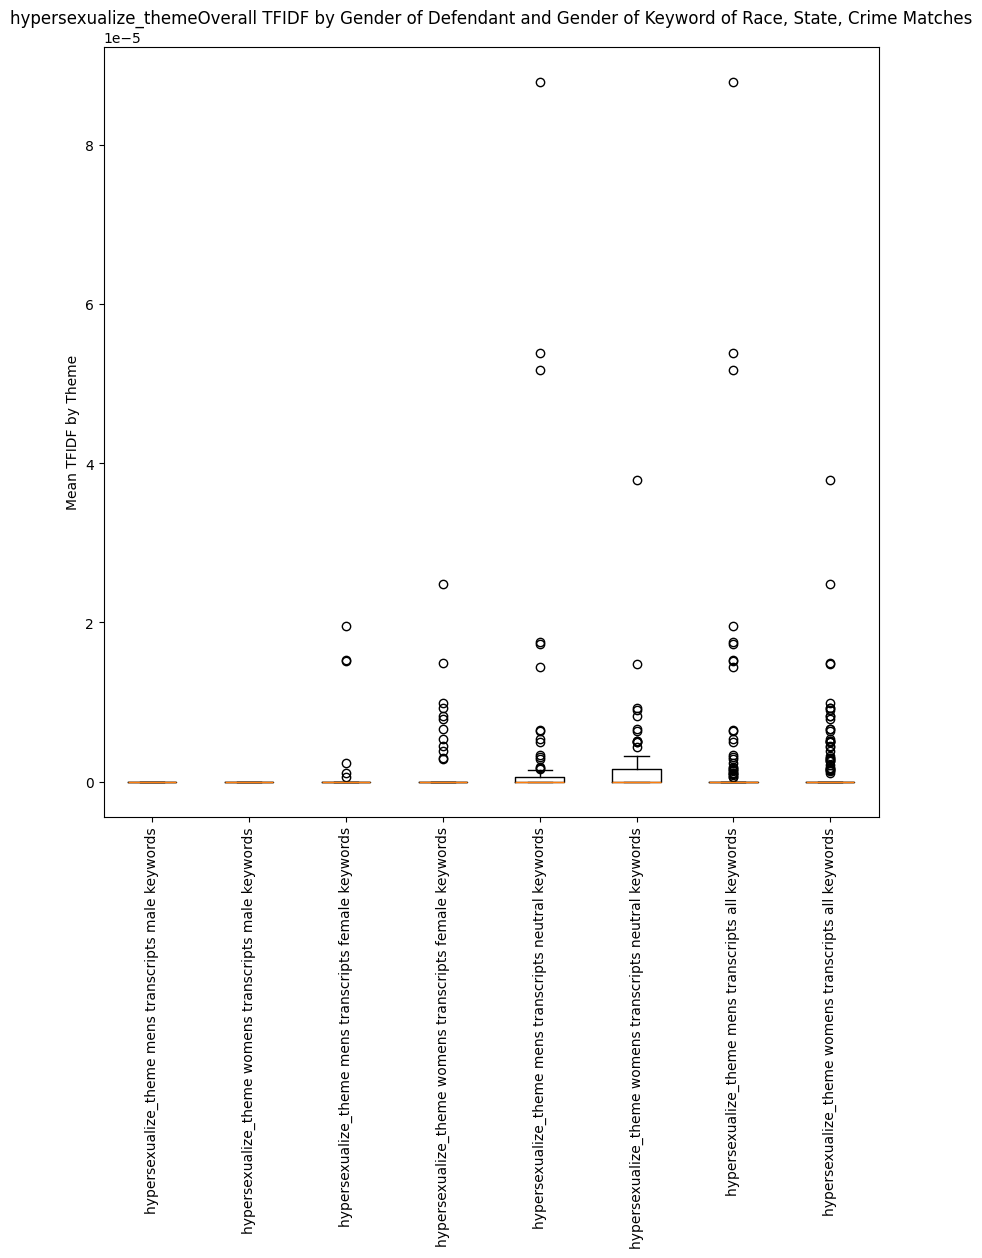

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


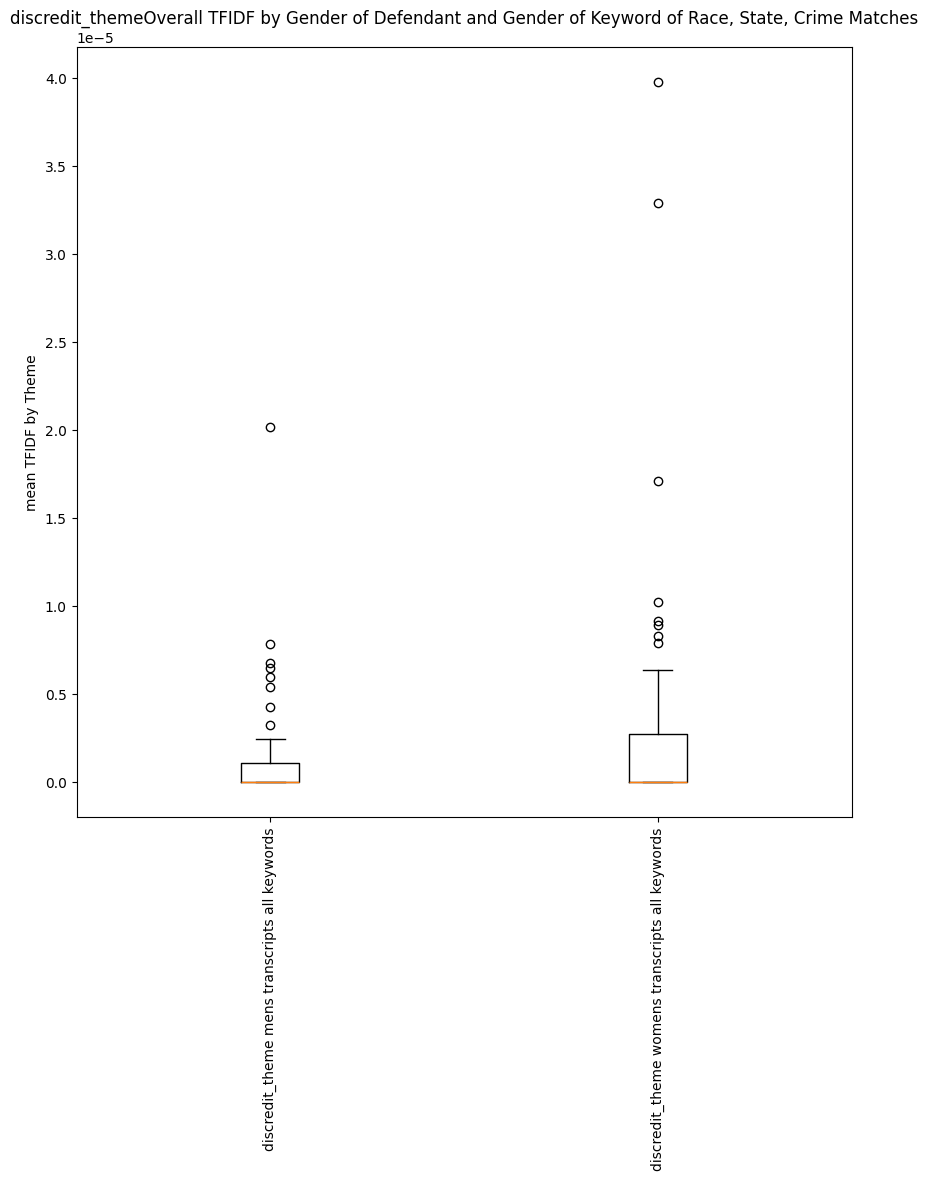

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


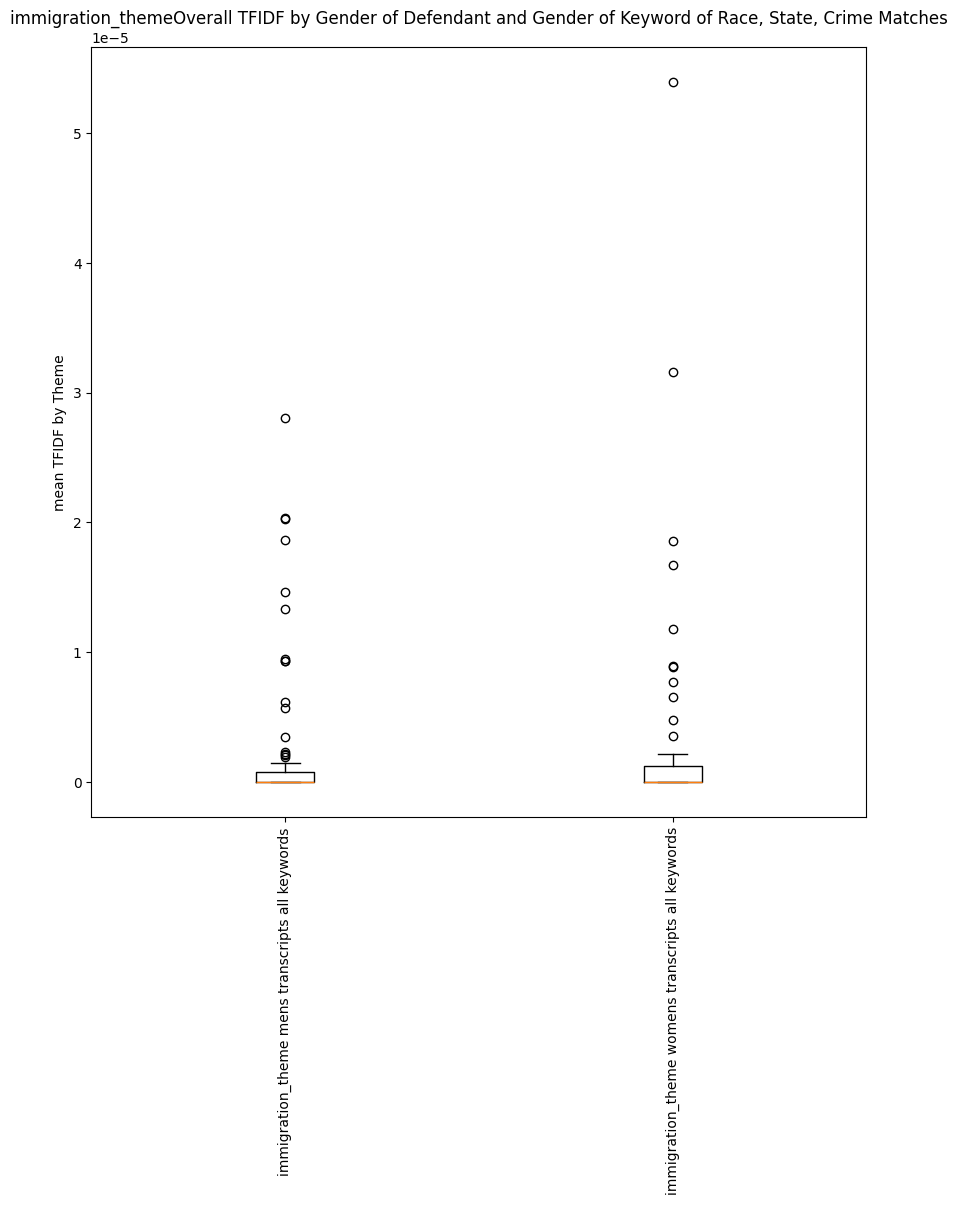

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


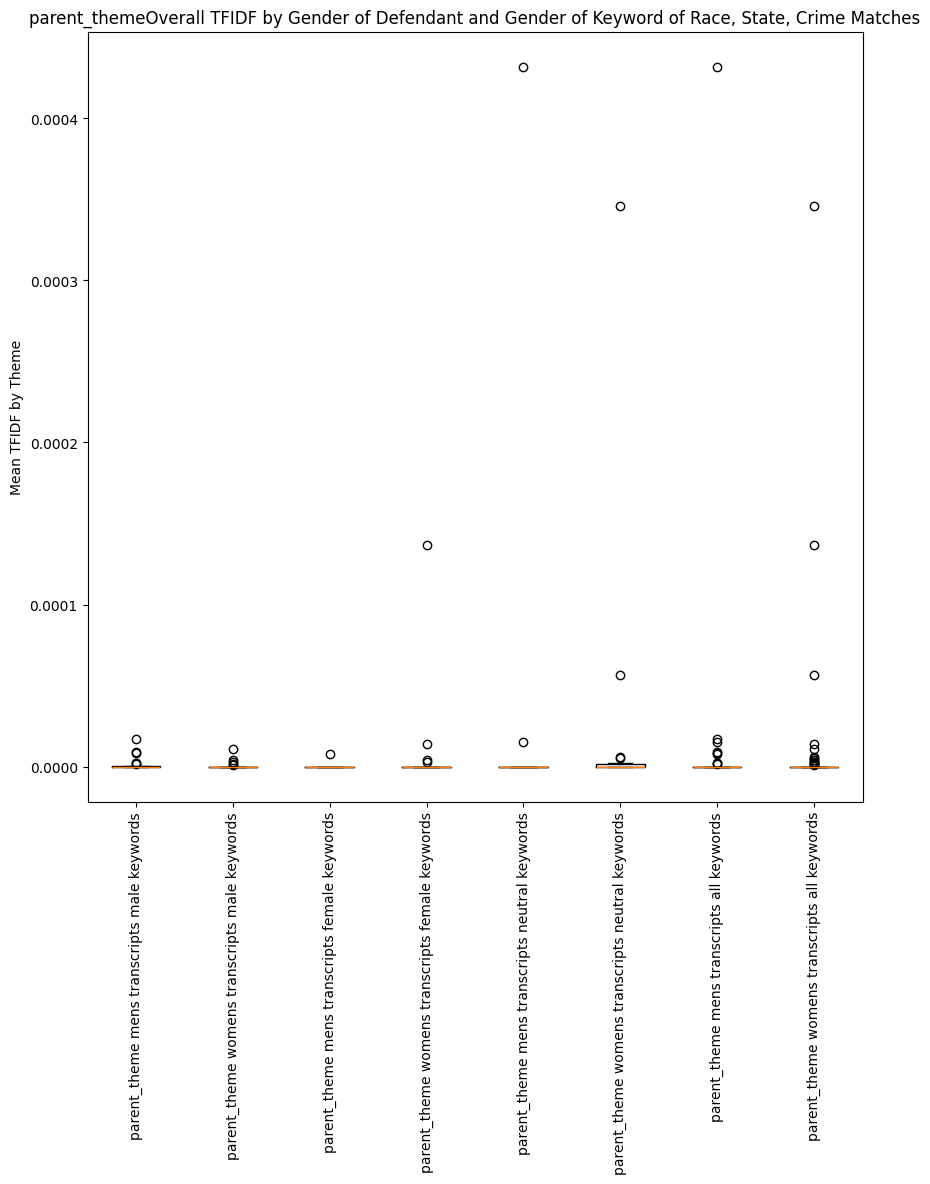

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


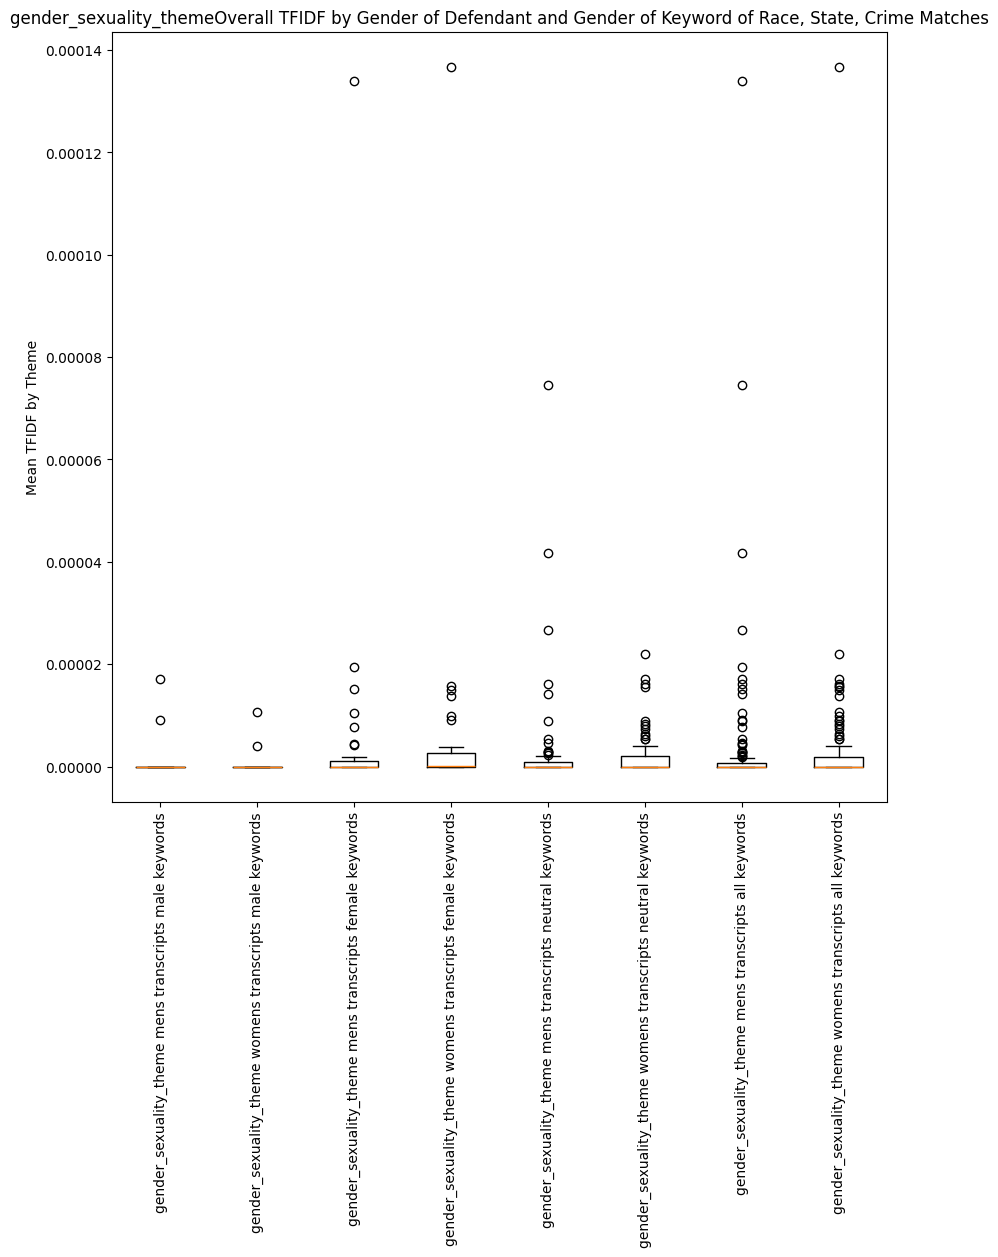

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


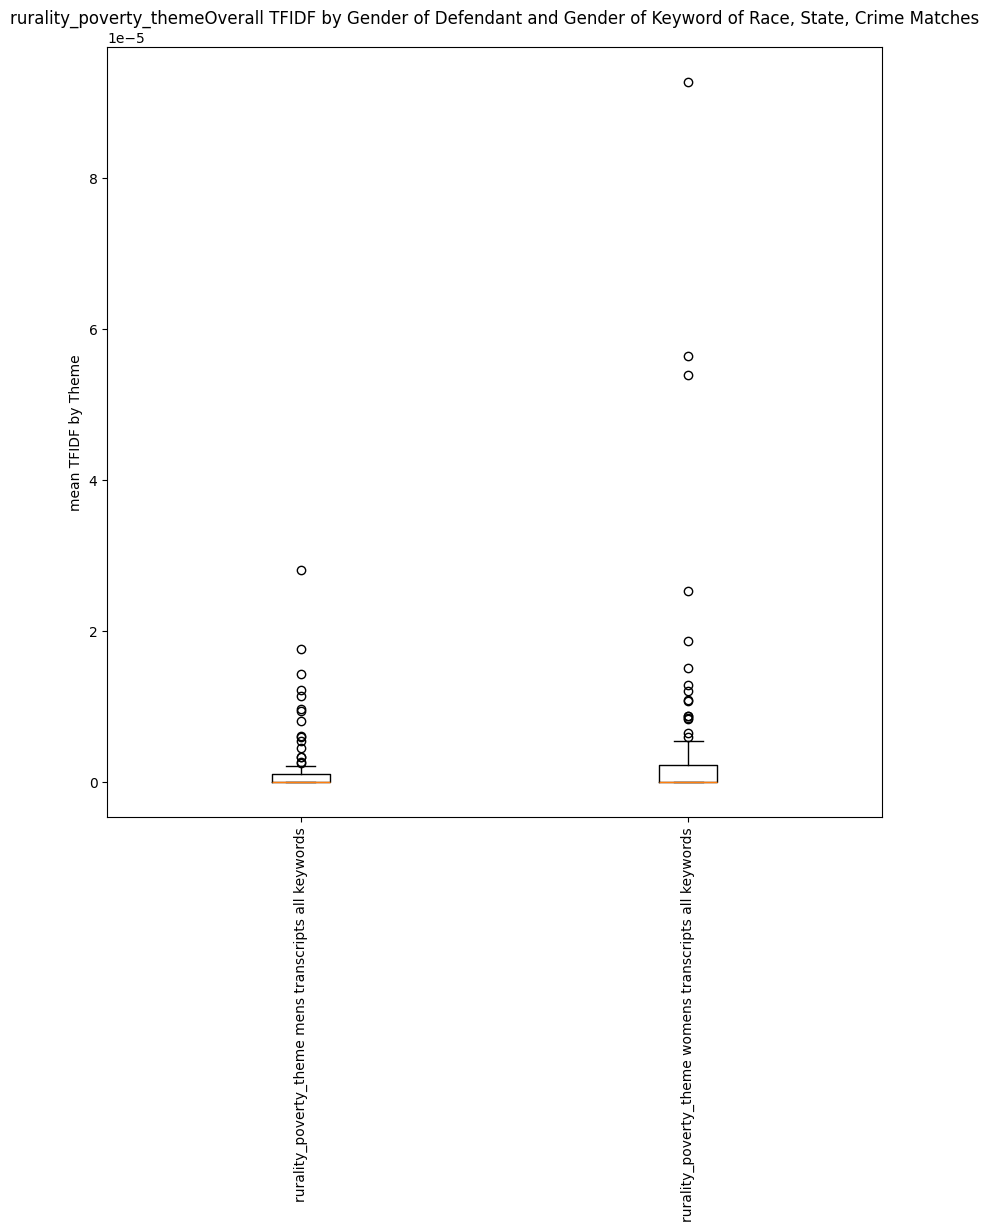

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


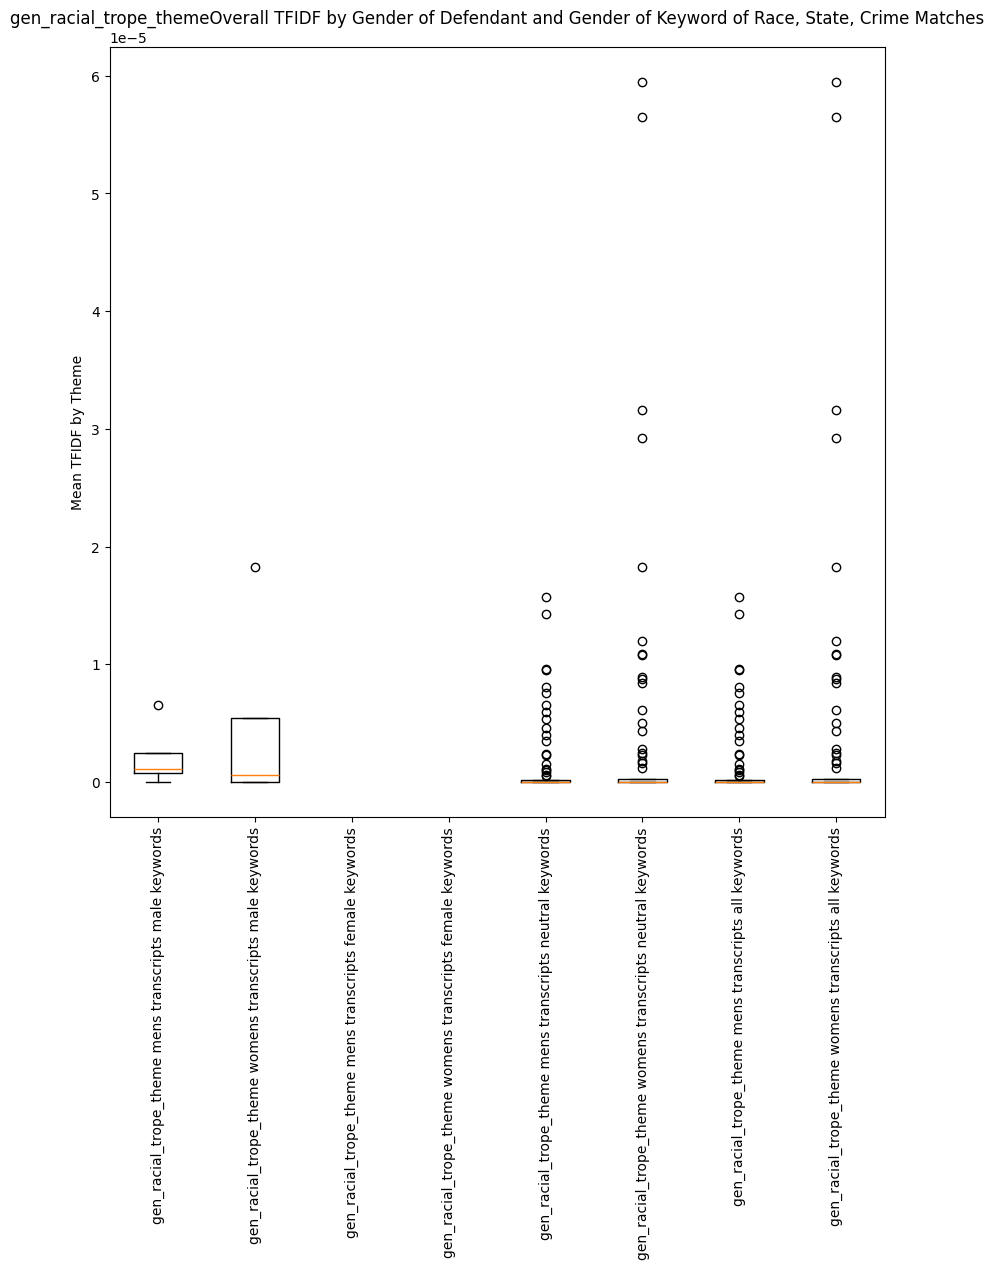

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


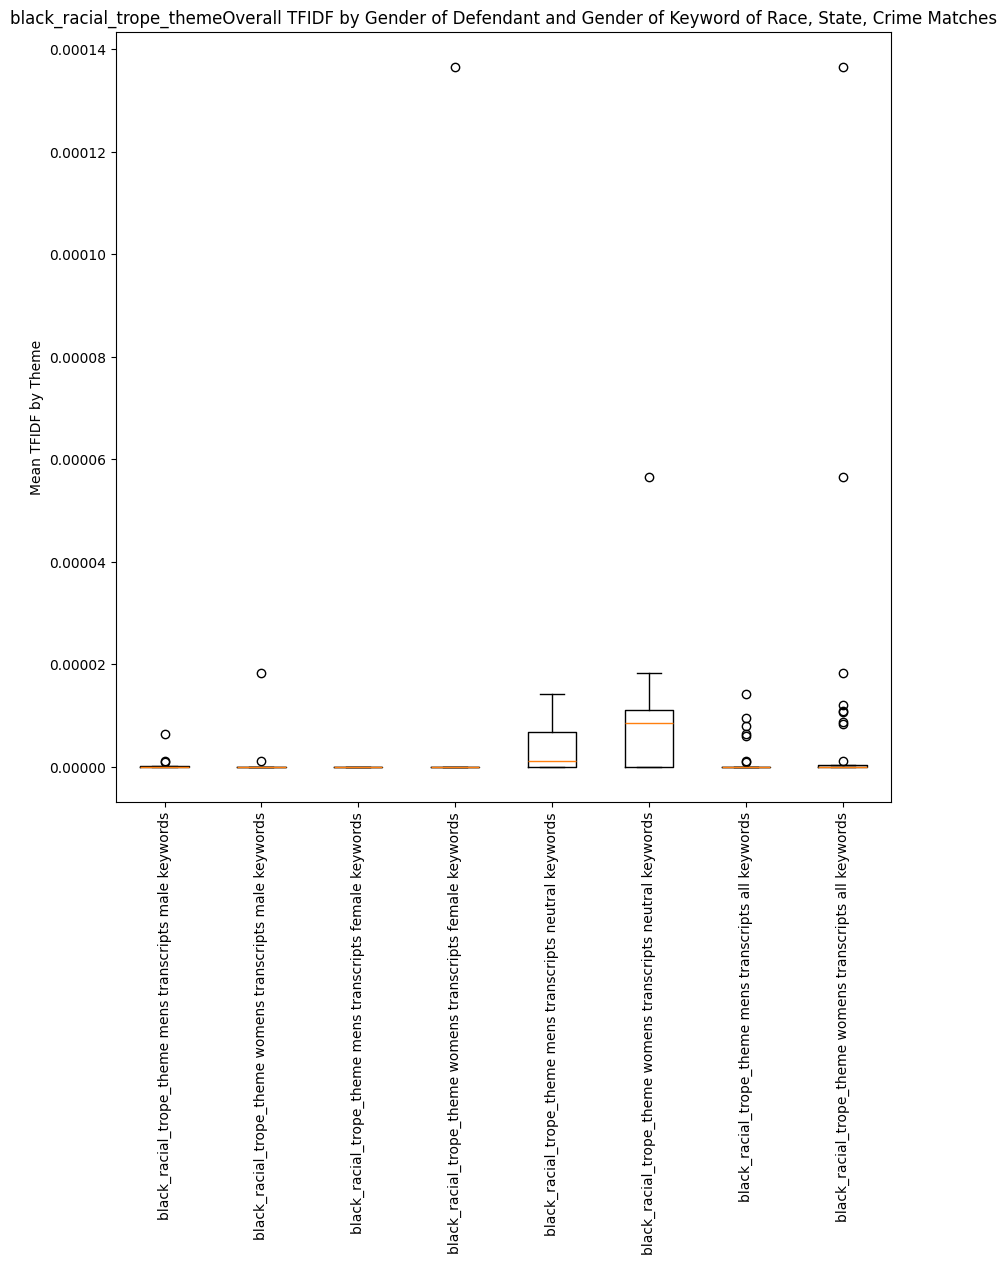

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


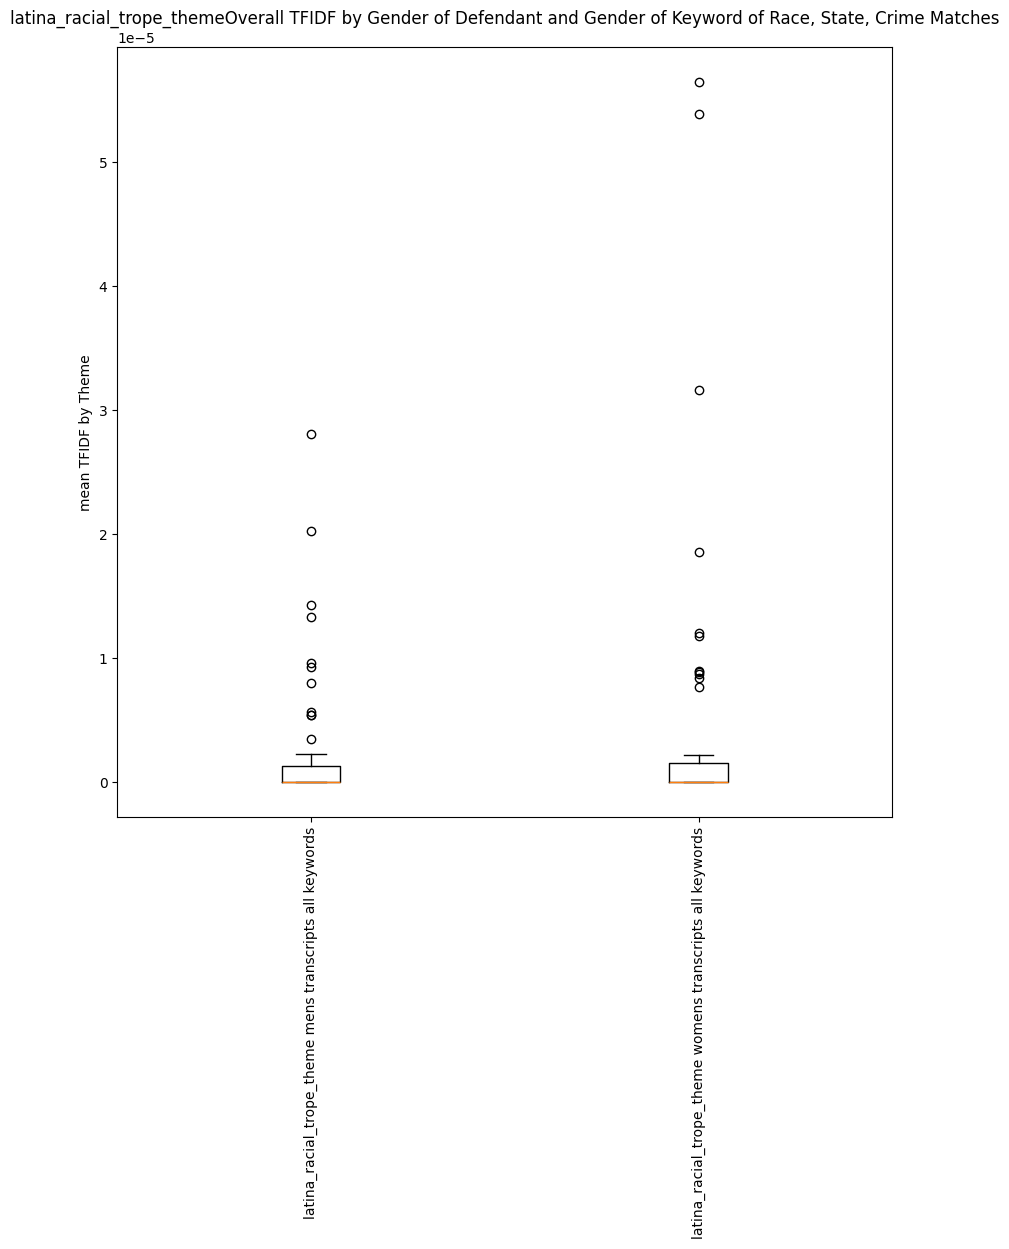

In [ ]:
generate_boxplots( raw_counts[raw_counts['co_defendant_match']== True] , theme_types, 'overall_tfidf_11_25', 'Race, State, Crime Matches')


/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


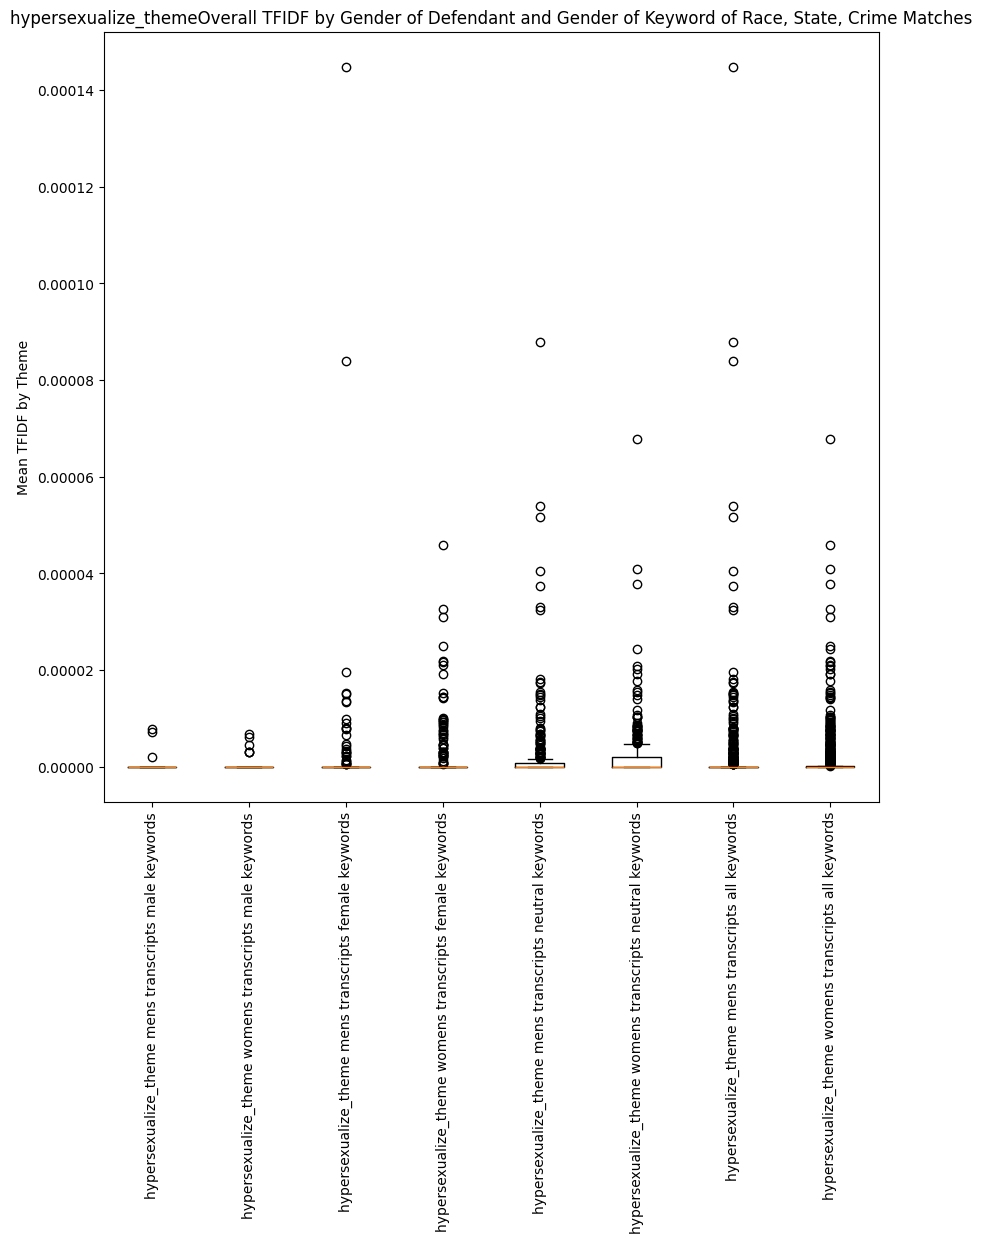

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


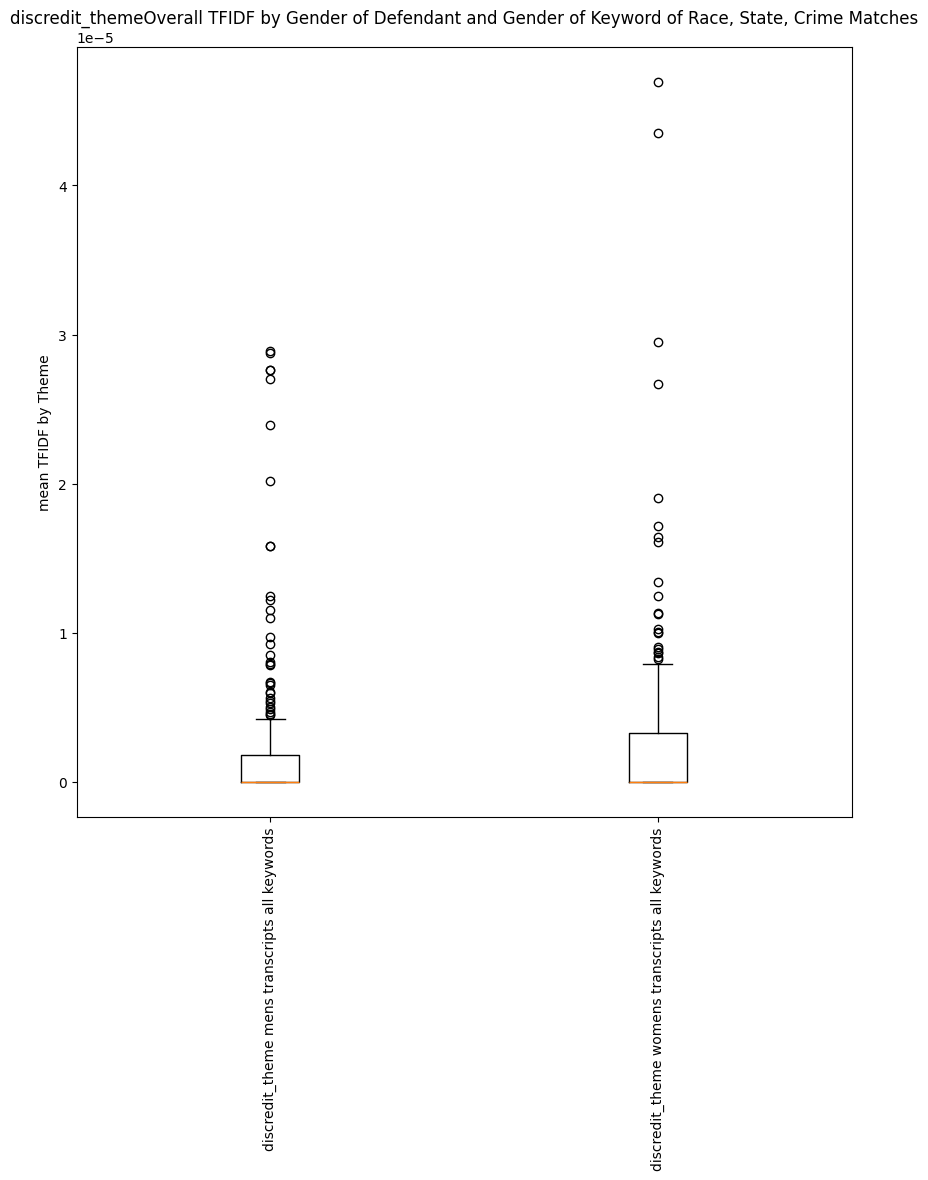

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


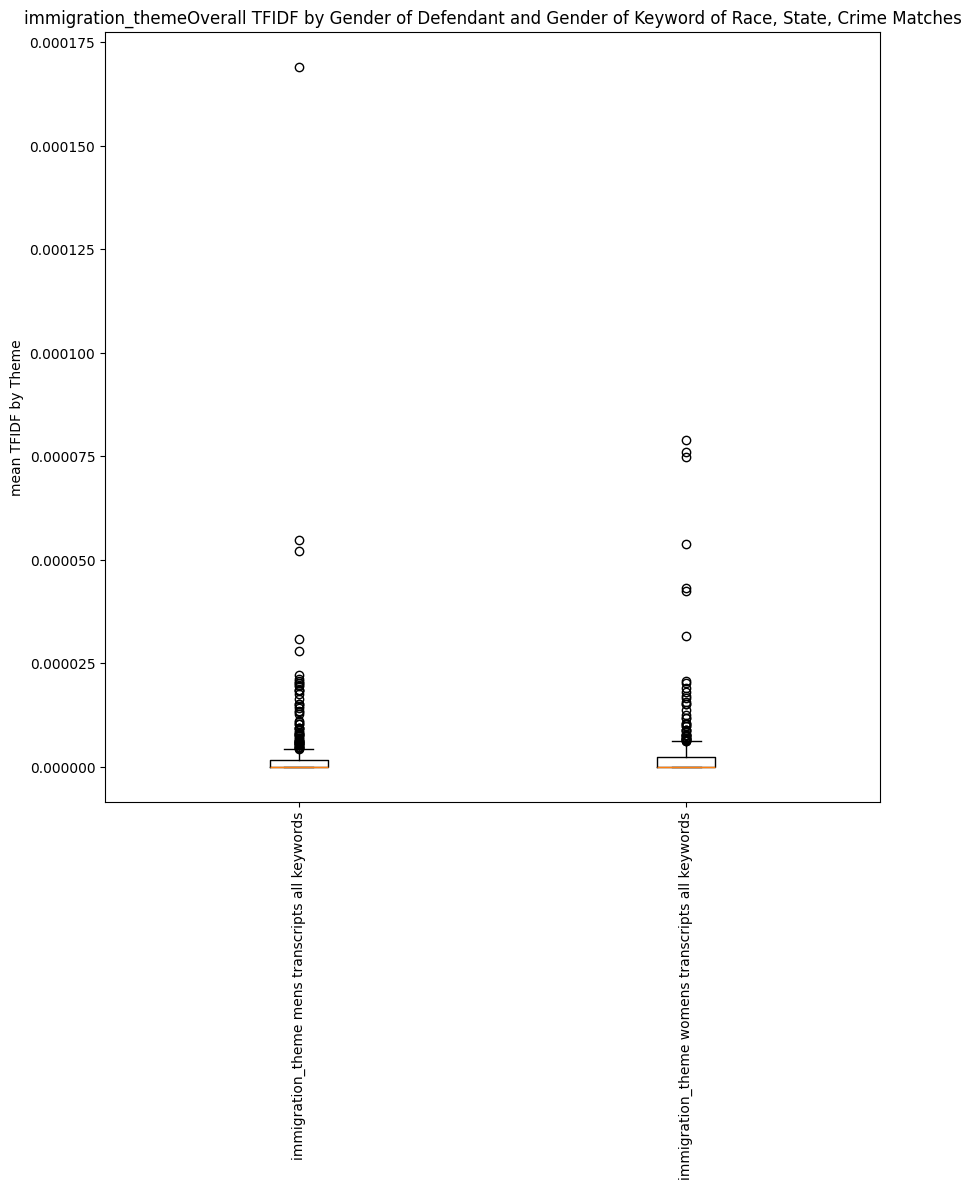

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


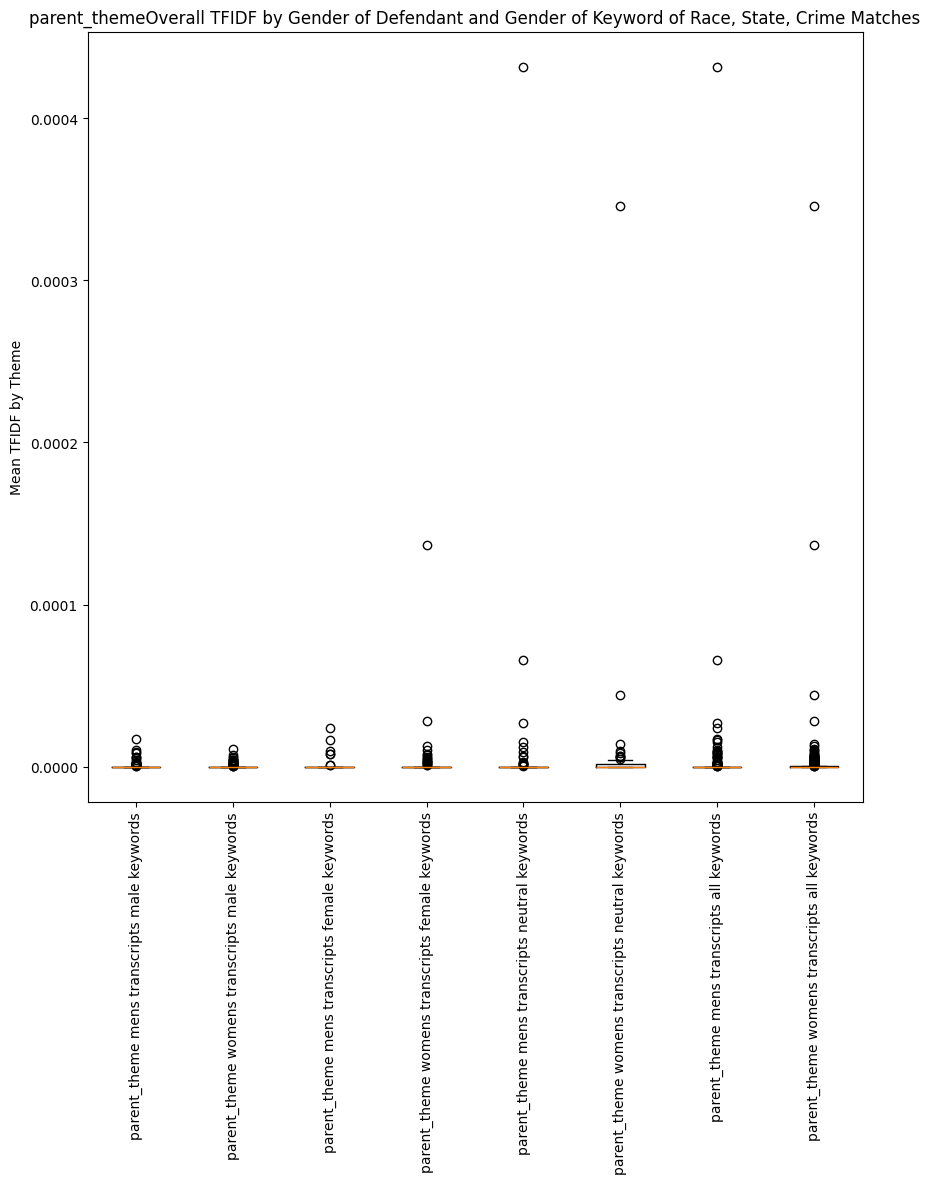

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


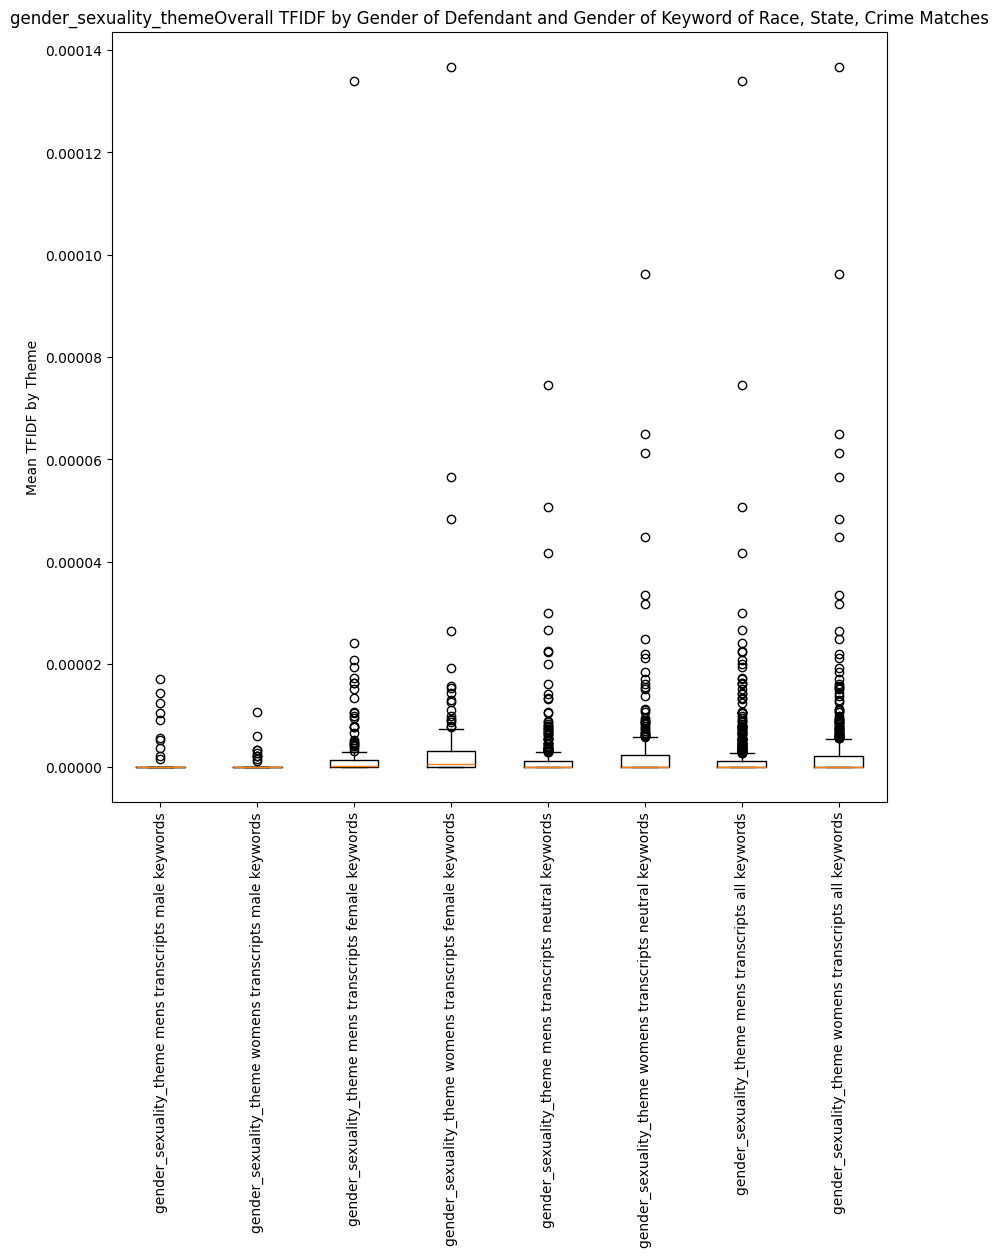

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


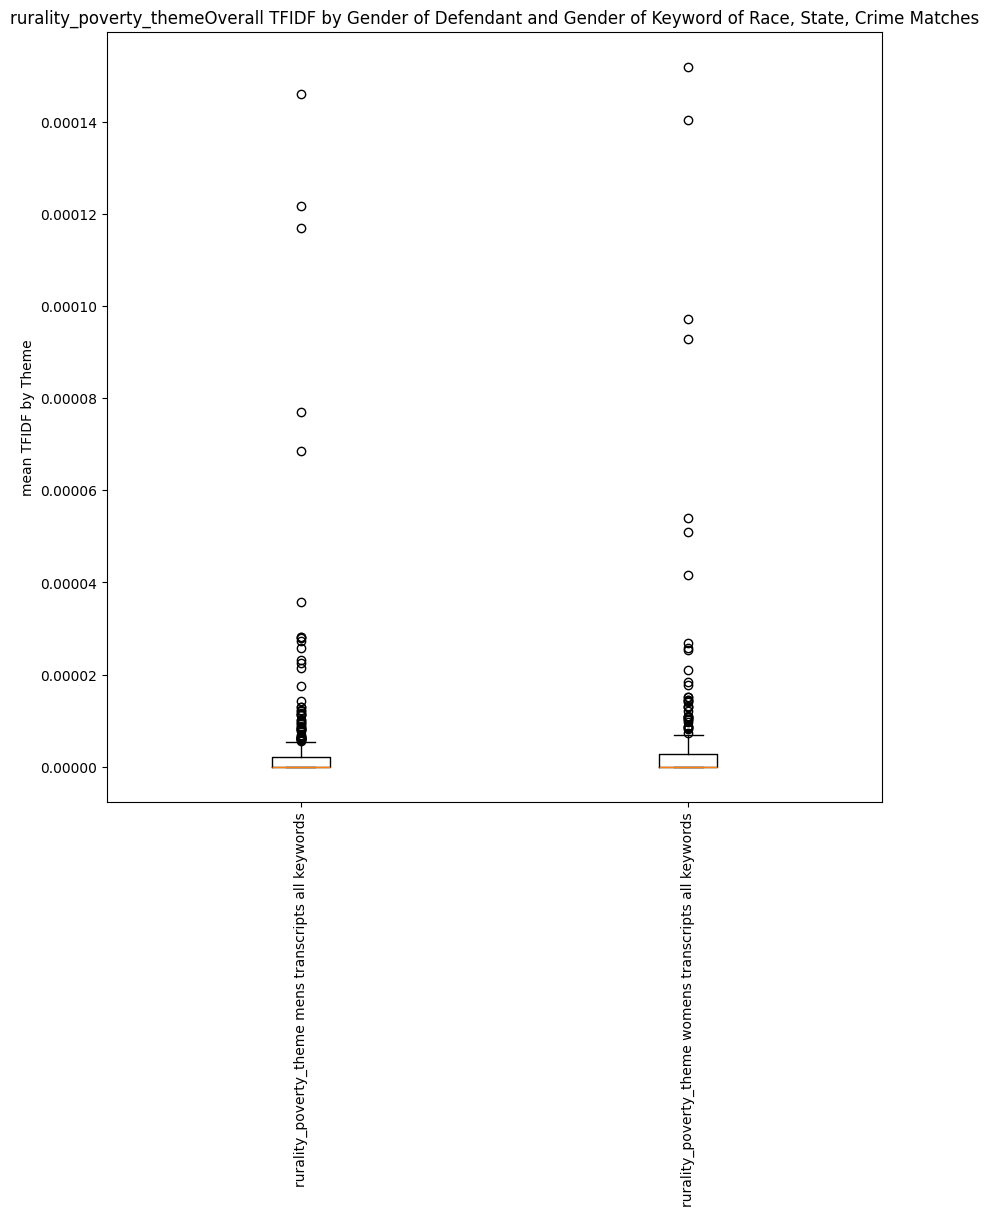

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


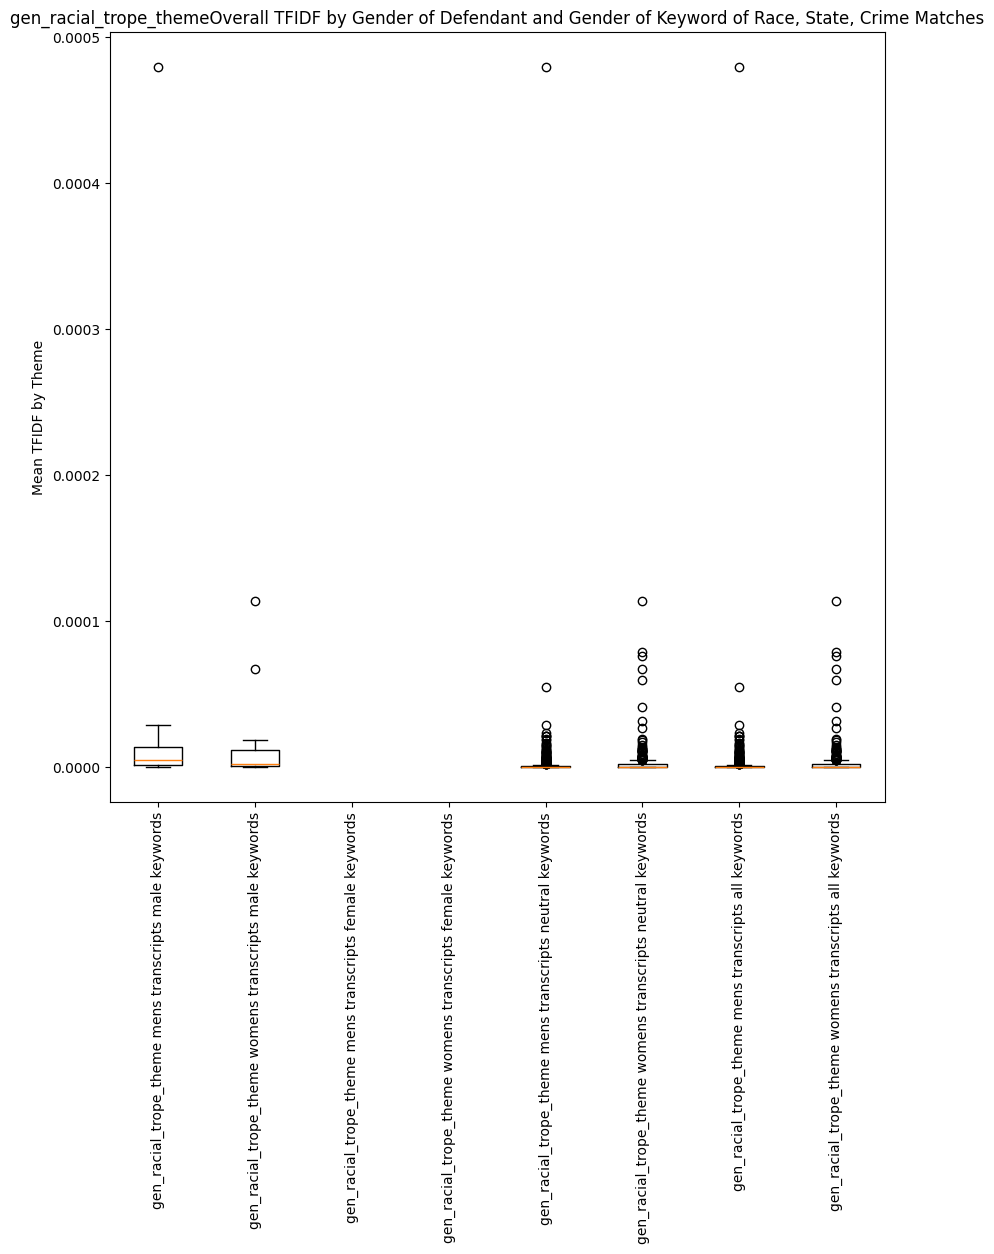

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


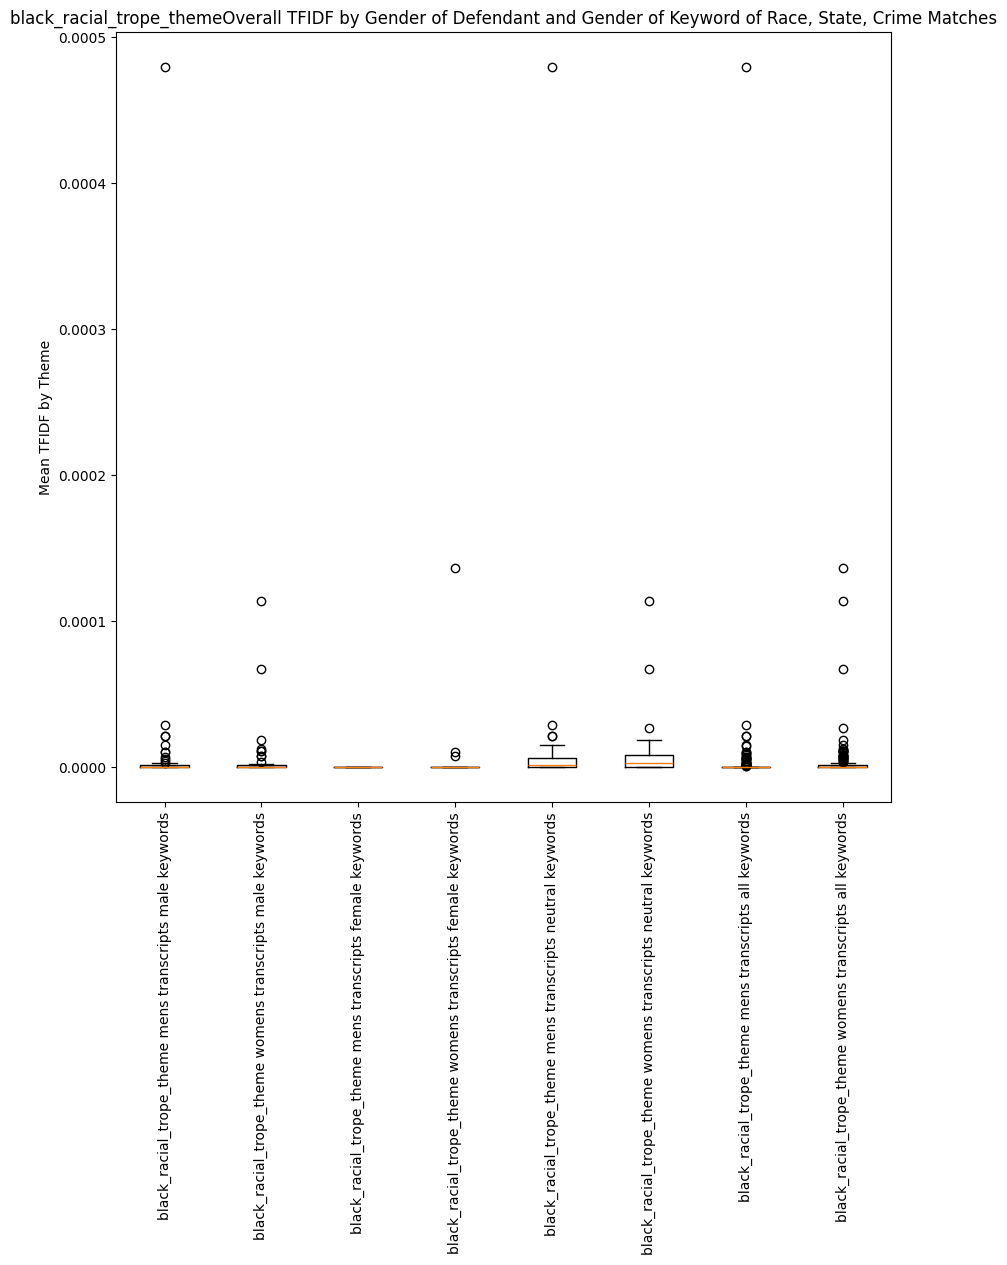

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


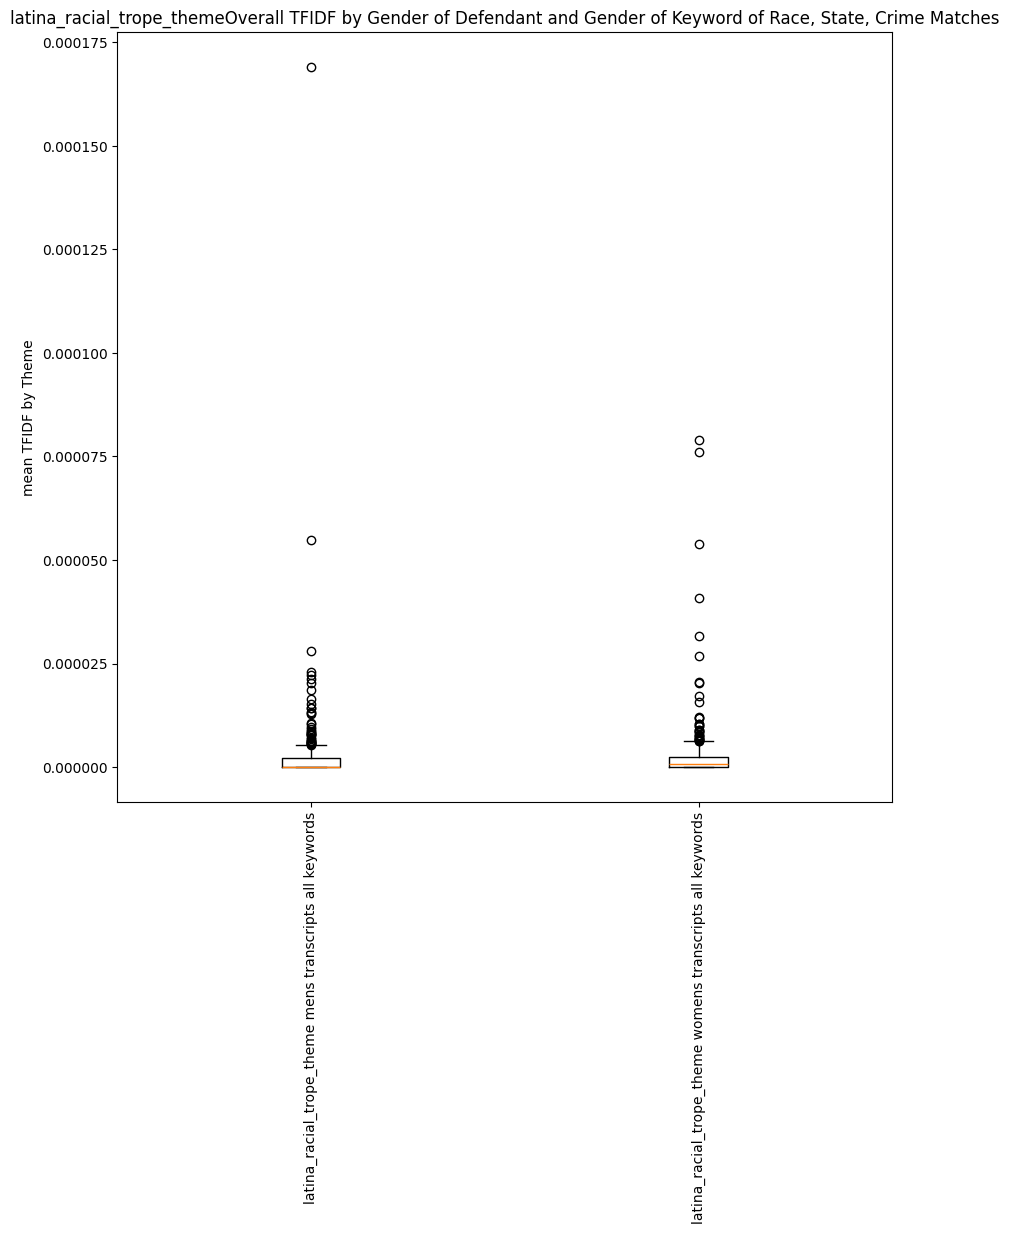

In [ ]:
#

generate_boxplots( raw_counts[raw_counts['race_state_crime_match']== True] , theme_types, 'overall_tfidf_11_25', 'Race, State, Crime Matches')


/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


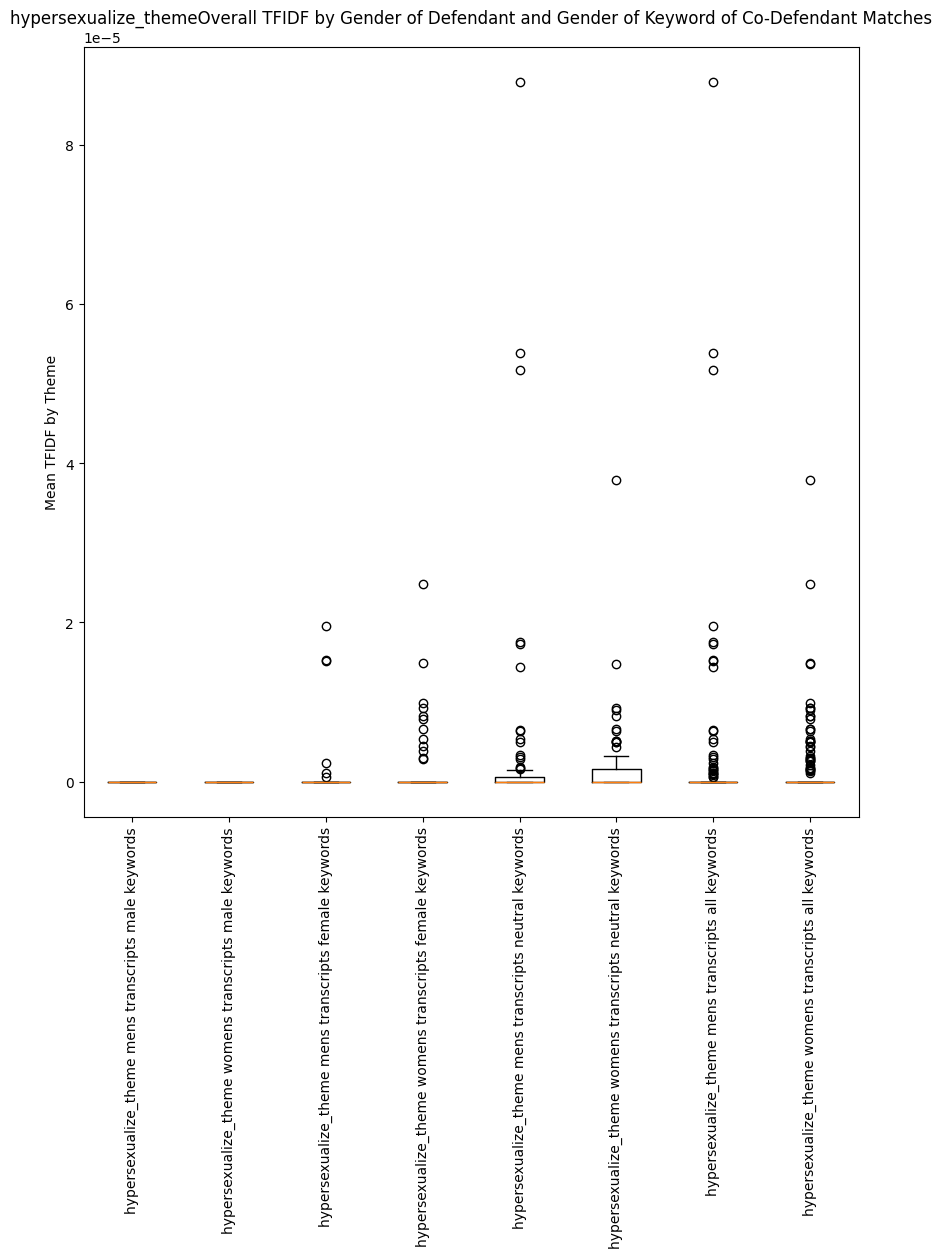

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


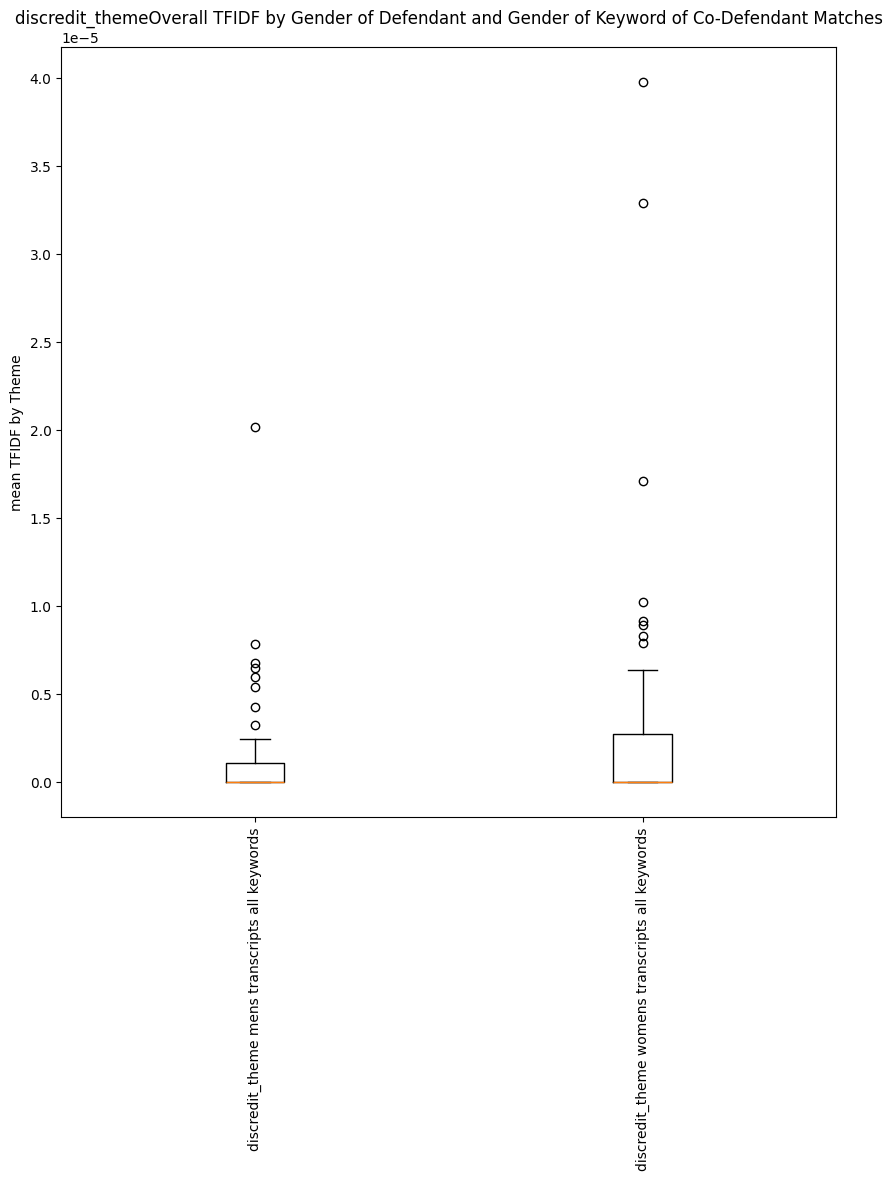

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


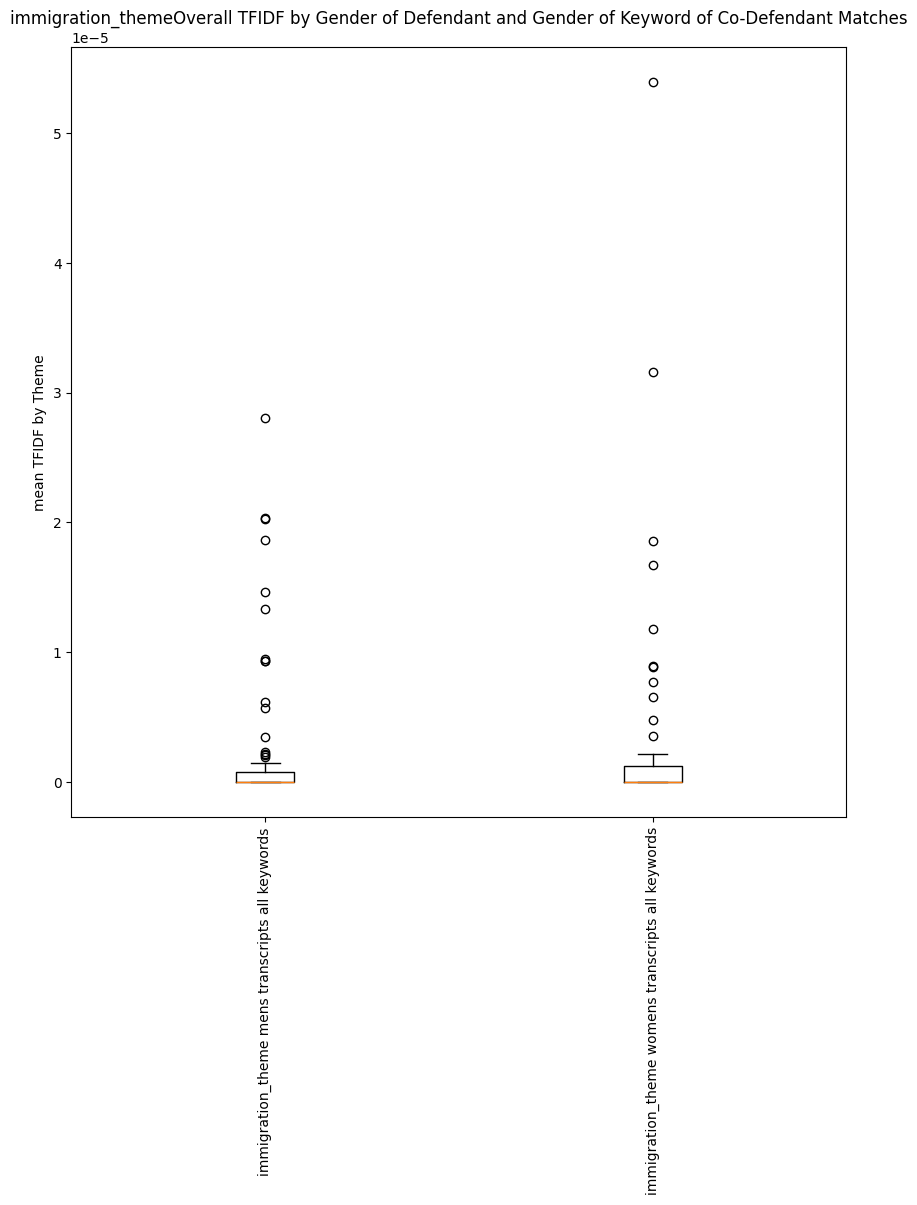

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


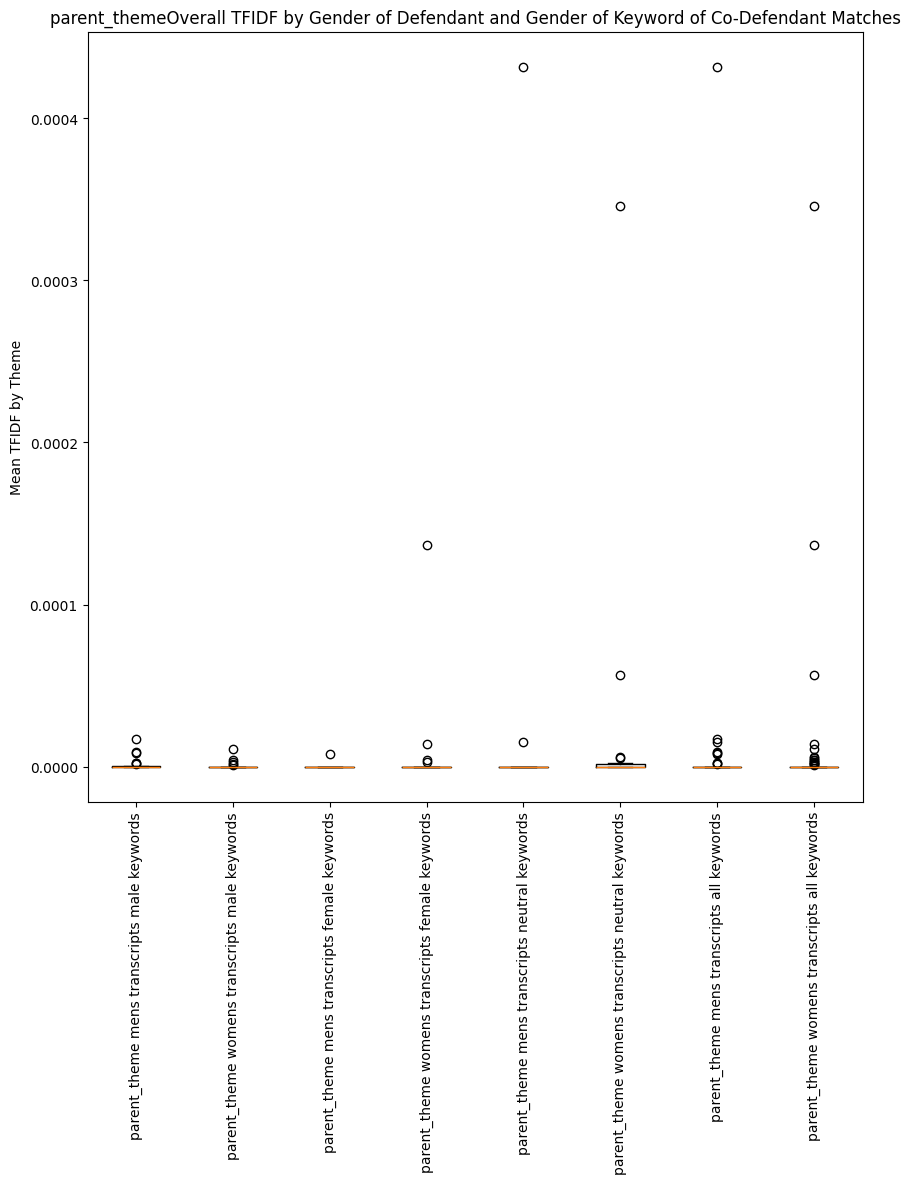

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


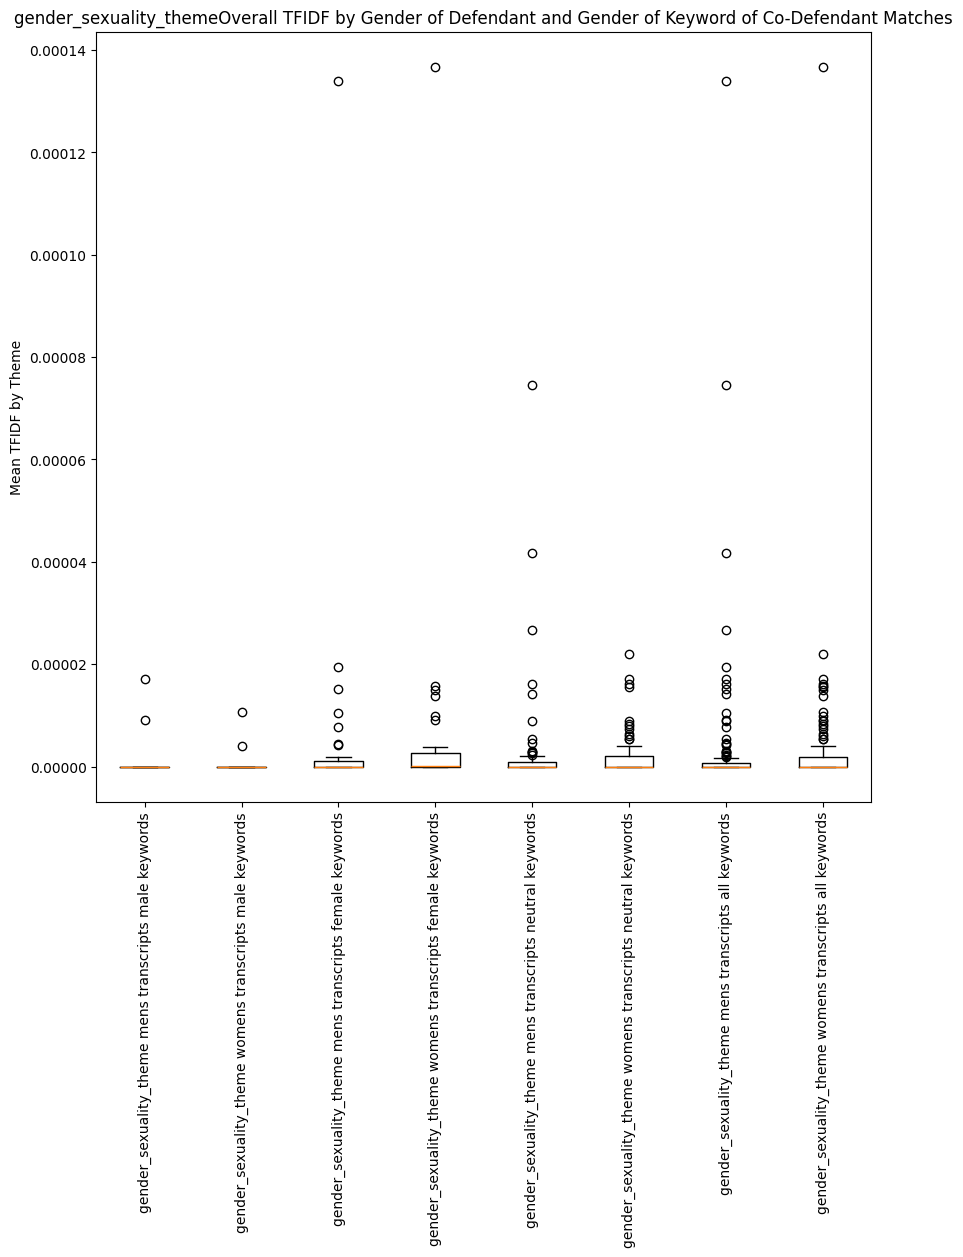

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


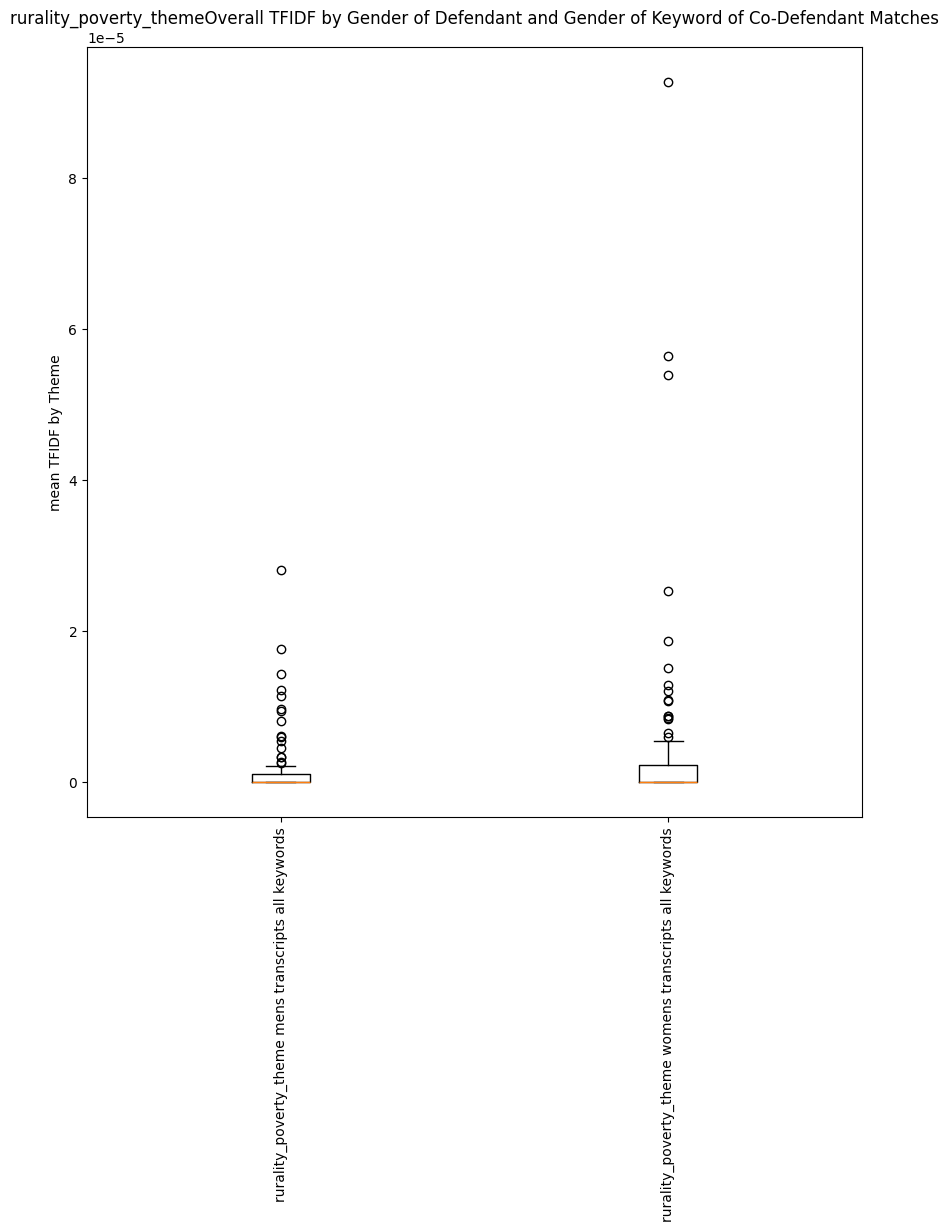

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


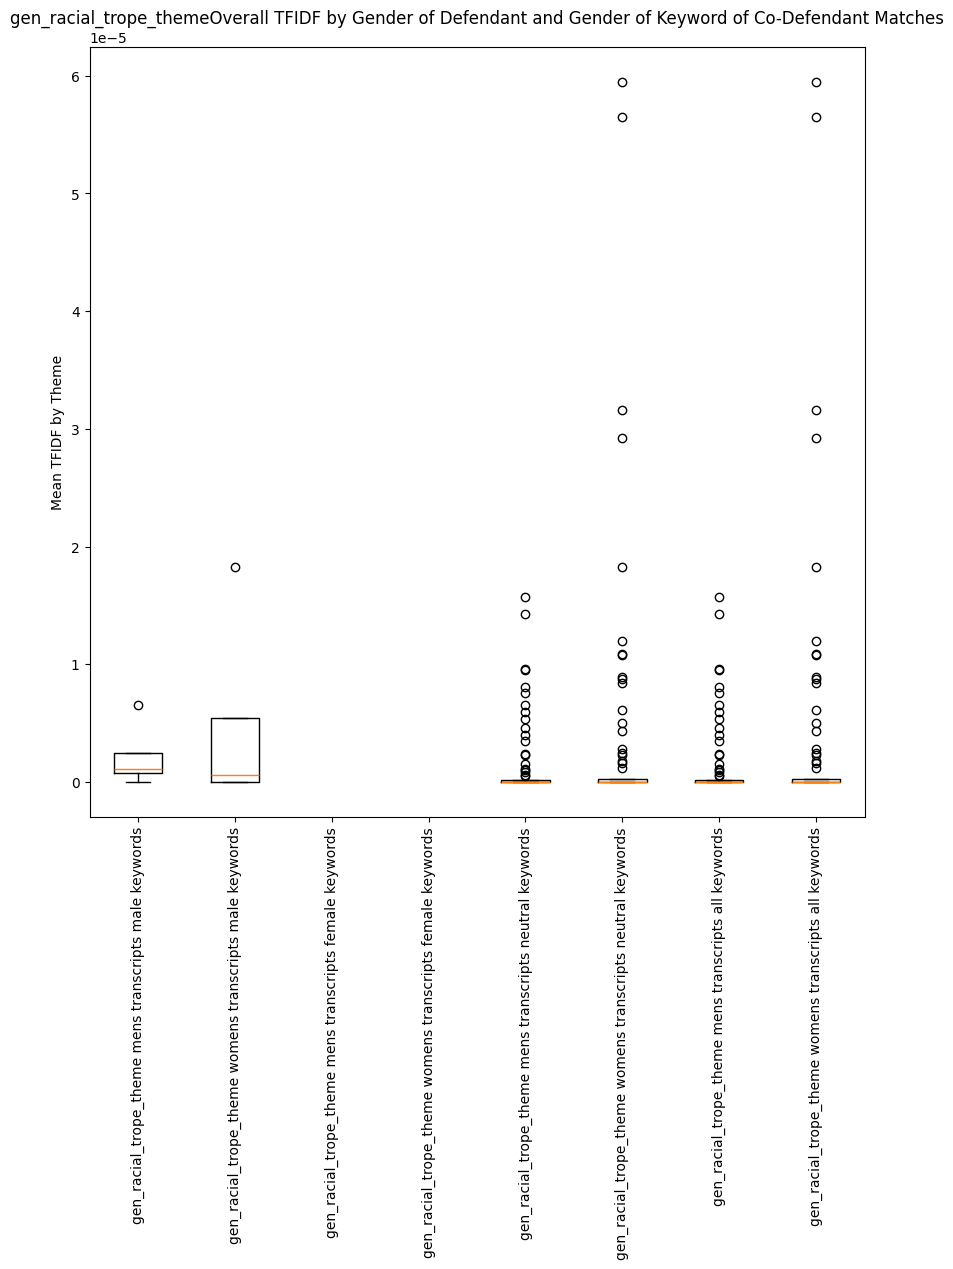

/tmp/ipython-input-1566462987.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


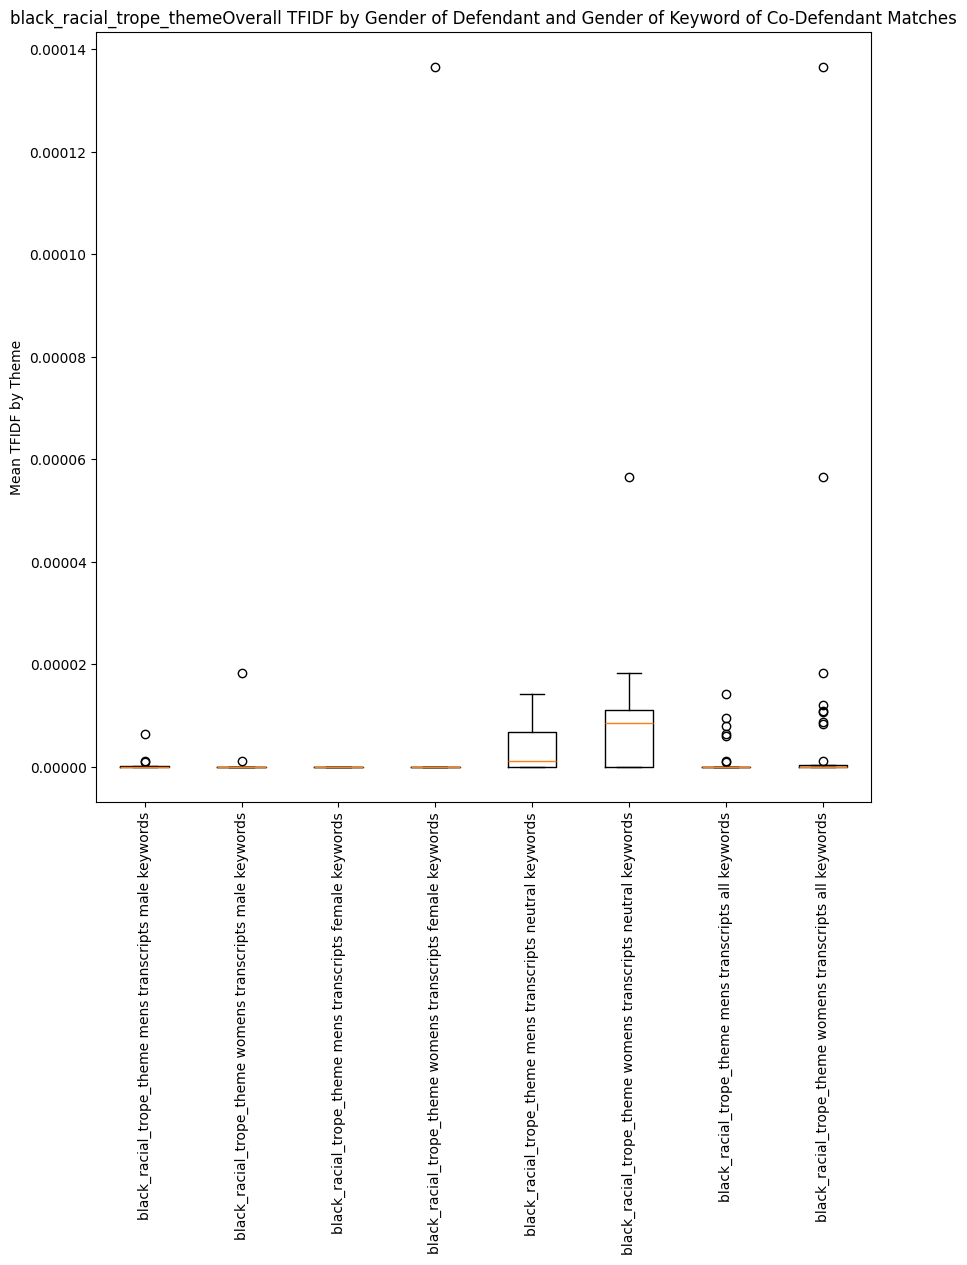

/tmp/ipython-input-1566462987.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


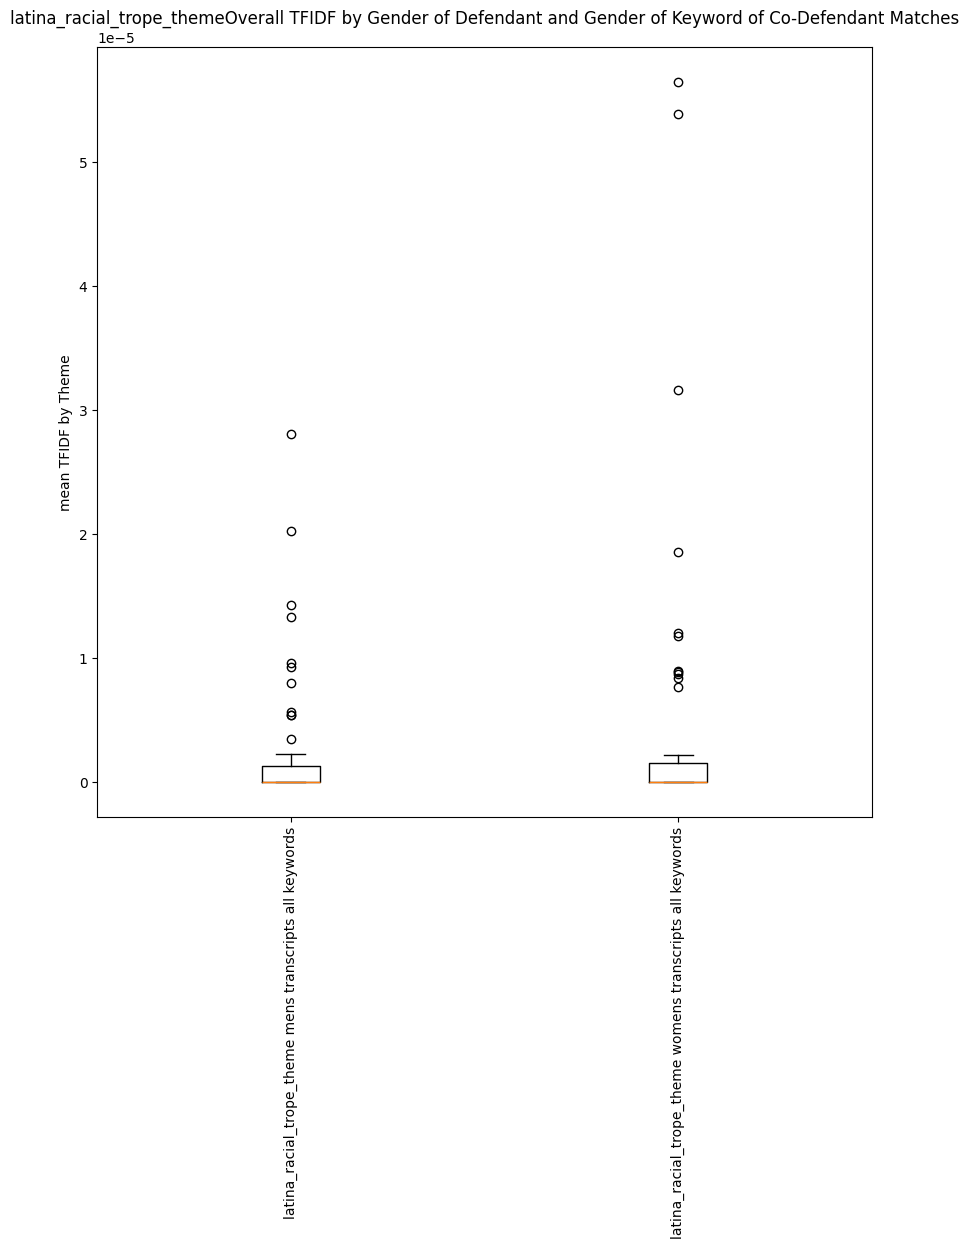

In [ ]:
#boxpolts of co-defendant matches
generate_boxplots( raw_counts[raw_counts['co_defendant_match']== True] , theme_types, 'overall_tfidf_11_25', 'Co-Defendant Matches')


In [ ]:
def generate_boxplots(df, theme_types, plotting_column, subset, plotting_colum_name = "Overall TF-IDF"):
  for col in theme_types:
    men = df[df['gender']== 'man']
    women = df[df['gender']== 'woman']

    #mean count of each theme by gender

    men_theme_m =  men[(men[col]==True) & men['gendered_keyword_male'] == True][plotting_column]
    men_theme_f = men[(men[col]==True) & men['gendered_keyword_female'] == True][plotting_column]
    men_theme_n = men[(men[col]==True) & men['gender_neutral_keyword'] == True][plotting_column]
    men_theme_all = men[(men[col]==True)][plotting_column]


    women_theme_m = women[(women[col]==True) & women['gendered_keyword_male'] == True][plotting_column]
    women_theme_f = women[(women[col]==True) & women['gendered_keyword_female'] == True][plotting_column]
    women_theme_n = women[(women[col]==True) & women['gender_neutral_keyword'] == True][plotting_column]
    women_theme_all = women[(women[col]==True)][plotting_column]


    plt.figure(figsize=(10, 10))

    if len(men_theme_m) > 0:

      plt.boxplot([men_theme_m, women_theme_m,
                  men_theme_f,  women_theme_f ,
                  men_theme_n, women_theme_n,
                  men_theme_all, women_theme_all], labels=[

                                                                      col + ' mens transcripts ' + 'male keywords',
                                                                      col + ' womens transcripts ' + 'male keywords',


                                                                      col + ' mens transcripts ' + 'female keywords',
                                                                      col + ' womens transcripts ' + 'female keywords',


                                                                      col + ' mens transcripts ' + 'neutral keywords',
                                                                      col + ' womens transcripts ' + 'neutral keywords',


                                                                      col + ' mens transcripts ' + 'all keywords',

                                                                      col + ' womens transcripts ' + 'all keywords']
      )




      plt.xticks(rotation=90)

      # Adding a title and labels
      plt.title(col + plotting_colum_name +  ' by Gender of Defendant and Gender of Keyword of ' + subset)
      plt.ylabel('Mean TFIDF by Theme')

      # Display the plot
      plt.show()

    else:

      plt.boxplot([


                  men_theme_all, women_theme_all], labels=[
                                                                                                                col + ' mens transcripts ' + 'all keywords',

                                                                                                                col + ' womens transcripts ' + 'all keywords']
      )




      plt.xticks(rotation=90)

      # Adding a title and labels
      plt.title(col + 'Overall TFIDF by Gender of Defendant and Gender of Keyword of ' + subset)
      plt.ylabel('mean TFIDF by Theme')

      # Display the plot
      plt.show()

In [ ]:
copy = raw_counts[raw_counts['race_state_crime_match']== True]

/tmp/ipython-input-3496885002.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


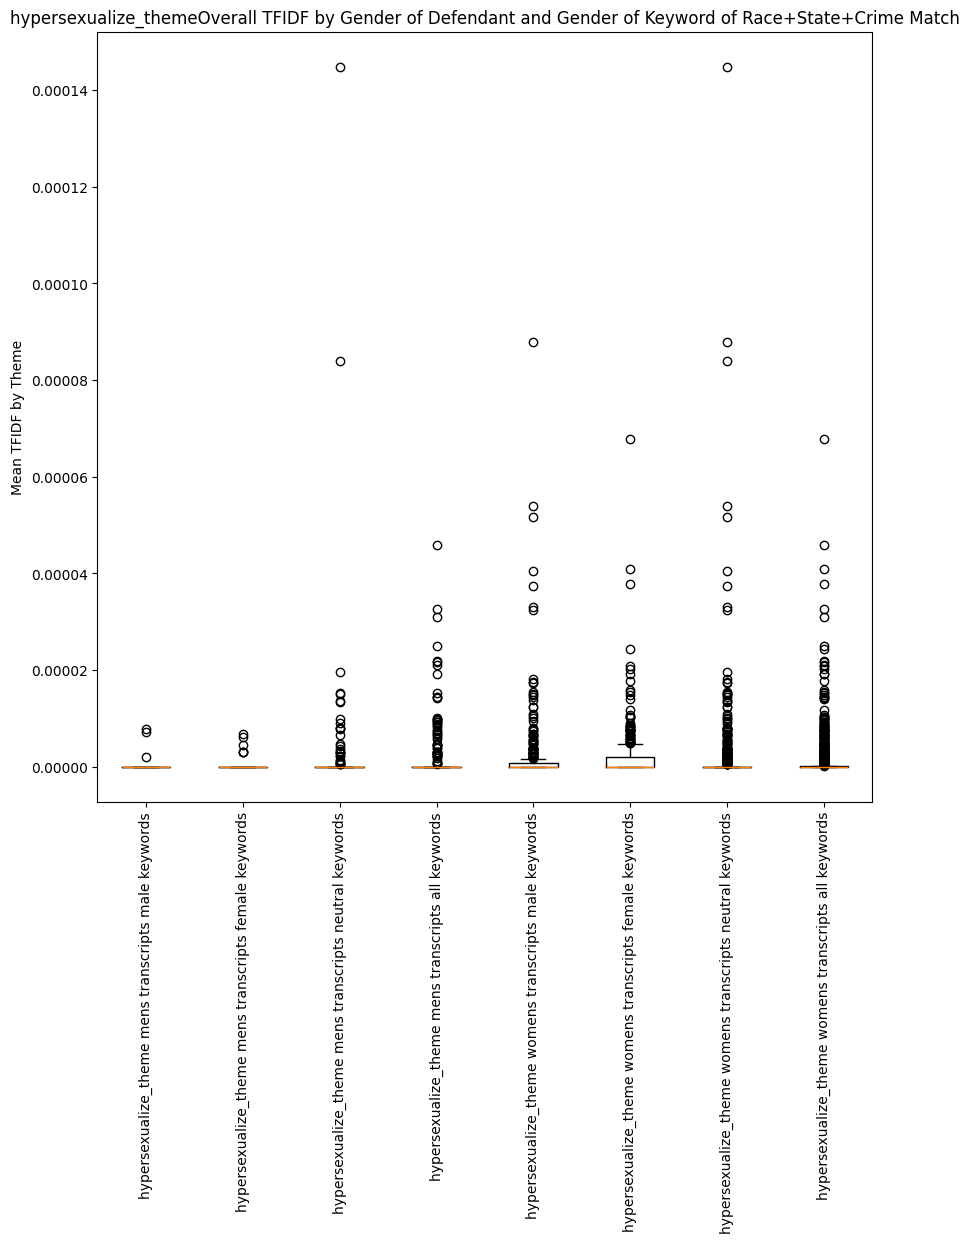

/tmp/ipython-input-3496885002.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


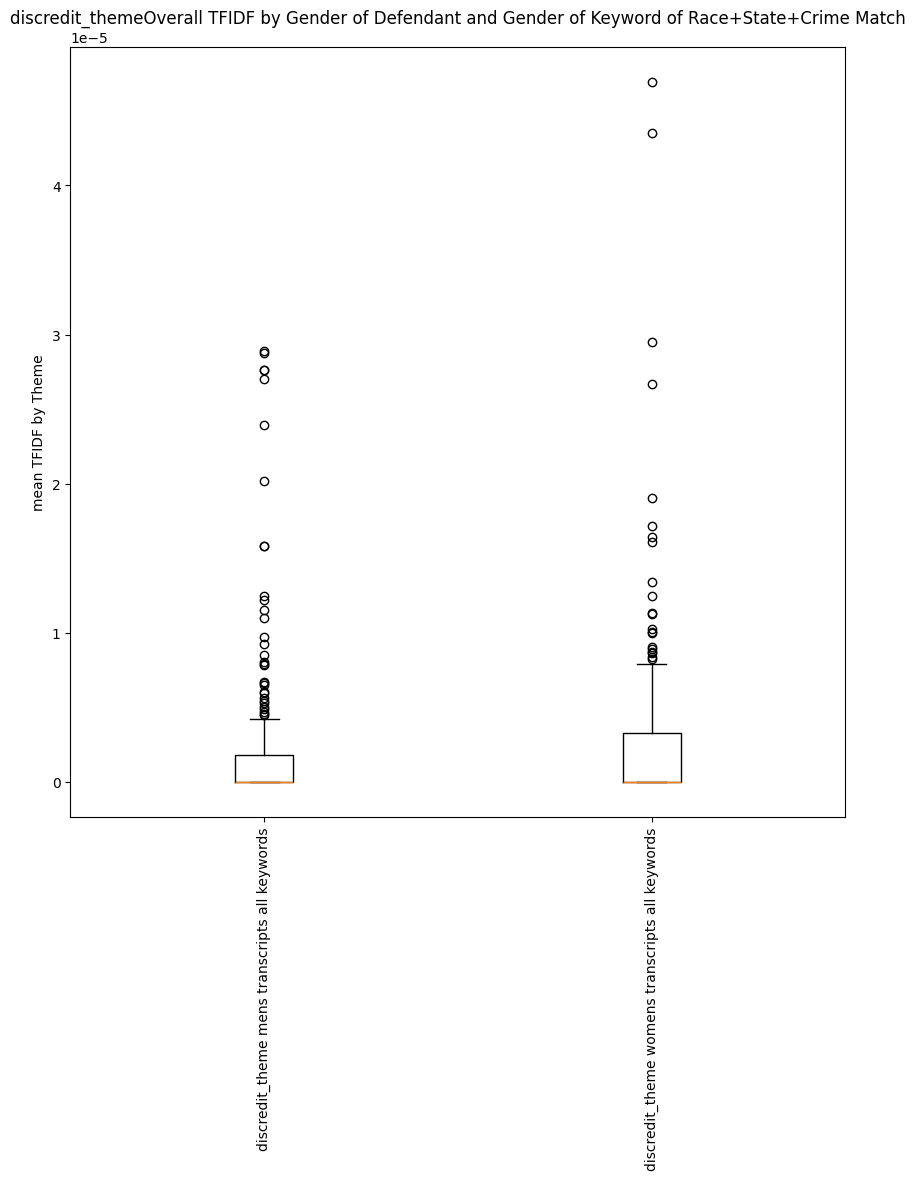

/tmp/ipython-input-3496885002.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


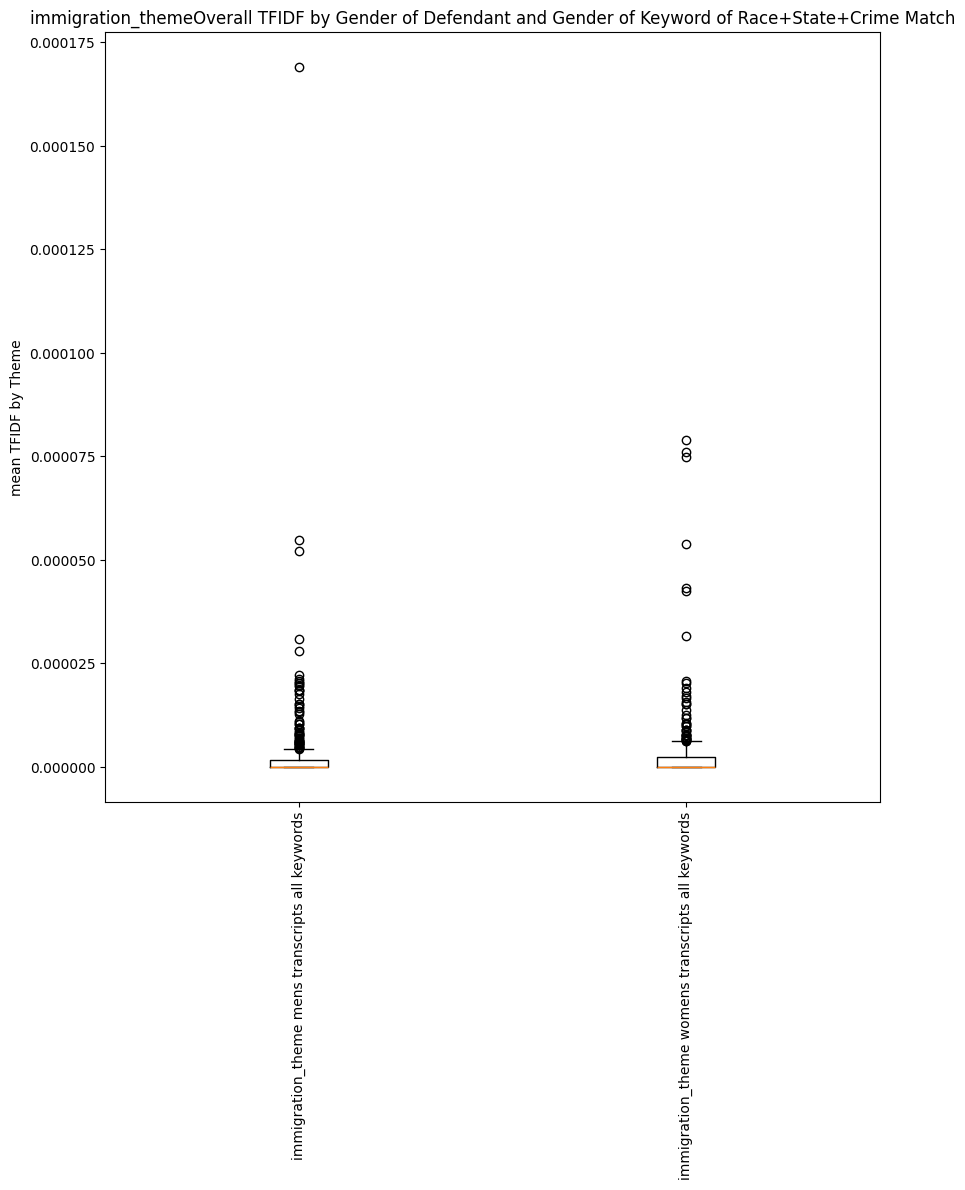

/tmp/ipython-input-3496885002.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


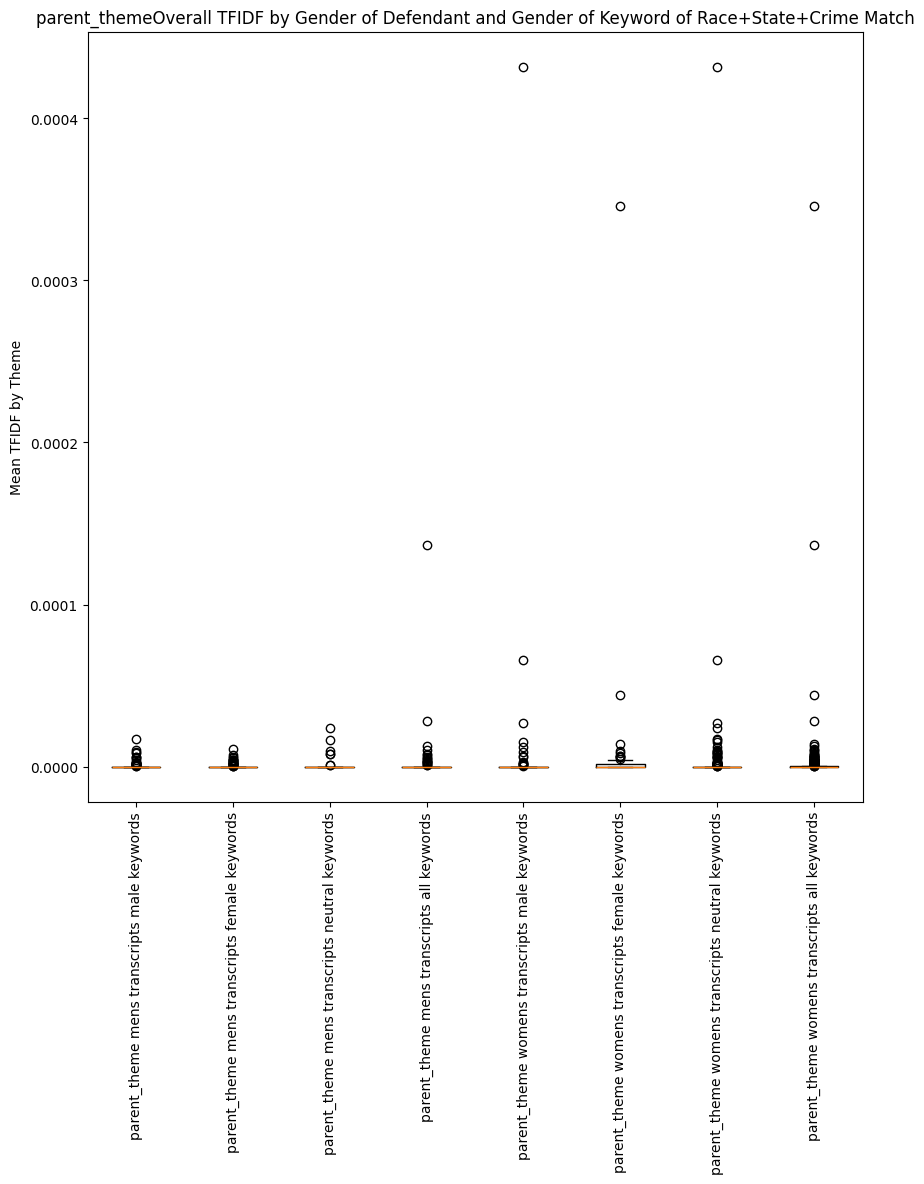

/tmp/ipython-input-3496885002.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


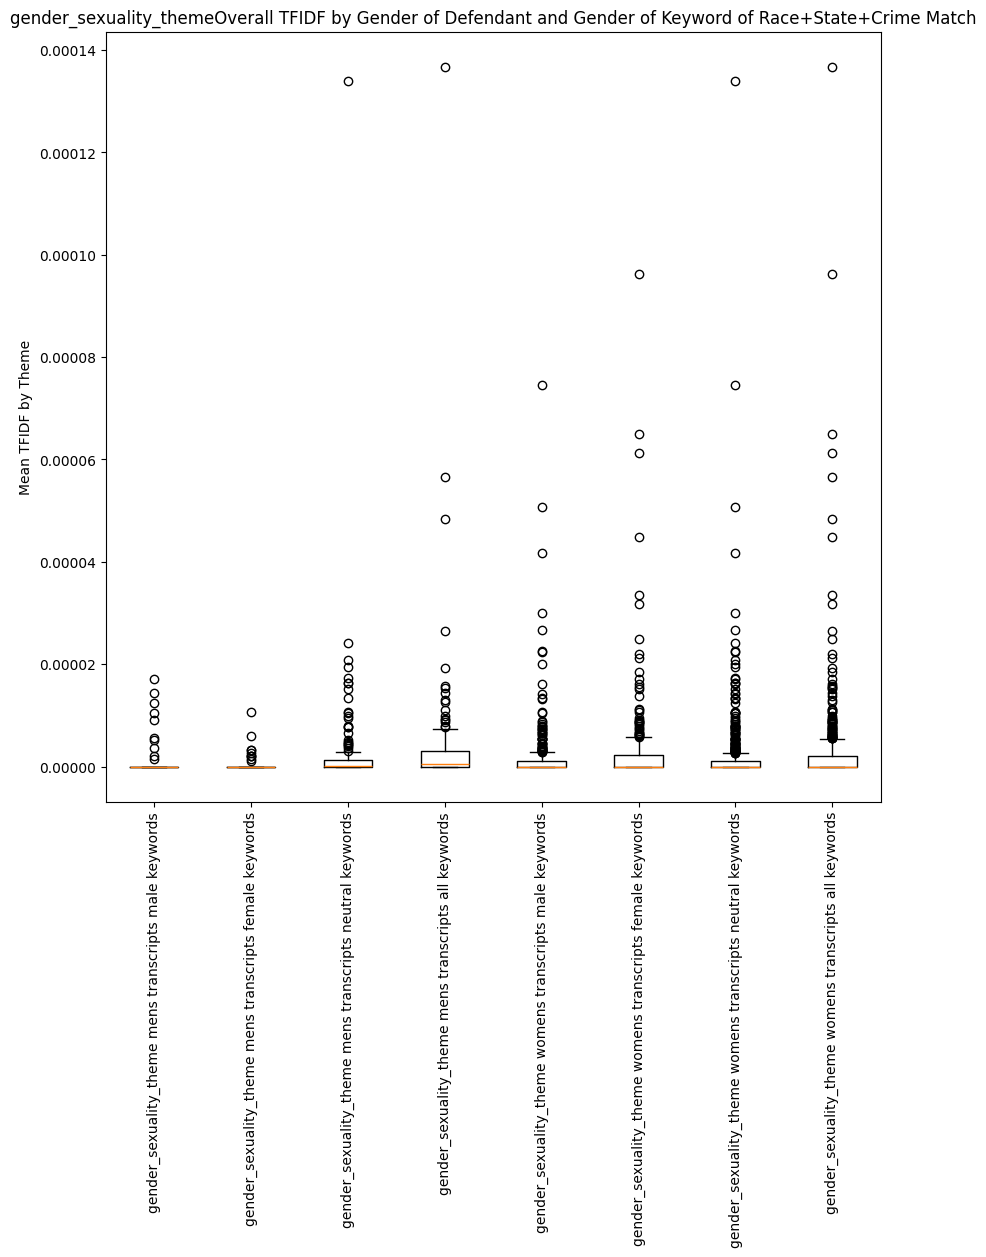

/tmp/ipython-input-3496885002.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


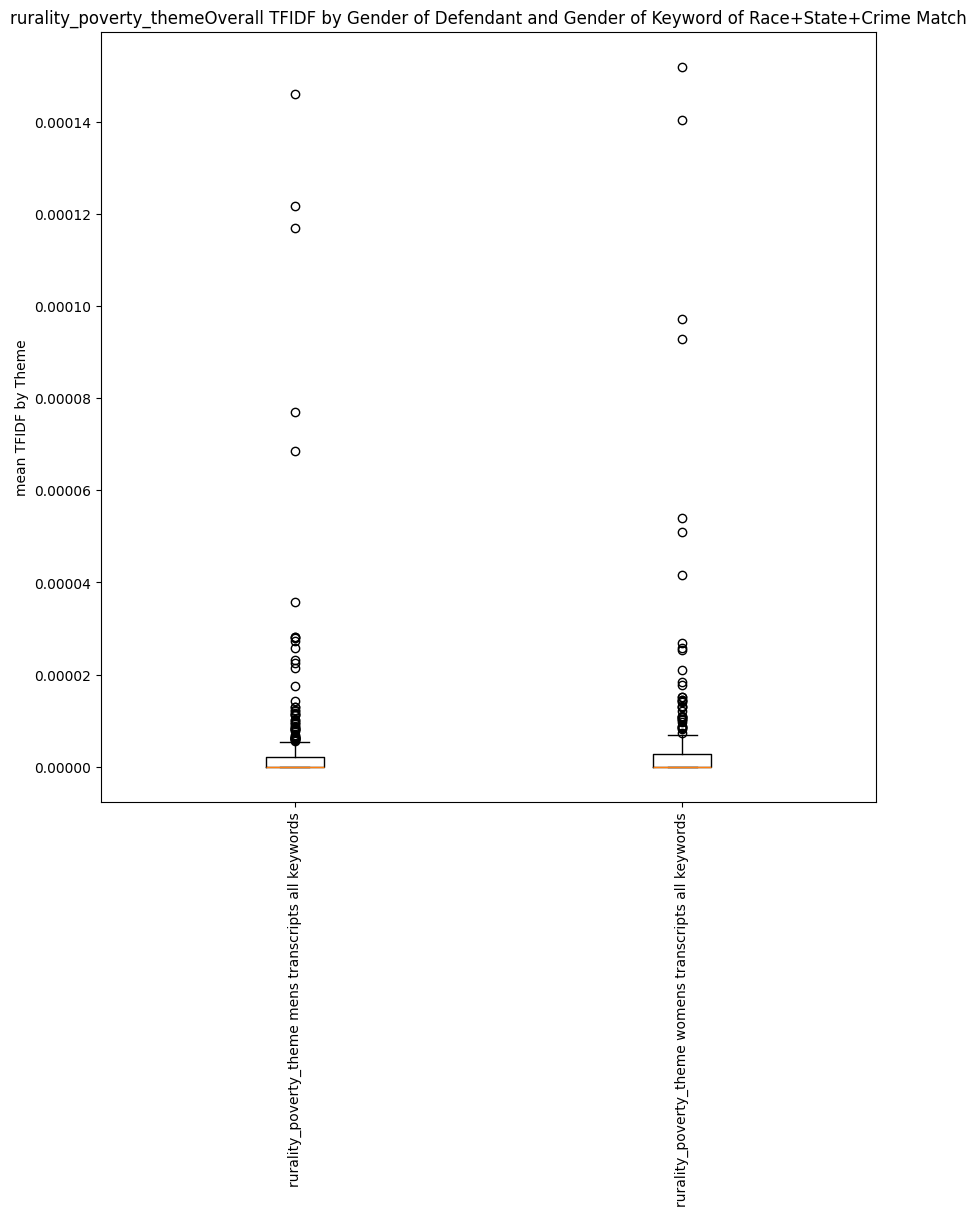

/tmp/ipython-input-3496885002.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


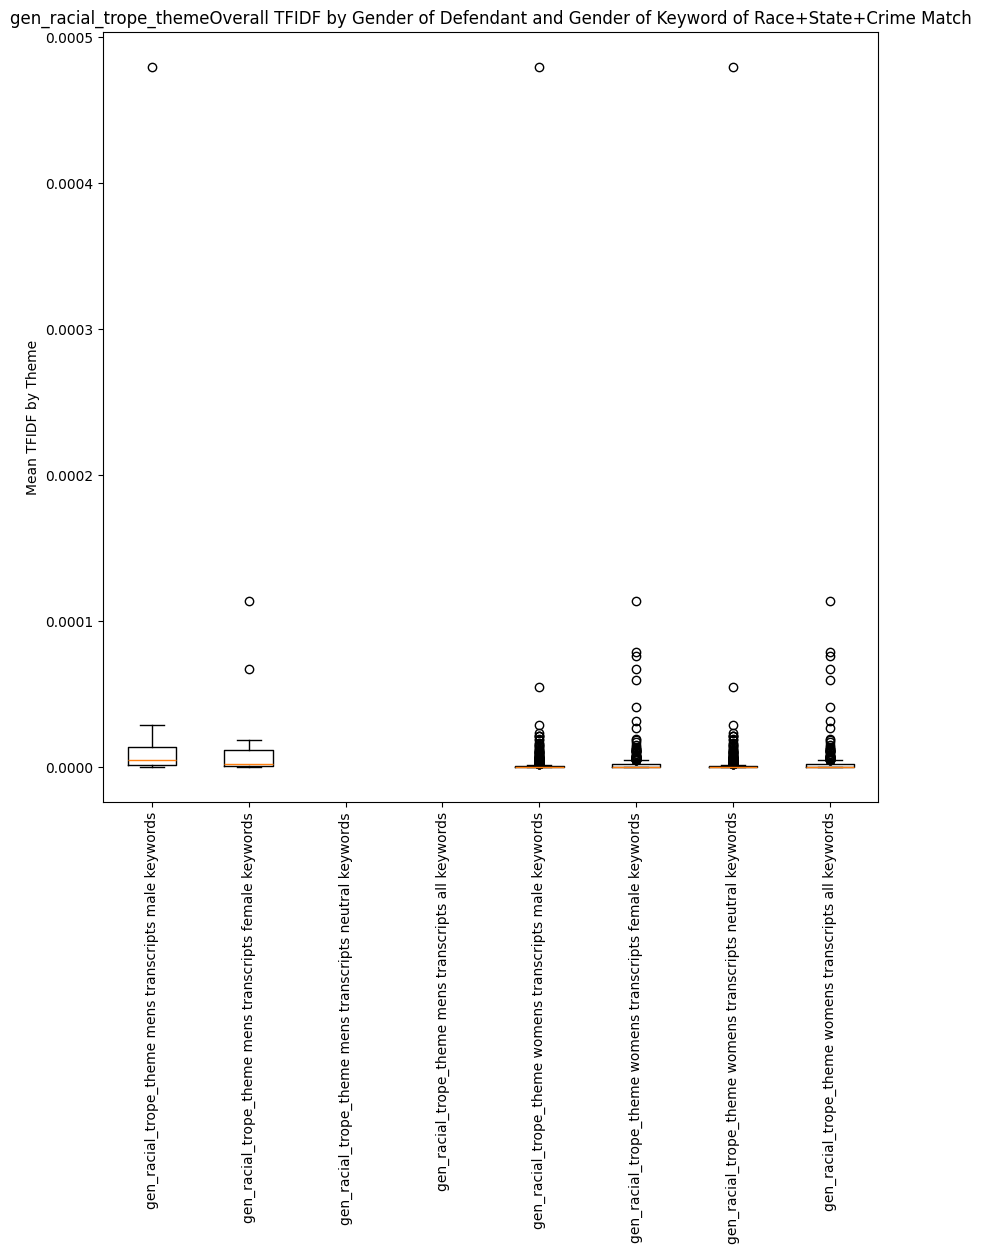

/tmp/ipython-input-3496885002.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_theme_m, women_theme_m,


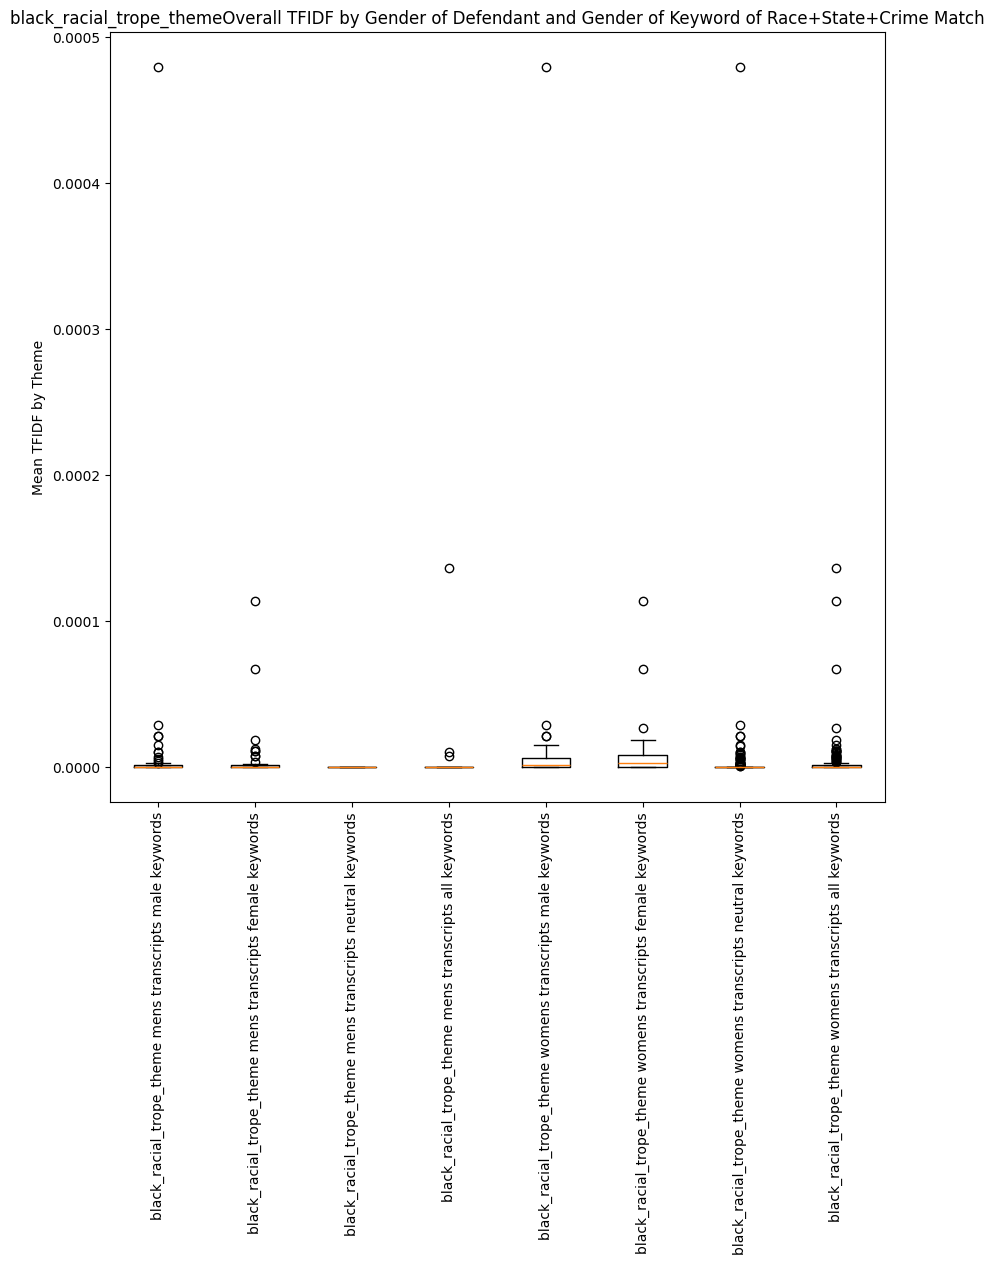

/tmp/ipython-input-3496885002.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


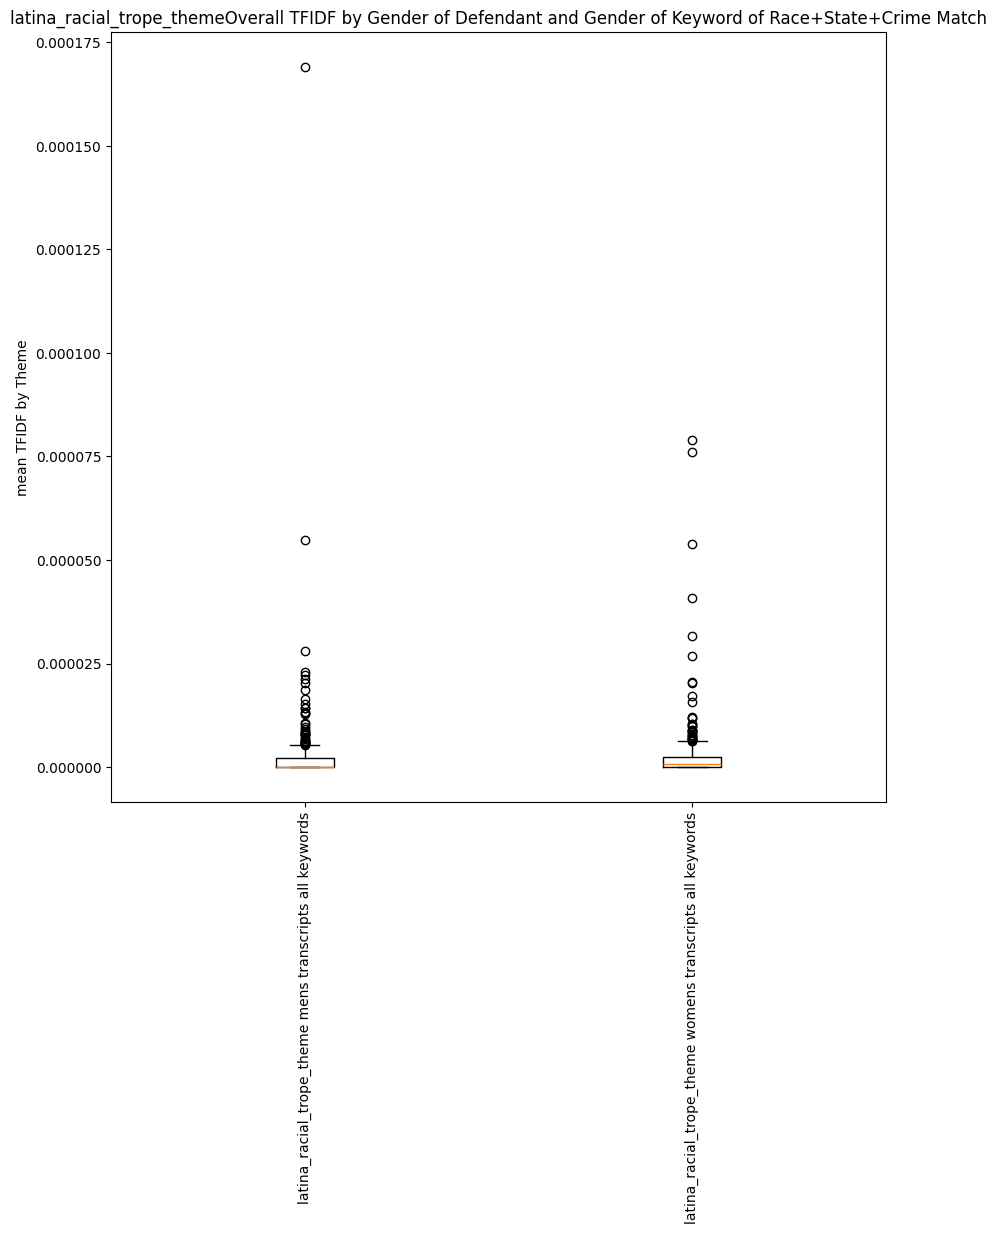

In [ ]:
for col in theme_types:
  men = copy[copy['gender']== 'man']
  women = copy[copy['gender']== 'woman']

  #mean count of each theme by gender

  men_theme_m =  men[(men[col]==True) & men['gendered_keyword_male'] == True]['overall_tfidf_11_24']
  men_theme_f = men[(men[col]==True) & men['gendered_keyword_female'] == True]['overall_tfidf_11_24']
  men_theme_n = men[(men[col]==True) & men['gender_neutral_keyword'] == True]['overall_tfidf_11_24']
  men_theme_all = men[(men[col]==True)]['overall_tfidf_11_24']


  women_theme_m = women[(women[col]==True) & women['gendered_keyword_male'] == True]['overall_tfidf_11_24']
  women_theme_f = women[(women[col]==True) & women['gendered_keyword_female'] == True]['overall_tfidf_11_24']
  women_theme_n = women[(women[col]==True) & women['gender_neutral_keyword'] == True]['overall_tfidf_11_24']
  women_theme_all = women[(women[col]==True)]['overall_tfidf_11_24']


  plt.figure(figsize=(10, 10))

  if len(men_theme_m) > 0:

    plt.boxplot([men_theme_m, women_theme_m,

                 men_theme_f,
                 women_theme_m,
                  women_theme_f ,
                men_theme_n, women_theme_n,
                men_theme_all, women_theme_all], labels=[
                                                                                                               col + ' mens transcripts ' + 'male keywords',
                                                                                                               col + ' womens transcripts ' + 'male keywords',
                                                                                                              col + ' mens transcripts ' + 'female keywords',
                                                                                                              col + ' mens transcripts ' + 'neutral keywords',
                                                                                                              col + ' mens transcripts ' + 'all keywords',

                                                                                                              col + ' womens transcripts ' + 'female keywords',
                                                                                                              col + ' womens transcripts ' + 'neutral keywords',
                                                                                                              col + ' womens transcripts ' + 'all keywords']
    )




    plt.xticks(rotation=90)

    # Adding a title and labels
    plt.title(col + 'Overall TFIDF by Gender of Defendant and Gender of Keyword of Race+State+Crime Match')
    plt.ylabel('Mean TFIDF by Theme')

    # Display the plot
    plt.show()

  else:

    plt.boxplot([


                men_theme_all, women_theme_all], labels=[
                                                                                                              col + ' mens transcripts ' + 'all keywords',

                                                                                                              col + ' womens transcripts ' + 'all keywords']
    )




    plt.xticks(rotation=90)

    # Adding a title and labels
    plt.title(col + 'Overall TFIDF by Gender of Defendant and Gender of Keyword of Race+State+Crime Match')
    plt.ylabel('mean TFIDF by Theme')

    # Display the plot
    plt.show()

#Heatmaps of counts by Theme

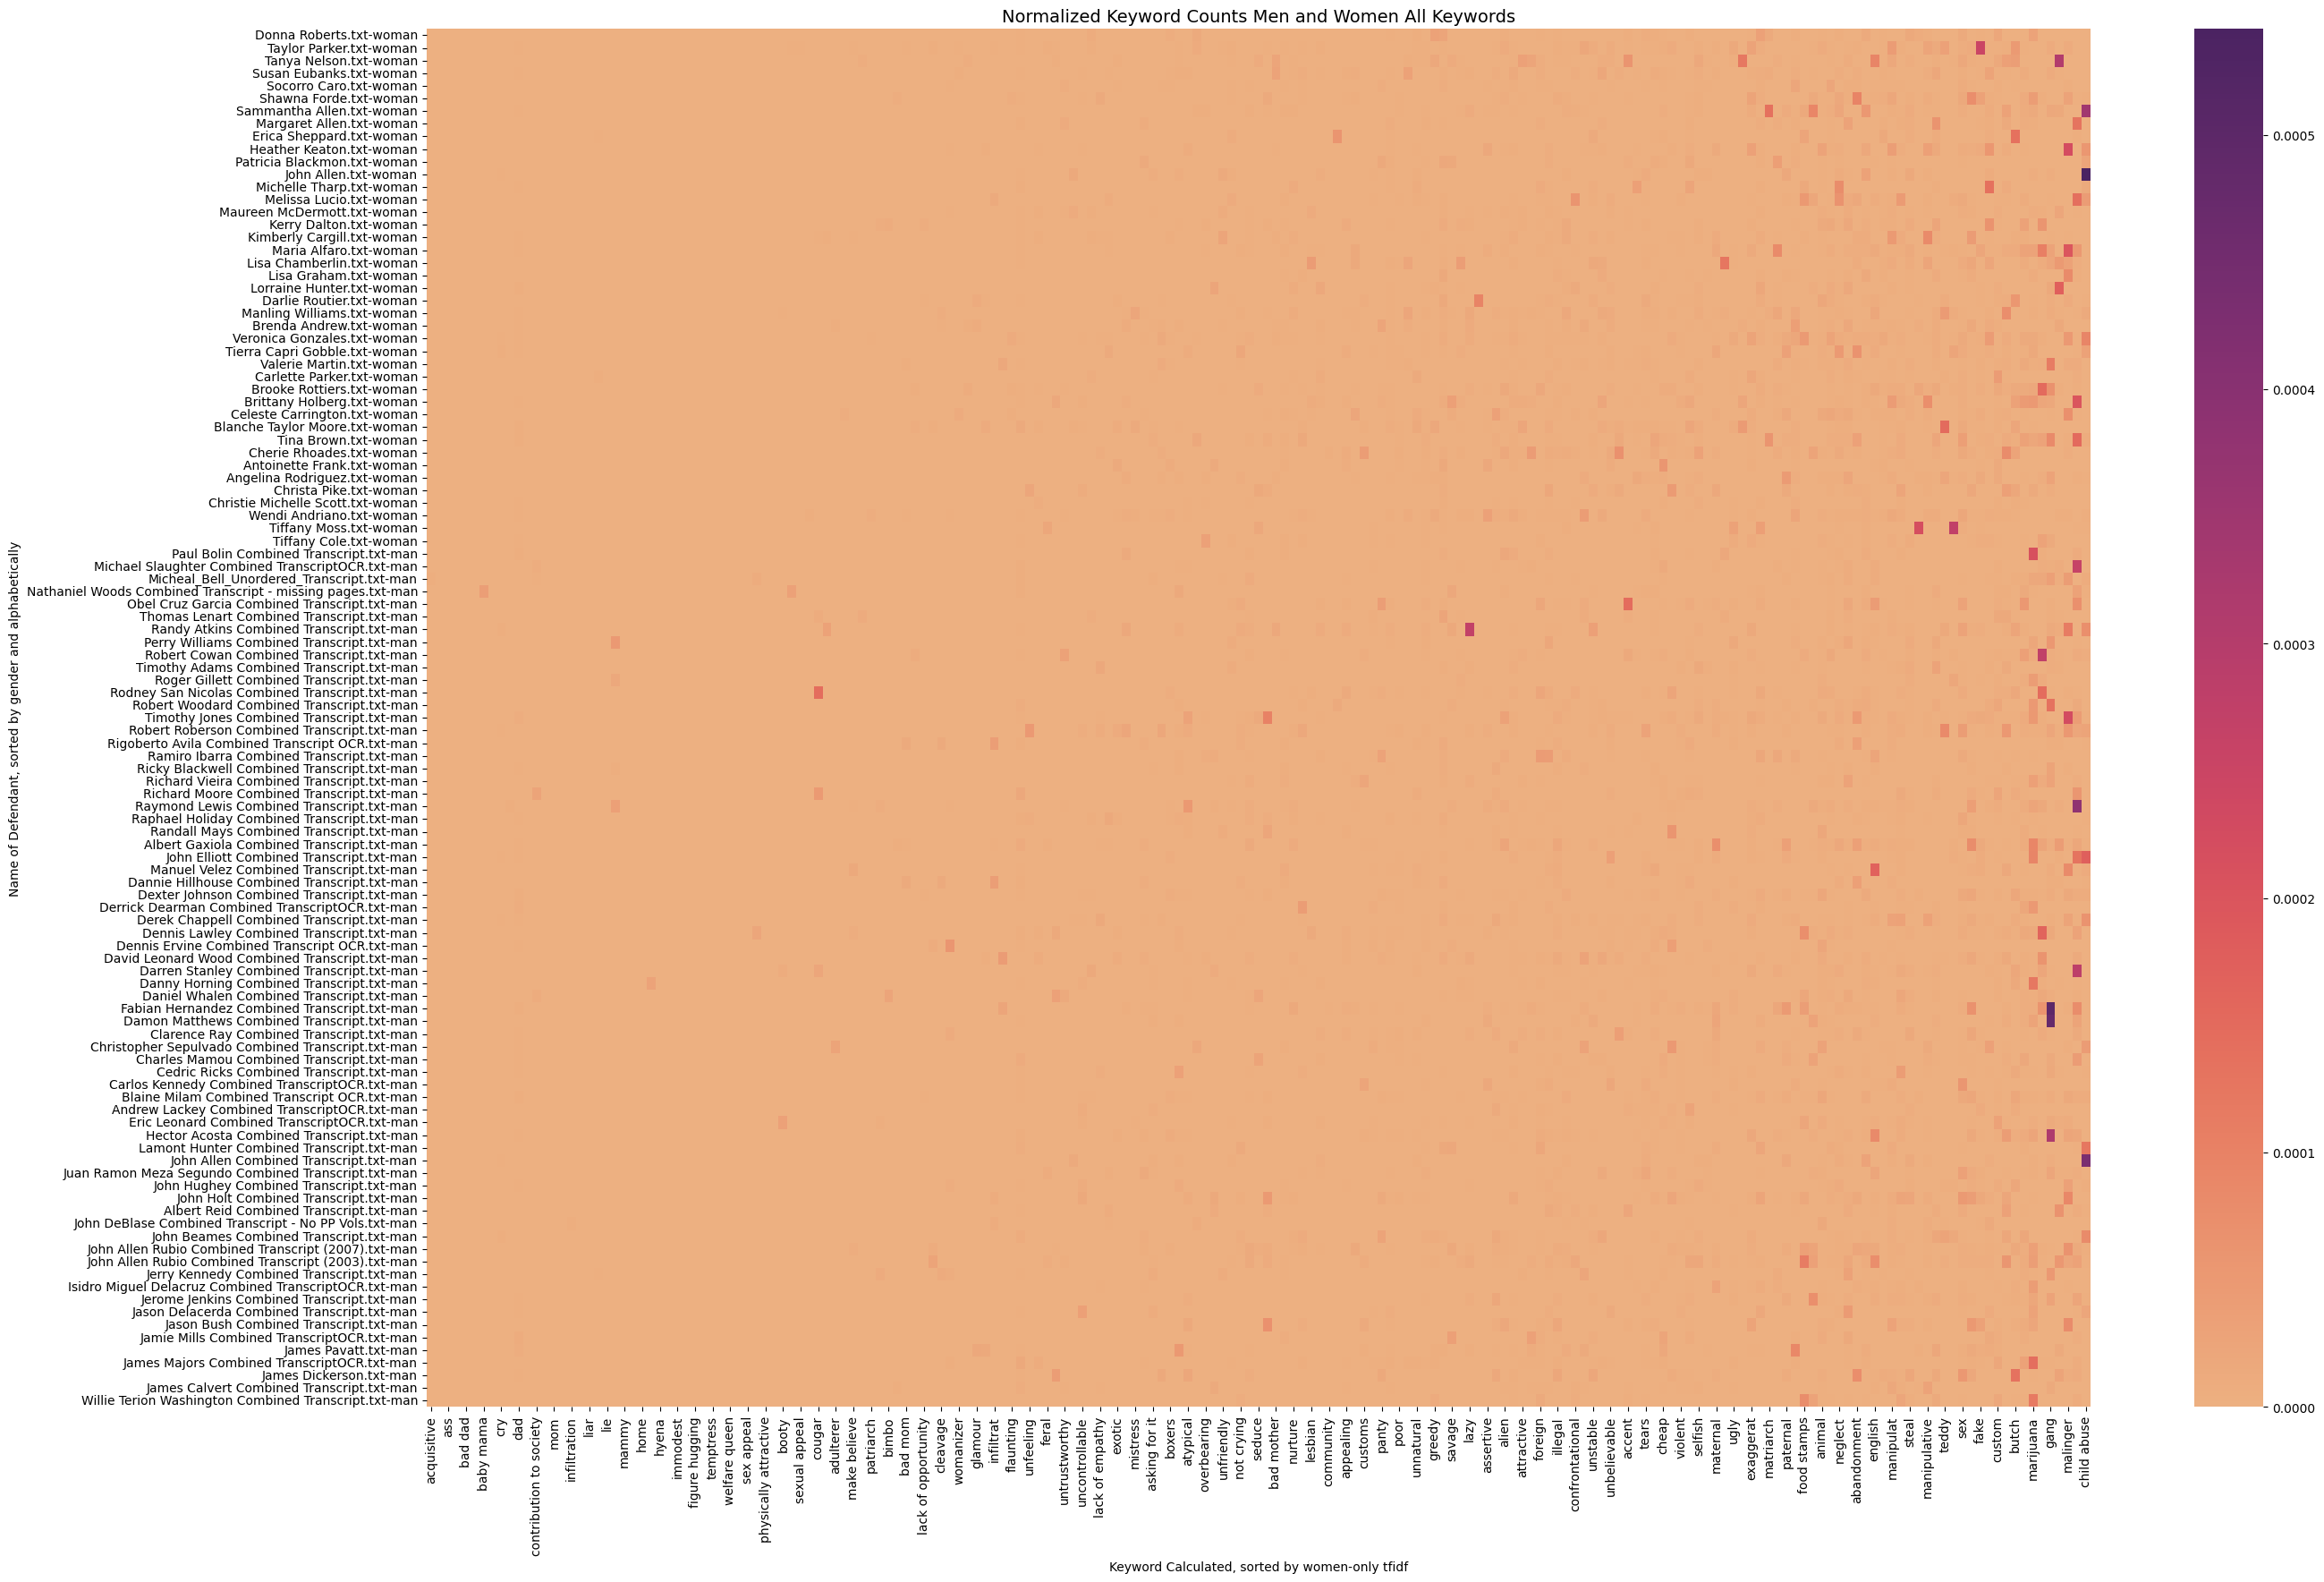

In [ ]:
heatmap_data = raw_counts.pivot_table(
        index=['document_name','gender'],
        columns='keyword',
        values='overall_tfidf_11_24')


sorted_pivot = heatmap_data.sort_values(by='gender', ascending=False)


#sorted_y_axis = heatmap_data.mean(axis=1).sort_values(ascending=False)



#sorted_pivot_df = sorted_pivot.reindex(index=sorted_y_axis)


fig, axes = plt.subplots(1, 1, figsize=(30, 20), sharex=True, sharey=True)


sort_order_x = raw_counts.groupby('keyword')['women_only_tfidf_11_24'].mean().sort_values().index


df_pivot_sorted = sorted_pivot.reindex(columns=sort_order_x)


sns.heatmap(df_pivot_sorted, ax=axes, cmap="flare",  cbar=True) #




# sns.heatmap(sorted_pivot, ax=axes, cmap="Spectral",  cbar=True ) #,xticklabels=True, yticklabels=True) #, vmin= v_min, vmax= v_max)


# yticklabels1 = sorted(normalized_keyword_analysis_women_df[normalized_keyword_analysis_women_df['Race/Ethnicity'] == 'White'].Name.unique())

axes.set_title(f'Normalized Keyword Counts Men and Women All Keywords', fontsize=14)
axes.set_ylabel('Name of Defendant, sorted by gender and alphabetically')
axes.set_xlabel('Keyword Calculated, sorted by women-only tfidf')

#axes.set_yticklabels(yticklabels1)

plt.show()

In [ ]:
theme_types

['hypersexualize_theme',
 'discredit_theme',
 'immigration_theme',
 'parent_theme',
 'gender_sexuality_theme',
 'rurality_poverty_theme',
 'gen_racial_trope_theme',
 'black_racial_trope_theme',
 'latina_racial_trope_theme']

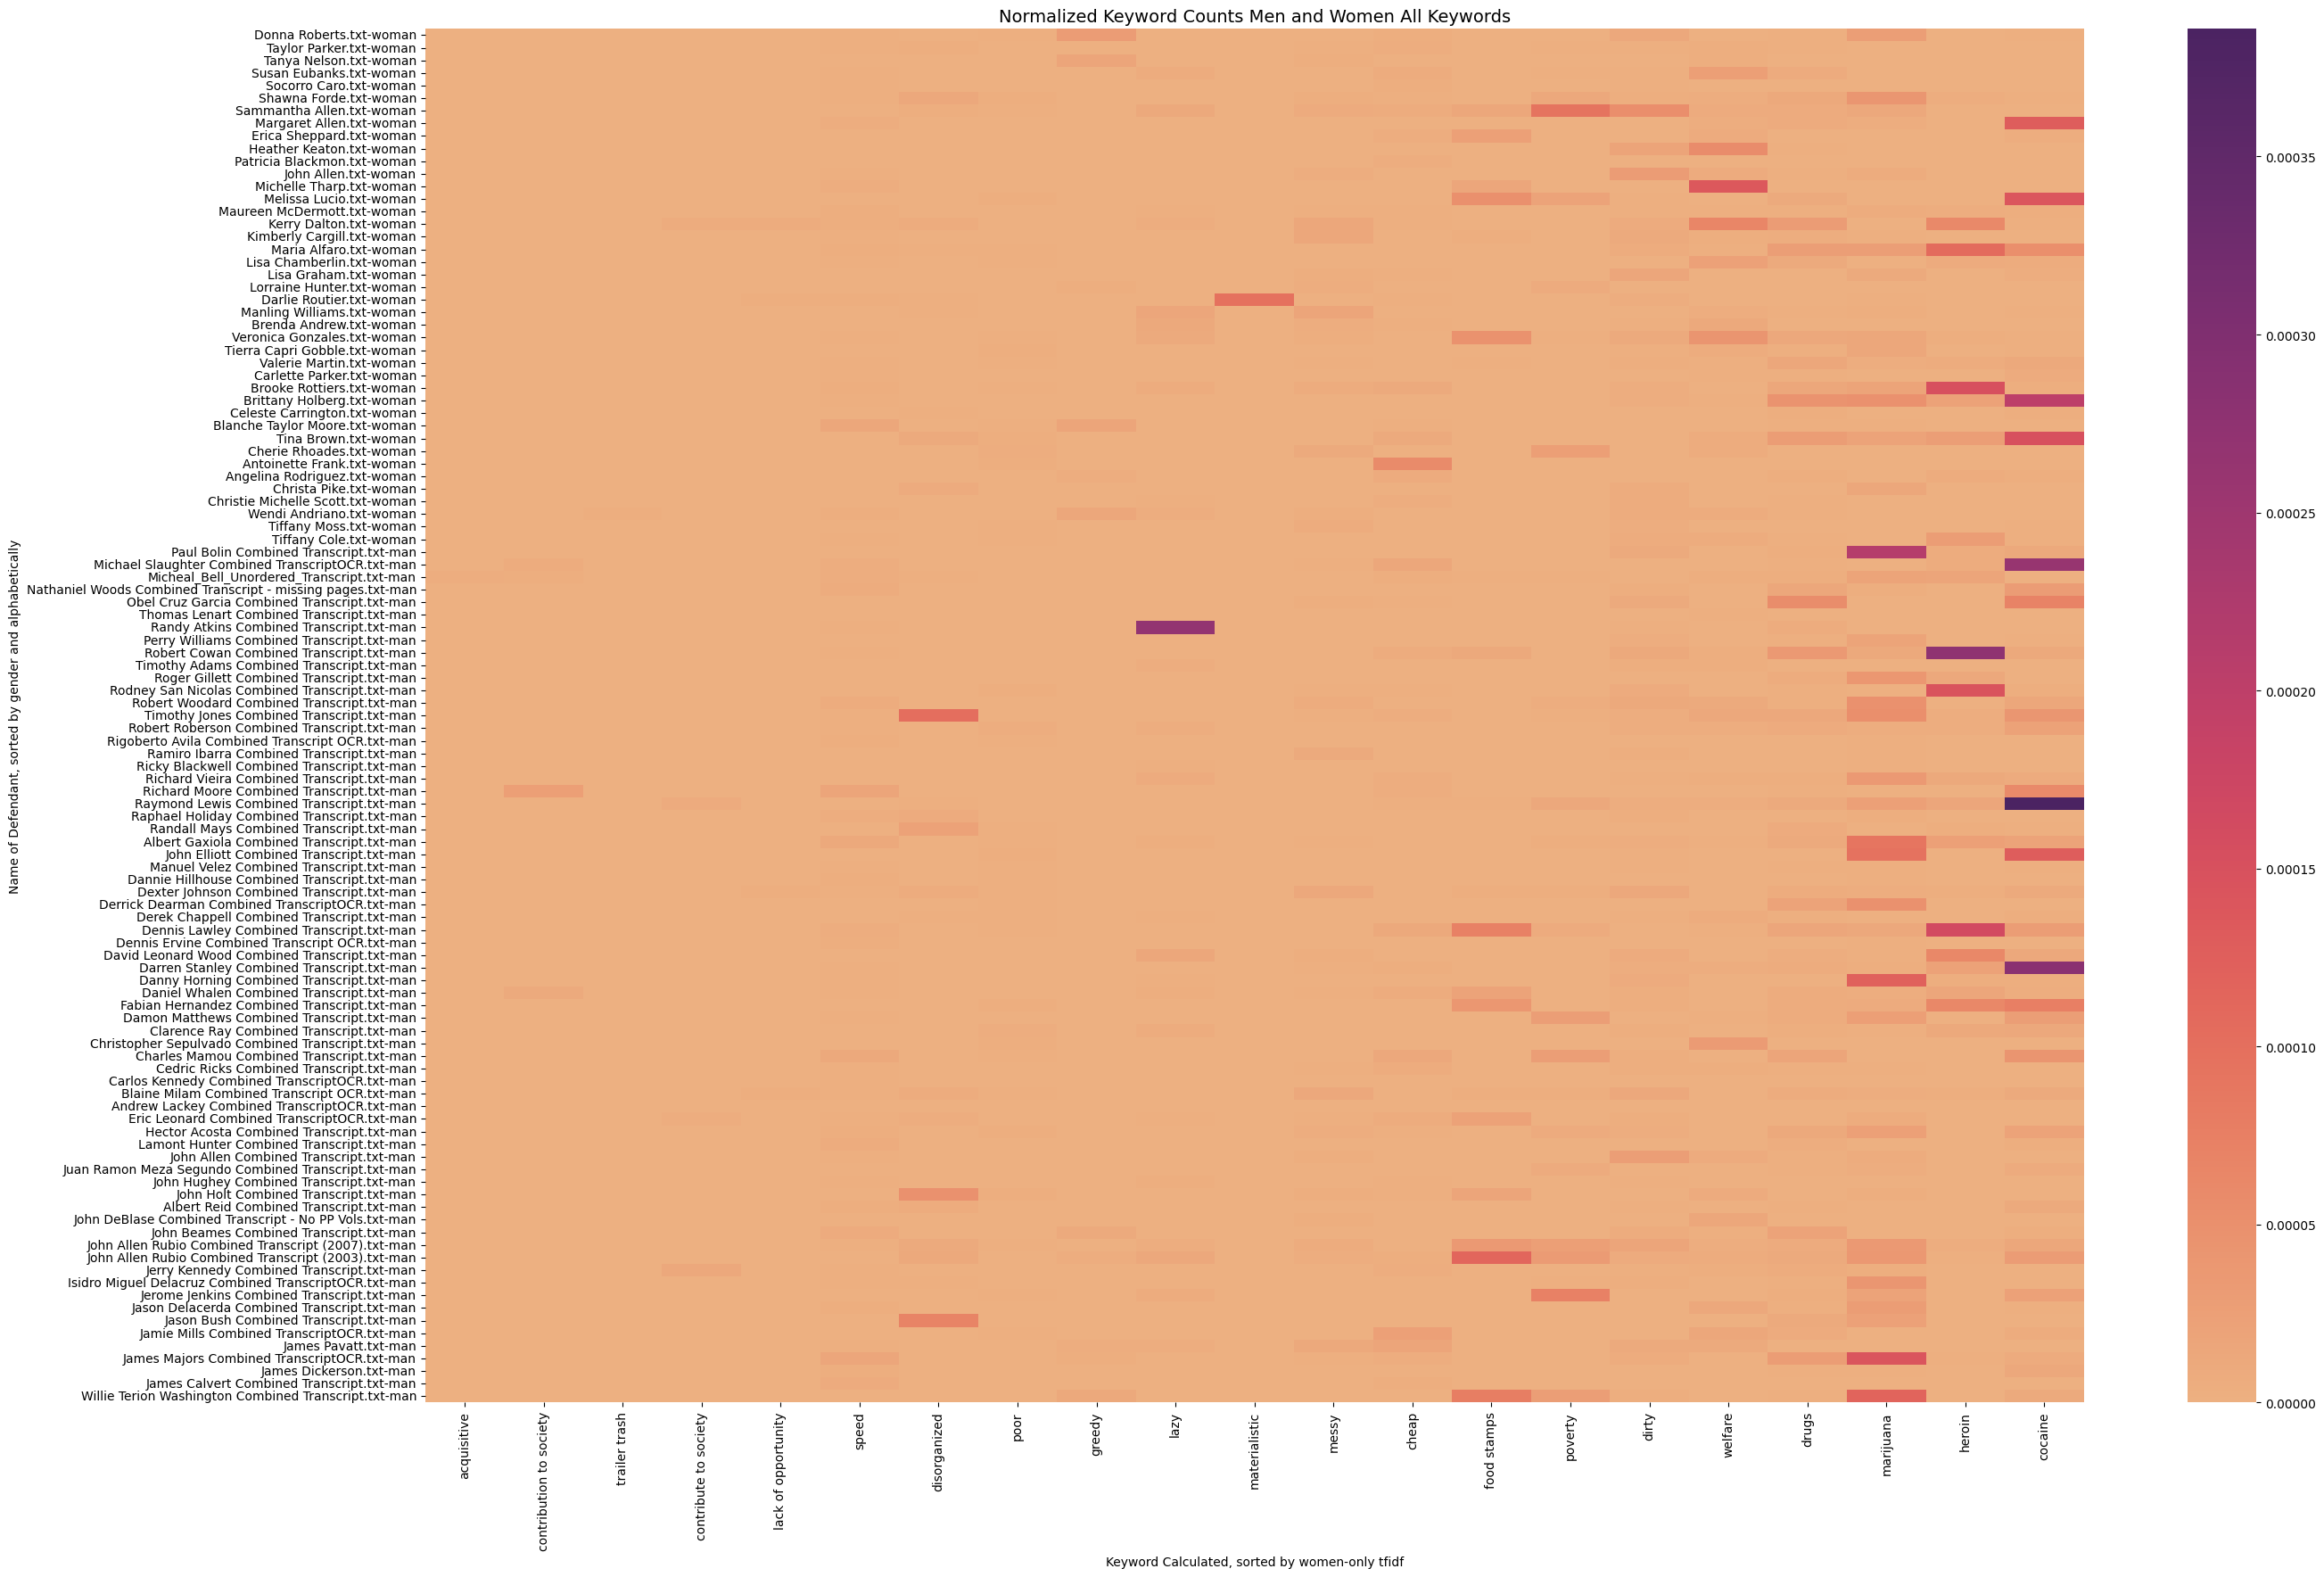

In [ ]:
heatmap_data = raw_counts[raw_counts['rurality_poverty_theme']==True].pivot_table(
        index=['document_name','gender'],
        columns='keyword',
        values='overall_tfidf_11_24')


sorted_pivot = heatmap_data.sort_values(by='gender', ascending=False)


#sorted_y_axis = heatmap_data.mean(axis=1).sort_values(ascending=False)



#sorted_pivot_df = sorted_pivot.reindex(index=sorted_y_axis)


fig, axes = plt.subplots(1, 1, figsize=(30, 20), sharex=True, sharey=True)


sort_order_x = raw_counts[raw_counts['rurality_poverty_theme']==True].groupby('keyword')['women_only_tfidf_11_24'].mean().sort_values().index


df_pivot_sorted = sorted_pivot.reindex(columns=sort_order_x)


sns.heatmap(df_pivot_sorted, ax=axes, cmap="flare",  cbar=True) #




# sns.heatmap(sorted_pivot, ax=axes, cmap="Spectral",  cbar=True ) #,xticklabels=True, yticklabels=True) #, vmin= v_min, vmax= v_max)


# yticklabels1 = sorted(normalized_keyword_analysis_women_df[normalized_keyword_analysis_women_df['Race/Ethnicity'] == 'White'].Name.unique())

axes.set_title(f'Normalized Keyword Counts Men and Women All Keywords', fontsize=14)
axes.set_ylabel('Name of Defendant, sorted by gender and alphabetically')
axes.set_xlabel('Keyword Calculated, sorted by women-only tfidf')

#axes.set_yticklabels(yticklabels1)

plt.show()

In [ ]:
raw_counts.head()

document_name gender  raw_keyword_count    keyword  pathologize_theme  \
0  Wendi Andriano.txt  woman                  0   lingerie              False   
1  Wendi Andriano.txt  woman                 30      flirt              False   
2  Wendi Andriano.txt  woman                  0      negro              False   
3  Wendi Andriano.txt  woman                  0  matriarch              False   
4  Wendi Andriano.txt  woman                489     mother              False   

   hypersexualize_theme  discredit_theme  immigration_theme  parent_theme  \
0                  True            False              False         False   
1                  True            False              False         False   
2                 False            False              False         False   
3                 False            False              False          True   
4                 False            False              False          True   

   gender_sexuality_theme  ...  co_defendant_match  race_state_crime_match  \
0                   False  ...               False                    True   
1                   False  ...               False                    True   
2                   False  ...               False                    True   
3                   False  ...               False                    True   
4                   False  ...               False                    True   

   word_count  unique_word_count  doc_word_count  doc_unique_word_count  \
0     1078612              26789         1078612                  26789   
1     1078612              26789         1078612                  26789   
2     1078612              26789         1078612                  26789   
3     1078612              26789         1078612                  26789   
4     1078612              26789         1078612                  26789   

   term_frequency  women_only_tfidf_11_24  men_only_tfidf_11_24  \
0        0.000000                0.000000                   0.0   
1        0.000028                0.000037                   0.0   
2        0.000000                0.000000                   0.0   
3        0.000000                0.000000                   0.0   
4        0.000453                0.000000                   0.0   

   overall_tfidf_11_24  
0             0.000000  
1             0.000041  
2             0.000000  
3             0.000000  
4             0.000000  

[5 rows x 27 columns]

#Create (updated) nationally representative sample

In [ ]:
national_rep ={
      'Heather Keaton.txt',
      'Wendi Andriano.txt',
      'Sammantha Allen.txt',
 'Shawna Forde.txt',
'Kerry Dalton.txt',
 'Cherie Rhoades.txt',
'Tina Brown.txt',
'Tiffany Moss.txt',
'Antoinette Frank.txt',
      'Christie Michelle Scott.txt',
'Donna Roberts.txt',
'Blanche Taylor Moore.txt',
      'Kimberly Cargill.txt',
      'Brittany Holberg.txt',
      'Melissa Lucio.txt',
      'Erica Sheppard.txt',




      'John DeBlase Combined Transcript - No PP Vols.txt',
'Timothy Jones Combined Transcript.txt',
 'John Allen.txt',
       'Jason Bush Combined Transcript.txt',
'Eric Leonard Combined TranscriptOCR.txt',
      'Robert Roberson Combined Transcript.txt',
      'David Leonard Wood Combined Transcript.txt',
      'Micheal_Bell_Unordered_Transcript.txt',
      'Robert Cowan Combined Transcript.txt',
      'Dennis Ervine Combined Transcript OCR.txt',
'Dannie Hillhouse Combined Transcript.txt',
      'John Holt Combined Transcript.txt',
'Danny Horning Combined Transcript.txt',
'Raymond Lewis Combined Transcript.txt',
      'Rodney San Nicolas Combined Transcript.txt',
'Michael Slaughter Combined TranscriptOCR.txt',
      'Richard Vieira Combined Transcript.txt',
'Daniel Whalen Combined Transcript.txt',
'Ricky Blackwell Combined Transcript.txt',






}

In [ ]:
{
 'Maureen McDermott.txt': (1430217, 46806),
 'Valerie Martin.txt': (593480, 24092),
 'Brooke Rottiers.txt': (739572, 28190),
 'Tiffany Moss.txt': (151358, 10777),
 'Blanche Taylor Moore.txt': (517945, 30105),
 'Kimberly Cargill.txt': (800318, 28853),
 'Susan Eubanks.txt': (590834, 27644),
 'Tierra Capri Gobble.txt': (150541, 11982),

 'Tiffany Cole.txt': (225102, 13747),

 'Patricia Blackmon.txt': (129598, 12111),
 'Socorro Caro.txt': (2091311, 53511),
 'Taylor Parker.txt': (1157376, 36444),
 'Manling Williams.txt': (1211606, 33635),
 'Melissa Lucio.txt': (199926, 12023),
 'Tanya Nelson.txt': (490076, 29370),
 'Celeste Carrington.txt': (633515, 25354),
 'Christie Michelle Scott.txt': (632062, 22773),
 'Erica Sheppard.txt': (134451, 9838),
 'Darlie Routier.txt': (917420, 27988),
 'Brittany Holberg.txt': (291955, 20928),
 'Lisa Chamberlin.txt': (121490, 9001),
 'Maria Alfaro.txt': (754467, 25192),
 'Carlette Parker.txt': (315107, 16477),
 'Antoinette Frank.txt': (174616, 14540),
 'Michelle Tharp.txt': (112156, 8882),
 'Lorraine Hunter.txt': (505206, 19305),
 'Tina Brown.txt': (153716, 12029),

 'Donna Roberts.txt': (213834, 14432),
 'Sammantha Allen.txt': (451240, 19822),
 'Angelina Rodriguez.txt': (464617, 19810),
 'Veronica Gonzales.txt': (1449674, 42689),
 'Lisa Graham.txt': (268658, 13245),
 'Margaret Allen.txt': (188978, 12795),
 'Brenda Andrew.txt': (798438, 24218),
 'Christa Pike.txt': (164440, 12610),
 'Willie Terion Washington Combined Transcript.txt': (198112, 13426),
 'Jason Delacerda Combined Transcript.txt': (133445, 11501),
 'Isidro Miguel Delacruz Combined TranscriptOCR.txt': (887293, 27656),
 'James Dickerson.txt': (131399, 13087),
 'Darren Stanley Combined Transcript.txt': (400182, 21683),
 'Ricky Blackwell Combined Transcript.txt': (653400, 20145),
 'Dexter Johnson Combined Transcript.txt': (920115, 30899),
 'Damon Matthews Combined Transcript.txt': (249733, 18450),
 'Carlos Kennedy Combined TranscriptOCR.txt': (87633, 8592),
 'Derrick Dearman Combined TranscriptOCR.txt': (123616, 9679),
 'Albert Reid Combined Transcript.txt': (197909, 13471),
 'Micheal_Bell_Unordered_Transcript.txt': (873532, 30592),
 'Rodney San Nicolas Combined Transcript.txt': (510672, 26311),

 'Robert Cowan Combined Transcript.txt': (314633, 18873),
 'Obel Cruz Garcia Combined Transcript.txt': (250443, 13595),
 'Charles Mamou Combined Transcript.txt': (293837, 11857),
 'Danny Horning Combined Transcript.txt': (489229, 26622),
 'Michael Slaughter Combined TranscriptOCR.txt': (451577, 27993),
 'Dannie Hillhouse Combined Transcript.txt': (212696, 11316),
 'Ramiro Ibarra Combined Transcript.txt': (283484, 16732),
 'Paul Bolin Combined Transcript.txt': (173399, 32636),
 'Clarence Ray Combined Transcript.txt': (184345, 18895),
 'James Majors Combined TranscriptOCR.txt': (509880, 24370),
 'David Leonard Wood Combined Transcript.txt': (505398, 23332),
 'Dennis Ervine Combined Transcript OCR.txt': (310072, 16122),
 'Raphael Holiday Combined Transcript.txt': (517293, 21861),
 'James Calvert Combined Transcript.txt': (1368646, 35689),
 'Manuel Velez Combined Transcript.txt': (173476, 10812),
 'Raymond Lewis Combined Transcript.txt': (862329, 34144),
 'Albert Gaxiola Combined Transcript.txt': (694736, 25178),
 'Christopher Sepulvado Combined Transcript.txt': (153270, 11706),
 'Juan Ramon Meza Segundo Combined Transcript.txt': (345592, 61715),
 'Derek Chappell Combined Transcript.txt': (907172, 50628),
 'John Hughey Combined Transcript.txt': (343007, 15493),
 'Richard Moore Combined Transcript.txt': (128614, 14934),
 'Dennis Lawley Combined Transcript.txt': (369792, 20731),
 'Robert Roberson Combined Transcript.txt': (212897, 15163),
 'Hector Acosta Combined Transcript.txt': (361469, 18506),
 'John Beames Combined Transcript.txt': (225639, 14989),
 'Robert Woodard Combined Transcript.txt': (277360, 18733),
 'John DeBlase Combined Transcript - No PP Vols.txt': (869695, 28863),
 'Timothy Adams Combined Transcript.txt': (250617, 12154),
 'John Elliott Combined Transcript.txt': (213499, 12562),
 'James Pavatt.txt': (410173, 20887),
 'Perry Williams Combined Transcript.txt': (133449, 6627),
 'Lamont Hunter Combined Transcript.txt': (113696, 8099),
 'John Holt Combined Transcript.txt': (295409, 20583),
 'Cedric Ricks Combined Transcript.txt': (326841, 17000),
 'Timothy Jones Combined Transcript.txt': (720704, 28198),
 'Nathaniel Woods Combined Transcript - missing pages.txt': (236801, 15438),
 'Jerry Kennedy Combined Transcript.txt': (272024, 16567),
 'Jamie Mills Combined TranscriptOCR.txt': (117466, 10025),
 'Andrew Lackey Combined TranscriptOCR.txt': (158387, 11034),
 'Randall Mays Combined Transcript.txt': (267376, 13691),
 'Rigoberto Avila Combined Transcript OCR.txt': (212696, 11316),
 'John Allen Rubio Combined Transcript (2003).txt': (475911, 20815),
 'Daniel Whalen Combined Transcript.txt': (339178, 18456),
 'John Allen Rubio Combined Transcript (2007).txt': (684531, 23969),
 'Jerome Jenkins Combined Transcript.txt': (170501, 12794),
 'Roger Gillett Combined Transcript.txt': (175797, 11398),
 'Thomas Lenart Combined Transcript.txt': (315152, 33633),
 'Richard Vieira Combined Transcript.txt': (287811, 17297),
 'Randy Atkins Combined Transcript.txt': (127381, 13082),
 'Fabian Hernandez Combined Transcript.txt': (431529, 20240),
 'Blaine Milam Combined Transcript OCR.txt': (920115, 30899)}

#Contingency Table, Statistical Signficance Test

Group transcripts by length for contingency tables

Men Transcripts above 500,000 words and Women Transcripts above 500,000 words,

Men Transcripts between 100,00-500,000 and Women transcripts  between 100,00-500000,


Men Transcripts below 100,000 and Women Transcripts below 100,000

In [137]:
word_count_dict = {key_tuple: value[0] for key_tuple, value in file_counts.items()}


In [154]:
a_above_500k = {key_tuple: value for key_tuple, value in word_count_dict.items() if  500000 <= value}

b_below_500k = {key_tuple: value for key_tuple, value in word_count_dict.items() if  500000 > value}

# c_below_100k ={key_tuple: value for key_tuple, value in word_count_dict.items() if   100000 > value}



In [165]:
a_above_500k

{'Wendi Andriano.txt': 1078612,
 'Maureen McDermott.txt': 1430217,
 'Valerie Martin.txt': 593480,
 'Brooke Rottiers.txt': 739572,
 'Blanche Taylor Moore.txt': 517945,
 'Kimberly Cargill.txt': 800318,
 'Susan Eubanks.txt': 590834,
 'Socorro Caro.txt': 2091311,
 'Taylor Parker.txt': 1157376,
 'Manling Williams.txt': 1211606,
 'Celeste Carrington.txt': 633515,
 'Christie Michelle Scott.txt': 632062,
 'Darlie Routier.txt': 917420,
 'Maria Alfaro.txt': 754467,
 'Lorraine Hunter.txt': 505206,
 'Heather Keaton.txt': 579454,
 'Veronica Gonzales.txt': 1449674,
 'Brenda Andrew.txt': 798438,
 'Isidro Miguel Delacruz Combined TranscriptOCR.txt': 887293,
 'Ricky Blackwell Combined Transcript.txt': 653400,
 'Dexter Johnson Combined Transcript.txt': 920115,
 'Micheal_Bell_Unordered_Transcript.txt': 873532,
 'Rodney San Nicolas Combined Transcript.txt': 510672,
 'Eric Leonard Combined TranscriptOCR.txt': 1111862,
 'James Majors Combined TranscriptOCR.txt': 509880,
 'David Leonard Wood Combined Transcr

In [163]:
# contingency table -
#columns are 4 groups, men below 500k. women below 500k. men 500K or above, women 500k or above
# 1 row per keyword

contingency_table =  pd.DataFrame(columns=['keyword', 'women_above_500k', 'men_above_500k', 'women_below_500k', 'men_below_500k']
    )

In [164]:
contingency_table

Empty DataFrame
Columns: [keyword, women_above_500k, men_above_500k, women_below_500k, men_below_500k]
Index: []

In [167]:
raw_counts[(raw_counts['gender']=='woman') & (raw_counts['document_name'].isin(a_above_500k) & (raw_counts['keyword']=='cry'))]


document_name gender  raw_keyword_count keyword  \
8              Wendi Andriano.txt  woman                168     cry   
197         Maureen McDermott.txt  woman                 63     cry   
386            Valerie Martin.txt  woman                126     cry   
575           Brooke Rottiers.txt  woman                 22     cry   
953      Blanche Taylor Moore.txt  woman                 74     cry   
1142         Kimberly Cargill.txt  woman                 57     cry   
1331            Susan Eubanks.txt  woman                 48     cry   
2465             Socorro Caro.txt  woman                 87     cry   
2654            Taylor Parker.txt  woman                153     cry   
2843         Manling Williams.txt  woman                127     cry   
3410       Celeste Carrington.txt  woman                 38     cry   
3599  Christie Michelle Scott.txt  woman                 42     cry   
3977           Darlie Routier.txt  woman                129     cry   
4544             Maria Alfaro.txt  woman                 81     cry   
5489          Lorraine Hunter.txt  woman                 14     cry   
6056           Heather Keaton.txt  woman                 91     cry   
6812        Veronica Gonzales.txt  woman                343     cry   
7379            Brenda Andrew.txt  woman                 54     cry   

      pathologize_theme  hypersexualize_theme  discredit_theme  \
8                  True                 False            False   
197                True                 False            False   
386                True                 False            False   
575                True                 False            False   
953                True                 False            False   
1142               True                 False            False   
1331               True                 False            False   
2465               True                 False            False   
2654               True                 False            False   
2843               True                 False            False   
3410               True                 False            False   
3599               True                 False            False   
3977               True                 False            False   
4544               True                 False            False   
5489               True                 False            False   
6056               True                 False            False   
6812               True                 False            False   
7379               True                 False            False   

      immigration_theme  parent_theme  gender_sexuality_theme  ...  \
8                 False         False                   False  ...   
197               False         False                   False  ...   
386               False         False                   False  ...   
575               False         False                   False  ...   
953               False         False                   False  ...   
1142              False         False                   False  ...   
1331              False         False                   False  ...   
2465              False         False                   False  ...   
2654              False         False                   False  ...   
2843              False         False                   False  ...   
3410              False         False                   False  ...   
3599              False         False                   False  ...   
3977              False         False                   False  ...   
4544              False         False                   False  ...   
5489              False         False                   False  ...   
6056              False         False                   False  ...   
6812              False         False                   False  ...   
7379              False         False                   False  ...   

      gender_neutral_keyword  co_defendant_match  race_state_crime_match  \
8       

In [166]:
raw_counts.keyword.unique()

array(['lingerie', 'flirt', 'negro', 'matriarch', 'mother',
       'make believe', 'booty', 'lack of opportunity', 'cry',
       'asking for it', 'baby mama', 'figure hugging', 'sex',
       'contribute to society', 'messy', 'lure', 'adulterer', 'bisexual',
       'bad father', 'unreliable', 'heroin', 'appealing', 'revealing',
       'mom', 'bad mother', 'infiltration', 'illegal', 'trailer trash',
       'community', 'breast', 'contribution to society', 'sacrificial',
       'seduce', 'patriarch', 'short skirt', 'maternal', 'bra', 'bad mom',
       'citizenship', 'english', 'welfare queen', 'acquisitive',
       'wetback', 'lack of empathy', 'boxers', 'cleavage', 'fake',
       'inhuman', 'sexy', 'promiscu', 'feminine', 'uncontrollable',
       'unbelievable', 'unnatural', 'aggressive', 'bitch', 'hyena',
       'butch', 'abandonment', 'wolves', 'mammy', 'jackal', 'man',
       'drugs', 'physically attractive', 'sex appeal', 'exaggerat',
       'not crying', 'lie', 'assertive', 'unfeeli

In [171]:
for word in raw_counts.keyword.unique():

  #get the count of that word for every doc in each of the four subsets

  #women above 500k
  women_above_500 = raw_counts[(raw_counts['gender']=='woman') & (raw_counts['document_name'].isin(a_above_500k) & (raw_counts['keyword']==word))]
  women_above_500_sum = women_above_500.raw_keyword_count.sum()

  #women below 500k
  w_below_500 = raw_counts[(raw_counts['gender']=='woman') & (raw_counts['document_name'].isin(b_below_500k) & (raw_counts['keyword']==word))]
  w_below_500_sum = w_below_500.raw_keyword_count.sum()

  #men above 500k
  men_above_500 = raw_counts[(raw_counts['gender']=='man') & (raw_counts['document_name'].isin(a_above_500k) & (raw_counts['keyword']==word))]
  men_above_500_sum = men_above_500.raw_keyword_count.sum()
  #men below 500k
  m_below_500 = raw_counts[(raw_counts['gender']=='man') & (raw_counts['document_name'].isin(b_below_500k) & (raw_counts['keyword']==word))]
  m_below_500_sum = m_below_500.raw_keyword_count.sum()




  new_row_data = {"keyword": word, "women_above_500k": women_above_500_sum, 'men_above_500k': men_above_500_sum,  "women_below_500k": w_below_500_sum, 'men_below_500k': m_below_500_sum  }

  # Convert the new row data to a DataFrame
  new_row_df = pd.DataFrame([new_row_data])

  # Concatenate the original DataFrame with the new row DataFrame
  contingency_table = pd.concat([contingency_table, new_row_df], ignore_index=True)

In [172]:
contingency_table

keyword women_above_500k men_above_500k women_below_500k  \
0    untrustworthy               11              3                1   
1         lingerie                9              0               20   
2            flirt               62             21                5   
3            negro                6              9                1   
4        matriarch                5              0               24   
..             ...              ...            ...              ...   
185        neglect              200            117              196   
186         border              372            623              182   
187        hysteri              158             65               57   
188       atypical               13             60                1   
189  untrustworthy               11              3                1   

    men_below_500k  
0                7  
1                0  
2               19  
3                6  
4                0  
..             ...  
185            137  
186            334  
187             52  
188             15  
189              7  

[190 rows x 5 columns]

In [241]:
women_above_500k_col_total = contingency_table['women_above_500k'].sum()
men_above_500k_col_total = contingency_table['men_above_500k'].sum()

women_bel_500k_col_total = contingency_table['women_below_500k'].sum()
men_bel_500k_col_total = contingency_table['men_below_500k'].sum()

grand_total = women_above_500k_col_total + men_above_500k_col_total + women_bel_500k_col_total + men_bel_500k_col_total

Calculate the expected value E


E = (Total occurrences in corpus * total words in corpus) / total of all words in all corpora)

E = (row total * column total)/ grand total  
where grand total = sum of all contengency talble values




In [275]:
contingency_table[contingency_table['keyword']=='untrustworthy'].women_above_500k.value + contingency_table[contingency_table['keyword']=='untrustworthy'].men_above_500k.value

AttributeError: 'Series' object has no attribute 'value'

In [263]:
contingency_table[contingency_table['keyword']=='untrustworthy'].sum(axis=1, numeric_only=True)


0      0.0
189    0.0
dtype: float64

In [285]:
E_table = pd.DataFrame(columns= ['keyword'	,'women_above_500k'	,'men_above_500k',	'women_below_500k'	,'men_below_500k'])
E_table

Empty DataFrame
Columns: [keyword, women_above_500k, men_above_500k, women_below_500k, men_below_500k]
Index: []

In [286]:
for word in raw_counts.keyword.unique():
  #get the count of that word for every doc in each of the four subsets


  row_sum = (contingency_table[contingency_table['keyword']==word].women_above_500k.values +
             contingency_table[contingency_table['keyword']==word].men_above_500k.values +
              contingency_table[contingency_table['keyword']==word].women_below_500k.values +
                contingency_table[contingency_table['keyword']==word].men_below_500k.values ).astype(float)


  new_row_data = {"keyword": word, "women_above_500k": (row_sum[0] * women_above_500k_col_total) / grand_total,
                  'men_above_500k': (row_sum[0] * men_above_500k_col_total) / grand_total,
                  "women_below_500k":( row_sum[0] * women_bel_500k_col_total  )/ grand_total,
                  'men_below_500k': (row_sum[0]  * men_bel_500k_col_total) / grand_total }

  # Convert the new row data to a DataFrame
  new_row_df = pd.DataFrame([new_row_data])

  # Concatenate the original DataFrame with the new row DataFrame
  E_table = pd.concat([E_table, new_row_df], ignore_index=True)


/tmp/ipython-input-12381192.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  E_table = pd.concat([E_table, new_row_df], ignore_index=True)


In [287]:
E_table

keyword  women_above_500k  men_above_500k  women_below_500k  \
0         lingerie         10.358370        7.132921          3.808791   
1            flirt         38.218815       26.318020         14.053127   
2            negro          7.858074        5.411182          2.889428   
3        matriarch         10.358370        7.132921          3.808791   
4           mother       6411.474080     4415.032345       2357.510598   
..             ...               ...             ...               ...   
184        neglect        232.170371      159.875823         85.369465   
185         border        539.706815      371.649798        198.451171   
186        hysteri        118.585482       81.659651         43.604096   
187       atypical         31.789482       21.890690         11.689050   
188  untrustworthy          7.858074        5.411182          2.889428   

     men_below_500k  
0          7.699917  
1         28.410038  
2          5.841316  
3          7.699917  
4       4765.982978  
..              ...  
184      172.584342  
185      401.192216  
186       88.150772  
187       23.630779  
188        5.841316  

[189 rows x 5 columns]

In [289]:
#sanity check, manually calculate E for a few words

untrustworthy_aw =  (22*women_above_500k_col_total)/ grand_total

untrustworthy_bm = (22*men_bel_500k_col_total) /grand_total

matriarch_bw = (29 * women_bel_500k_col_total) / grand_total

In [291]:
untrustworthy_aw

7.858074080803784

In [290]:
untrustworthy_bm

5.841316184502043

In [292]:
matriarch_bw

3.808791494686244

In [293]:
E_table.to_csv('expected_value_keyword_11_25.csv')

In [294]:
contingency_table

keyword women_above_500k men_above_500k women_below_500k  \
0    untrustworthy               11              3                1   
1         lingerie                9              0               20   
2            flirt               62             21                5   
3            negro                6              9                1   
4        matriarch                5              0               24   
..             ...              ...            ...              ...   
185        neglect              200            117              196   
186         border              372            623              182   
187        hysteri              158             65               57   
188       atypical               13             60                1   
189  untrustworthy               11              3                1   

    men_below_500k  
0                7  
1                0  
2               19  
3                6  
4                0  
..             ...  
185            137  
186            334  
187             52  
188             15  
189              7  

[190 rows x 5 columns]

In [323]:
E_table[E_table['keyword']=='mammy']

keyword  women_above_500k  men_above_500k  women_below_500k  men_below_500k
60   mammy               0.0             0.0               0.0             0.0

Calulate CHI squared values and degrees of freedom


sum of (o-e)**2 / e

In [297]:
contingency_table[contingency_table['keyword']=='lingerie'].women_above_500k.values

array([9], dtype=object)

In [299]:
E_table[E_table['keyword']=='lingerie'].women_above_500k.values

array([10.35837038])

In [300]:
((9 - 10.35837038)**2) / 10.35837038

0.17813324119245724

In [318]:
e_men_below_500k==0

np.True_

In [352]:
chi_table = pd.DataFrame(columns= ['keyword'	,'women_above_500k'	,'men_above_500k',	'women_below_500k'	,'men_below_500k'])


In [353]:
o_e_sums = 0
excluded_words= {}

for word in raw_counts.keyword.unique():
#(observed - expected)**2 / expected
  print(word)
  o_women_above_500k = 	contingency_table[contingency_table['keyword']==word].women_above_500k.values[0]
  o_men_above_500k = contingency_table[contingency_table['keyword']==word].men_above_500k.values[0]
  o_women_below_500k = contingency_table[contingency_table['keyword']==word].women_below_500k.values[0]
  o_men_below_500k = contingency_table[contingency_table['keyword']==word].men_below_500k.values[0]

  e_women_above_500k = 	E_table[E_table['keyword']==word].women_above_500k.values[0]
  e_men_above_500k = E_table[E_table['keyword']==word].men_above_500k.values[0]
  e_women_below_500k = E_table[E_table['keyword']==word].women_below_500k.values[0]
  e_men_below_500k = E_table[E_table['keyword']==word].men_below_500k.values[0]


#exclude words that are less than 5 expected value in each corpus
  if ( e_women_above_500k < 2) or (e_men_above_500k< 2) or (e_women_below_500k< 2) or (e_men_below_500k  < 2):
    excluded_words[word]= (e_women_above_500k , e_men_above_500k, e_women_below_500k, e_men_below_500k)
    pass

  else:
    val1  = (o_women_above_500k - e_women_above_500k)**2 /e_women_above_500k

    val2  = (o_men_above_500k - e_men_above_500k)**2 /e_men_above_500k
    val3  = (o_women_below_500k - e_women_below_500k)**2 /e_women_below_500k
    val4  = (o_men_below_500k - e_men_below_500k)**2/ e_men_below_500k

    print((val1 + val2 + val3+ val4))

    o_e_sums += (val1 + val2 + val3+ val4)

    new_row_data = {"keyword": word, "women_above_500k": val1,
                    'men_above_500k':val2 ,
                    "women_below_500k": val3,
                    'men_below_500k':val4

                    }

    # Convert the new row data to a DataFrame
    new_row_df = pd.DataFrame([new_row_data])

    # Concatenate the original DataFrame with the new row DataFrame
    chi_table = pd.concat([chi_table, new_row_df])

lingerie
83.83995117032755
flirt
24.82105326445275
negro
4.0593629450509905
matriarch
124.64257822043017
mother
405.4012548188133
make believe
booty
lack of opportunity
cry
23.36036709807795
asking for it
2.6063112562280004
baby mama
figure hugging
sex
11.926696163238596
contribute to society
messy
11.981601543961347
lure
111.18440873660532
adulterer
bisexual
bad father
unreliable
52.13136897392283
heroin
20.05688282601054
appealing
8.457882485336645
revealing
8.76145084384685
mom
329.21756496416253
bad mother
20.242783536174805
infiltration
illegal
48.506840698649796
trailer trash
community
128.43254236851584
breast
10.101335783785343
contribution to society
sacrificial
seduce
3.5773635024338106
patriarch
short skirt
maternal
71.02967619694738
bra
3960.251186988263
bad mom
citizenship
21.788962478616224
english
146.23066456888856
welfare queen
acquisitive
wetback
lack of empathy
9.847203140821064
boxers
13.668380374460487
cleavage
fake
753.0411681226342
inhuman
76.69402618617785
sexy


/tmp/ipython-input-340196159.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chi_table = pd.concat([chi_table, new_row_df])


In [354]:
chi_table

keyword  women_above_500k  men_above_500k  women_below_500k  \
0        lingerie          0.178133        7.132921         68.828980   
0           flirt         14.797549        1.074600          5.832091   
0           negro          0.439349        2.380186          1.235517   
0       matriarch          2.771877        7.132921        107.037863   
0          mother        160.218193      179.019869         32.426743   
..            ...               ...             ...               ...   
0         neglect          4.457643       11.498525        143.366430   
0          border         52.112694      169.990471          1.363766   
0         hysteri         13.100291        3.398790          4.115445   
0        atypical         11.105705       66.344166          9.774600   
0   untrustworthy          1.256249        1.074404          1.235517   

    men_below_500k  
0         7.699917  
0         3.116814  
0         0.004311  
0         7.699917  
0        33.736450  
..             ...  
0         7.336966  
0        11.253443  
0        14.825489  
0         3.152260  
0         0.229837  

[129 rows x 5 columns]

In [355]:
o_e_sums

np.float64(22883.83552534671)

In [356]:
#sanity check, sums of col_sums should equal  o_e_sums

chi_table.women_above_500k.sum() + chi_table.men_above_500k.sum() + chi_table.women_below_500k.sum() + chi_table.men_below_500k.sum()

np.float64(22883.8355253467)

In [332]:
chi_table.to_csv('chi_vals_11_25.csv')

Calculate critical value


In [336]:
chi_table.shape

(100, 5)

In [362]:
(chi_table.shape[0] - 1) *(4-1)

384

(expected val <5)
with a CHI square value of 22301.209837927316 and a critical value of 297 we can reject thee null hypothesis and conclude that there is strong evidence for the existence of genuine differences in the
frequencies of gender stereotyping keywowrds across length and gender of transcripts.

(expected val < 2)
with a CHI square value of 22883.8355253467 and a critical value of 384 we can reject thee null hypothesis and conclude that there is strong evidence for the existence of genuine differences in the
frequencies of gender stereotyping keywowrds across length and gender of transcripts.




In [357]:
excluded_words.keys()

dict_keys(['make believe', 'booty', 'lack of opportunity', 'baby mama', 'figure hugging', 'contribute to society', 'adulterer', 'bisexual', 'bad father', 'infiltration', 'trailer trash', 'contribution to society', 'sacrificial', 'patriarch', 'short skirt', 'bad mom', 'welfare queen', 'acquisitive', 'wetback', 'cleavage', 'hyena', 'wolves', 'mammy', 'jackal', 'physically attractive', 'sex appeal', 'unfeeling', 'unlawful presence', 'temptress', 'bimbo', 'lesbian', 'immodest', 'busty', 'feral', 'sexual appeal', 'american hospitality', 'oversexed', 'baby daddy', 'mistress', 'dyke', 'skank', 'floozy', 'womanizer', 'emotionally abusive', 'cries wolf', 'untamable', 'brute', 'low cut', 'flaunting', 'queer', 'tight fitting', 'jezebel', 'overbearing', 'deranged', 'infiltrat', 'glamour', 'had it coming', 'family oriented', 'insincere', 'bad dad'])

In [361]:

contingency_table[contingency_table['keyword']=='mistress']

keyword women_above_500k men_above_500k women_below_500k men_below_500k
101  mistress               12              1                0              0

In [388]:
def create_contingency_table(raw_counts, contingency_table, E_table, chi_table ):


  for word in raw_counts.keyword.unique():

    #get the count of that word for every doc in each of the four subsets

    #women above 500k
    women_above_500 = raw_counts[(raw_counts['gender']=='woman') & (raw_counts['document_name'].isin(a_above_500k) & (raw_counts['keyword']==word))]
    women_above_500_sum = women_above_500.raw_keyword_count.sum()

    #women below 500k
    w_below_500 = raw_counts[(raw_counts['gender']=='woman') & (raw_counts['document_name'].isin(b_below_500k) & (raw_counts['keyword']==word))]
    w_below_500_sum = w_below_500.raw_keyword_count.sum()

    #men above 500k
    men_above_500 = raw_counts[(raw_counts['gender']=='man') & (raw_counts['document_name'].isin(a_above_500k) & (raw_counts['keyword']==word))]
    men_above_500_sum = men_above_500.raw_keyword_count.sum()
    #men below 500k
    m_below_500 = raw_counts[(raw_counts['gender']=='man') & (raw_counts['document_name'].isin(b_below_500k) & (raw_counts['keyword']==word))]
    m_below_500_sum = m_below_500.raw_keyword_count.sum()




    new_row_data = {"keyword": word, "women_above_500k": women_above_500_sum, 'men_above_500k': men_above_500_sum,  "women_below_500k": w_below_500_sum, 'men_below_500k': m_below_500_sum  }

    # Convert the new row data to a DataFrame
    new_row_df = pd.DataFrame([new_row_data])

    # Concatenate the original DataFrame with the new row DataFrame
    contingency_table = pd.concat([contingency_table, new_row_df], ignore_index=True)

  for word in raw_counts.keyword.unique():
    #get the count of that word for every doc in each of the four subsets


    row_sum = (contingency_table[contingency_table['keyword']==word].women_above_500k.values +
              contingency_table[contingency_table['keyword']==word].men_above_500k.values +
                contingency_table[contingency_table['keyword']==word].women_below_500k.values +
                  contingency_table[contingency_table['keyword']==word].men_below_500k.values ).astype(float)


    new_row_data = {"keyword": word, "women_above_500k": (row_sum[0] * women_above_500k_col_total) / grand_total,
                    'men_above_500k': (row_sum[0] * men_above_500k_col_total) / grand_total,
                    "women_below_500k":( row_sum[0] * women_bel_500k_col_total  )/ grand_total,
                    'men_below_500k': (row_sum[0]  * men_bel_500k_col_total) / grand_total }

    # Convert the new row data to a DataFrame
    new_row_df = pd.DataFrame([new_row_data])

    # Concatenate the original DataFrame with the new row DataFrame
    E_table = pd.concat([E_table, new_row_df], ignore_index=True)

    o_e_sums = 0
  excluded_words= {}

  for word in raw_counts.keyword.unique():
  #(observed - expected)**2 / expected
    # print(word)
    o_women_above_500k = 	contingency_table[contingency_table['keyword']==word].women_above_500k.values[0]
    o_men_above_500k = contingency_table[contingency_table['keyword']==word].men_above_500k.values[0]
    o_women_below_500k = contingency_table[contingency_table['keyword']==word].women_below_500k.values[0]
    o_men_below_500k = contingency_table[contingency_table['keyword']==word].men_below_500k.values[0]

    e_women_above_500k = 	E_table[E_table['keyword']==word].women_above_500k.values[0]
    e_men_above_500k = E_table[E_table['keyword']==word].men_above_500k.values[0]
    e_women_below_500k = E_table[E_table['keyword']==word].women_below_500k.values[0]
    e_men_below_500k = E_table[E_table['keyword']==word].men_below_500k.values[0]


  #exclude words that are less than 5 expected value in each corpus
    if ( e_women_above_500k < 2) or (e_men_above_500k< 2) or (e_women_below_500k< 2) or (e_men_below_500k  < 2):
      excluded_words[word]= (e_women_above_500k , e_men_above_500k, e_women_below_500k, e_men_below_500k)
      pass

    else:
      val1  = (o_women_above_500k - e_women_above_500k)**2 /e_women_above_500k

      val2  = (o_men_above_500k - e_men_above_500k)**2 /e_men_above_500k
      val3  = (o_women_below_500k - e_women_below_500k)**2 /e_women_below_500k
      val4  = (o_men_below_500k - e_men_below_500k)**2/ e_men_below_500k

      # print((val1 + val2 + val3+ val4))

      o_e_sums += (val1 + val2 + val3+ val4)

      new_row_data = {"keyword": word, "women_above_500k": val1,
                      'men_above_500k':val2 ,
                      "women_below_500k": val3,
                      'men_below_500k':val4

                      }

      # Convert the new row data to a DataFrame
      new_row_df = pd.DataFrame([new_row_data])

      # Concatenate the original DataFrame with the new row DataFrame
      chi_table = pd.concat([chi_table, new_row_df])

      degrees_of_freedom = (chi_table.shape[0] - 1) *(4-1)

  return o_e_sums, degrees_of_freedom, excluded_words

In [395]:
l2_match = raw_counts[raw_counts['race_state_crime_match']==True]

In [396]:
l2_match

document_name gender  raw_keyword_count  \
0                            Wendi Andriano.txt  woman                  0   
1                            Wendi Andriano.txt  woman                 30   
2                            Wendi Andriano.txt  woman                  0   
3                            Wendi Andriano.txt  woman                  0   
4                            Wendi Andriano.txt  woman                489   
...                                         ...    ...                ...   
20785  Blaine Milam Combined Transcript OCR.txt    man                  4   
20786  Blaine Milam Combined Transcript OCR.txt    man                 67   
20787  Blaine Milam Combined Transcript OCR.txt    man                  0   
20788  Blaine Milam Combined Transcript OCR.txt    man                  2   
20789  Blaine Milam Combined Transcript OCR.txt    man                  0   

             keyword  pathologize_theme  hypersexualize_theme  \
0           lingerie              False                  True   
1              flirt              False                  True   
2              negro              False                 False   
3          matriarch              False                 False   
4             mother              False                 False   
...              ...                ...                   ...   
20785        neglect              False                 False   
20786         border              False                 False   
20787        hysteri               True                 False   
20788       atypical              False                 False   
20789  untrustworthy              False                 False   

       discredit_theme  immigration_theme  parent_theme  \
0                False              False         False   
1                False              False         False   
2                False              False         False   
3                False              False          True   
4                False              False          True   
...                ...                ...           ...   
20785            False              False         False   
20786            False               True         False   
20787             True              False         False   
20788             True              False         False   
20789            False               True         False   

       gender_sexuality_theme  ...  gender_neutral_keyword  \
0                       False  ...                   False   
1                       False  ...                    True   
2                       False  ...                    True   
3                       False  ...                   False   
4                       False  ...                   False   
...                       ...  ...                     ...   
20785                    True  ...                    True   
20786                   False  ...                    True   
20787                   False  ...                    True   
20788                   False  ...                    True   
20789                   False  ...                    True   

       co_defendant_match  race_state_crime_match  document_word_count  \
0                   False                    True              1078612   
1                   False                    True              1078612   
2                   False                    True              1078612   
3                   False                    True              1078612   
4                   False                    True              1078612   
...                   ...                     ...                  ...   
20785               False                    True               920115   
20786               False                    True               920115   
20787               False                    True               920115   
20788               False                    True               920115   
20789               False                    True           

In [389]:
l2o_e, l2degrees_of_freedom, l2excluded_words = create_contingency_table(l2_match, pd.DataFrame(columns= ['keyword'	,'women_above_500k'	,'men_above_500k',	'women_below_500k'	,'men_below_500k'])
, pd.DataFrame(columns= ['keyword'	,'women_above_500k'	,'men_above_500k',	'women_below_500k'	,'men_below_500k'])
, pd.DataFrame(columns= ['keyword'	,'women_above_500k'	,'men_above_500k',	'women_below_500k'	,'men_below_500k'])
 )


/tmp/ipython-input-2639577869.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  E_table = pd.concat([E_table, new_row_df], ignore_index=True)
/tmp/ipython-input-2639577869.py:99: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chi_table = pd.concat([chi_table, new_row_df])


In [394]:
l2o_e

np.float64(33938.51191865638)

In [387]:
l2degrees_of_freedom

315

In [391]:
l2excluded_words.keys()

dict_keys(['lingerie', 'negro', 'make believe', 'booty', 'lack of opportunity', 'baby mama', 'figure hugging', 'contribute to society', 'adulterer', 'bisexual', 'bad father', 'bad mother', 'infiltration', 'trailer trash', 'contribution to society', 'sacrificial', 'seduce', 'patriarch', 'short skirt', 'bad mom', 'citizenship', 'welfare queen', 'acquisitive', 'wetback', 'lack of empathy', 'boxers', 'cleavage', 'inhuman', 'sexy', 'feminine', 'hyena', 'wolves', 'mammy', 'jackal', 'physically attractive', 'sex appeal', 'not crying', 'unfeeling', 'unlawful presence', 'temptress', 'bimbo', 'uncaring', 'lesbian', 'immodest', 'busty', 'greedy', 'feral', 'sexual appeal', 'american hospitality', 'oversexed', 'baby daddy', 'mistress', 'dyke', 'skank', 'floozy', 'customs', 'womanizer', 'emotionally abusive', 'cries wolf', 'untamable', 'brute', 'exotic', 'manly', 'low cut', 'flaunting', 'queer', 'masculine', 'tight fitting', 'jezebel', 'overbearing', 'scheming', 'deranged', 'infiltrat', 'glamour', '

In [392]:
raw_counts

document_name gender  raw_keyword_count  \
0                            Wendi Andriano.txt  woman                  0   
1                            Wendi Andriano.txt  woman                 30   
2                            Wendi Andriano.txt  woman                  0   
3                            Wendi Andriano.txt  woman                  0   
4                            Wendi Andriano.txt  woman                489   
...                                         ...    ...                ...   
20785  Blaine Milam Combined Transcript OCR.txt    man                  4   
20786  Blaine Milam Combined Transcript OCR.txt    man                 67   
20787  Blaine Milam Combined Transcript OCR.txt    man                  0   
20788  Blaine Milam Combined Transcript OCR.txt    man                  2   
20789  Blaine Milam Combined Transcript OCR.txt    man                  0   

             keyword  pathologize_theme  hypersexualize_theme  \
0           lingerie              False                  True   
1              flirt              False                  True   
2              negro              False                 False   
3          matriarch              False                 False   
4             mother              False                 False   
...              ...                ...                   ...   
20785        neglect              False                 False   
20786         border              False                 False   
20787        hysteri               True                 False   
20788       atypical              False                 False   
20789  untrustworthy              False                 False   

       discredit_theme  immigration_theme  parent_theme  \
0                False              False         False   
1                False              False         False   
2                False              False         False   
3                False              False          True   
4                False              False          True   
...                ...                ...           ...   
20785            False              False         False   
20786            False               True         False   
20787             True              False         False   
20788             True              False         False   
20789            False               True         False   

       gender_sexuality_theme  ...  gender_neutral_keyword  \
0                       False  ...                   False   
1                       False  ...                    True   
2                       False  ...                    True   
3                       False  ...                   False   
4                       False  ...                   False   
...                       ...  ...                     ...   
20785                    True  ...                    True   
20786                   False  ...                    True   
20787                   False  ...                    True   
20788                   False  ...                    True   
20789                   False  ...                    True   

       co_defendant_match  race_state_crime_match  document_word_count  \
0                   False                    True              1078612   
1                   False                    True              1078612   
2                   False                    True              1078612   
3                   False                    True              1078612   
4                   False                    True              1078612   
...                   ...                     ...                  ...   
20785               False                    True               920115   
20786               False                    True               920115   
20787               False                    True               920115   
20788               False                    True               920115   
20789               False                    True           

In [397]:
l1_match = raw_counts[raw_counts['co_defendant_match']==True]

l1o_e, l1degrees_of_freedom, l1excluded_words = create_contingency_table(l1_match, pd.DataFrame(columns= ['keyword'	,'women_above_500k'	,'men_above_500k',	'women_below_500k'	,'men_below_500k'])
, pd.DataFrame(columns= ['keyword'	,'women_above_500k'	,'men_above_500k',	'women_below_500k'	,'men_below_500k'])
, pd.DataFrame(columns= ['keyword'	,'women_above_500k'	,'men_above_500k',	'women_below_500k'	,'men_below_500k'])
 )
print(l1o_e)
print(l1degrees_of_freedom)

/tmp/ipython-input-2639577869.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  E_table = pd.concat([E_table, new_row_df], ignore_index=True)
/tmp/ipython-input-2639577869.py:99: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chi_table = pd.concat([chi_table, new_row_df])


11255.57428780425
183


In [ ]:
33938.51191865638